In [102]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [103]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

In [104]:
# Preprocess the data
# Convert categorical variables into numerical variables
le_dict = {}
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        le_dict[column] = le

# Split the data into features and target variable
X = df.drop('attitude', axis=1)
y = df['attitude']

In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Create a Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [107]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [108]:
# Make predictions
predictions = model.predict(X_test)

In [109]:
# Print the predictions
print(predictions)

[0 0 1 2 0 2 3 0 2 1 1 2 2 2 0 4 0 2 2 2 0 4 0 2 0 4 0 2 2 0 1 1 1 2 2 3 2
 3 2 1]


In [110]:
# Split the data into train and test sets
X = df.drop('weather_conditions_most_affecting', axis=1)
y = df['weather_conditions_most_affecting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Train the model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)  # Increase max_iter from default (100)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [112]:
# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[0 0 9 6 9 9 0 2 0 9 9 3 9 5 6 3 9 0 6 9 9 0 0 0 0 9 9 9 0 4 3 0 3 0 9 3 0
 8 3 0]


In [113]:
label_mapping = dict(zip(le_dict['weather_conditions_most_affecting'].classes_, le_dict['weather_conditions_most_affecting'].transform(le_dict['weather_conditions_most_affecting'].classes_)))
print(label_mapping)

{'Humidity': 0, 'Humidity, Humidity': 1, 'Humidity, Wind': 2, 'Precipitation': 3, 'Precipitation, Humidity': 4, 'Precipitation, Wind': 5, 'Precipitation, Wind, Humidity': 6, 'Precipitation, Wind, Humidity, ': 7, 'Wind': 8, 'Wind, Humidity': 9}


In [114]:
# Print the results with original labels
print(le_dict['weather_conditions_most_affecting'].inverse_transform(y_pred))

['Humidity' 'Humidity' 'Wind, Humidity' 'Precipitation, Wind, Humidity'
 'Wind, Humidity' 'Wind, Humidity' 'Humidity' 'Humidity, Wind' 'Humidity'
 'Wind, Humidity' 'Wind, Humidity' 'Precipitation' 'Wind, Humidity'
 'Precipitation, Wind' 'Precipitation, Wind, Humidity' 'Precipitation'
 'Wind, Humidity' 'Humidity' 'Precipitation, Wind, Humidity'
 'Wind, Humidity' 'Wind, Humidity' 'Humidity' 'Humidity' 'Humidity'
 'Humidity' 'Wind, Humidity' 'Wind, Humidity' 'Wind, Humidity' 'Humidity'
 'Precipitation, Humidity' 'Precipitation' 'Humidity' 'Precipitation'
 'Humidity' 'Wind, Humidity' 'Precipitation' 'Humidity' 'Wind'
 'Precipitation' 'Humidity']


- Explanation >>> Created a dictionary (le_dict) to store a LabelEncoder instance for each column. Then, when inverse_transform is called, it uses the correct LabelEncoder instance for the column 'weather_conditions_most_affecting'.
- Discussion of the results printed above>>> The printed output represents the predicted weather conditions that most affect the energy usage as per the Galway households survey responses, according to the trained logistic regression model. The predictions are made for the test set, which is 20% of the total data that the model has not seen during training. The weather conditions are represented as combinations of 'Humidity', 'Wind', and 'Precipitation'. For example, 'Humidity' means that according to the model, humidity is the weather condition that most affects the energy usage for this particular data point. 'Wind, Humidity' means that both wind and humidity are the conditions that most affect usage, and so on.

From the output, we can see that 'Humidity' and 'Wind, Humidity' are the most frequently predicted conditions. This suggests that according to the model, humidity, either alone or in combination with wind, is the weather condition that most often affects Galway households resident when it comes to the Consumption of the energy. 

However, to draw more concrete conclusions, we would need to evaluate the model's performance using appropriate metrics (like accuracy, precision, recall, F1 score, etc.) and compare the predictions with the actual values. If the model's performance is satisfactory, then let's conclude that humidity is indeed a significant factor affecting the energy usage with the Galway households. If not, there is always room of improvement to the model or reconsider the features used for training for example by choosing another feature.

**Evaluation of the model**

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [116]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4


In [117]:
# Calculate precision
# For precision, recall, f1_score we need to set the average parameter, this is required for multiclass/multilabel targets
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

Precision: 0.3396978021978022


C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [118]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

Recall: 0.4


C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [119]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.34296791443850266


The accuracy score is the simplest way to evaluate the model, and it represents the proportion of correct predictions over the total number of predictions.

Precision is the proportion of true positive predictions (i.e., the number of correctly predicted positive observations) over the total number of predicted positives (i.e., the sum of true positives and false positives).

Recall (also known as sensitivity or true positive rate) is the proportion of true positive predictions over the total number of actual positives (i.e., the sum of true positives and false negatives).

The F1 score is the harmonic mean of precision and recall, and it tries to find the balance between these two metrics. It's particularly useful if you have an uneven class distribution, as it seeks a balance between precision and recall.

- Discussion >>> The outcomes show that the model's performance is subpar. 

The model predicted the class with an accuracy of 40%. Because of this low accuracy rate, that the model is not doing a very good job of identifying the data in a proper way.
For the precision, the model predicts class with an accuracy of 34% only which is a poor result. This simply indicate that the model classified accuracy inaccuratelly.
With a recall score of 0.4, 40% of all instances of each class are correctly identified by the model. This recall rate is not very high, indicating that the model frequently misses instances.

**Let train another model**

***models could be Logistic Regression, Decision Trees, Random Forest, or Gradient Boosting.***
let's select some features for the models. We can use the correlation matrix to select the features that have a high correlation with the target variable. 

Let's assume that the target variable is 'attitude'. The features that have a high correlation with 'attitude' are 'awareness_about_energy_policies', 'provider_info_rating', 'weather_effects_on_electricity_consumption', 'monitoring', and 'income'. 


Import libraries pandas and NLTK for text processing > Load data survey_data.csv > define a text preprocessing function (this helps removes punctuation and low case, stopwords etc..)>  Apply text preprocessing to the weather effects on electricity consumption colum > select features ( here the choice is free, any feature that could help answer the research question is good) >select features for encoding if they are categorical made them one-hot encoded > one-hot encoded categorical features . Create new dataframe > print the first few rows of the new dataframe further split the data into training and test sets > train the model > make predictions and evaluate the model again.

In [120]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [121]:
# Load survey data
data = pd.read_csv("survey_data.csv")

In [122]:
# Define a function for text pre-processing
def preprocess_text(text):
  text = text.lower()
  text = "".join([char for char in text if char.isalnum() or char == " "]) 
  stop_words = stopwords.words("english")
  text_tokens = word_tokenize(text)
  filtered_text = [word for word in text_tokens if word not in stop_words]
  preprocessed_text = " ".join(filtered_text)
  return preprocessed_text

In [123]:
# Apply pre-processing
data["processed_text"] = data["weather_effects_on_electricity_consumption"].apply(preprocess_text)

In [124]:
# Feature selection
selected_features = ["household_size", "dwelling_type", "attitude", "weather_effects_on_electricity_consumption", "awareness_about_energy_policies", "weather-based_energy_management_strategies_adoption", "challenges", "monitoring", "checking_consumption", "appliances_using_the_most_electricity", "self_reported_peak_consumption_times"]

In [125]:
# Select features for encoding
features_to_encode = ["dwelling_type", "attitude", "challenges", "monitoring", "checking_consumption"]

In [126]:
# One-hot encode categorical features
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(data[selected_features])

In [127]:
# Create a new DataFrame with original features and encoded categorical features
categories = []
for feature, cat_list in zip(selected_features, encoder.categories_):
    for cat in cat_list[1:]:
        categories.append(f"{feature}_{cat}")

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=categories)

In [128]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, data['weather-based_energy_management_strategies_adoption'], test_size=0.2, random_state=42)

In [129]:
# Print the shape of the original DataFrame
print("Original DataFrame shape: ", data.shape)

# Print the shape of the DataFrame after encoding
print("Encoded DataFrame shape: ", encoded_df.shape)

# Print the first few rows of the encoded DataFrame
print(encoded_df.head())

Original DataFrame shape:  (197, 19)
Encoded DataFrame shape:  (197, 117)
   household_size_2  household_size_3  household_size_4  household_size_5  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               0.0               0.0               1.0   
4               0.0               0.0               0.0               0.0   

   household_size_6  dwelling_type_Detached  dwelling_type_Semi_detached  \
0               0.0                     0.0                          1.0   
1               0.0                     0.0                          0.0   
2               0.0                     0.0                          0.0   
3               0.0                     0.0                          1.0   
4               1.0                     1.0                          0.0   

   dwe

In [130]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
# Make predictions
y_pred = model.predict(X_test)

**Model Evaluation**

In [132]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [133]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8
Precision: 0.6596078431372548
Recall: 0.8
F1 Score: 0.7178571428571429


The column 'weather-based_energy_management_strategies_adoption' is the target variable and all other columns in 'selected_features' are new features. 


The above output represents the outcomes of a machine learning model evaluation. The model was trained using a dataset that had been processed using one-hot encoding, a method for converting categorical data into a format that machine learning algorithms can use to improve prediction. 

The model was then evaluated using a variety of metrics:

- Accuracy: The number of right predictions divided by the total number of forecasts. In this scenario, the model had an accuracy of 0.8, indicating that it correctly predicted 80% of the time.
- Precision is defined as the ratio of true positives (accurate positive predictions) to the sum of true positives and false positives. The model's precision is around 0.66, which means that when it predicts a positive result, it is true around 66% of the time.
- Remember that this is the ratio of true positives to the sum of true positives and false negatives (positive cases that were mistakenly forecasted as negative). The model's recall is 0.8, indicating that it accurately detected 80% of all positive events.
- F1 Score: This represents the weighted average of precision and recall. The F1 score is frequently used as a single metric that combines precision and recall to facilitate model comparisons. The model's F1 score is roughly 0.72, indicating a good mix of precision and recall. 

Overall, these results indicate that the model performs quite well, but there is potential for improvement, particularly in terms of precision.

**Discussion**
The improvement in results with the target variable 'weather-based_energy_management_strategies_adoption' suggests that this variable is a good predictor of the outcome. It could be that the strategies households adopt for weather-based energy management are strongly influenced by the features included in this model, such as household size, dwelling type, attitude, awareness about energy policies, challenges, monitoring, checking consumption, and appliances using the most electricity. this findings will be included in the thesis results and discussion sections accordingly.On how the model's performance improved when 'weather-based_energy_management_strategies_adoption' was used as the target variable, and hypothesize why this might be the case based on the nature of the data and the features used.futhermore, the results suggest that the decision of Galway households to adopt the government weather-based energy management strategies depends on the factors included in your model. However, it's important to note that correlation does not imply causation, and further research would be needed to definitively establish a causal relationship.

**Exploratory Data Analysis (EDA)** Perform EDA to understand the distribution of the data, identify outliers, and discover patterns and relationships between different variables. This can be done using various statistical and visualization techniques.

In [158]:
# Descriptive statistics #summary of the numerical columns in the dataset
print(encoded_df.describe())

       household_size_2  household_size_3  household_size_4  household_size_5  \
count        197.000000        197.000000        197.000000        197.000000   
mean           0.137056          0.507614          0.060914          0.126904   
std            0.344782          0.501216          0.239781          0.333713   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          1.000000          0.000000          0.000000   
75%            0.000000          1.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       household_size_6  dwelling_type_Detached  dwelling_type_Semi_detached  \
count        197.000000              197.000000                   197.000000   
mean           0.055838                0.350254                     0.360406   
std            0.230193       

**Data Understanding** 

In [159]:
# Check for missing values
print(encoded_df.isna().sum())  

household_size_2                                  0
household_size_3                                  0
household_size_4                                  0
household_size_5                                  0
household_size_6                                  0
                                                 ..
self_reported_peak_consumption_times_evening      0
self_reported_peak_consumption_times_holidays     0
self_reported_peak_consumption_times_holidays     0
self_reported_peak_consumption_times_weekend      0
self_reported_peak_consumption_times_weekend      0
Length: 117, dtype: int64


We did not find the number of missing values in each column of the dataframe `encoded_df` which is good.

In [160]:
# Check data types of columns
print(encoded_df.dtypes)

household_size_2                                  float64
household_size_3                                  float64
household_size_4                                  float64
household_size_5                                  float64
household_size_6                                  float64
                                                   ...   
self_reported_peak_consumption_times_evening      float64
self_reported_peak_consumption_times_holidays     float64
self_reported_peak_consumption_times_holidays     float64
self_reported_peak_consumption_times_weekend      float64
self_reported_peak_consumption_times_weekend      float64
Length: 117, dtype: object


In [161]:
# Let's create a new DataFrame with only numeric columns
numeric_df = encoded_df.select_dtypes(include=['float64', 'int64'])

In [162]:
# We can calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                                household_size_2  \
household_size_2                                        1.000000   
household_size_3                                       -0.404643   
household_size_4                                       -0.101499   
household_size_5                                       -0.151937   
household_size_6                                       -0.096916   
...                                                          ...   
self_reported_peak_consumption_times_evening            0.179232   
self_reported_peak_consumption_times_holidays          -0.072985   
self_reported_peak_consumption_times_holidays          -0.028466   
self_reported_peak_consumption_times_weekend           -0.083510   
self_reported_peak_consumption_times_weekend           -0.028466   

                                                household_size_3  \
household_size_2                                       -0.404643   
household_size_3                               

In [163]:
# Descriptive statistics for a specific column
print(data['household_size'].describe())

count    197.000000
mean       3.121827
std        1.283880
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: household_size, dtype: float64


- Count: This column has 197 records.
- Mean: A household's average size is roughly 3.12.
- Std: The standard deviation, which gauges how much the data vary or are dispersed, is roughly 1.28. This indicates that there is a 1.28-point range between the readings and the mean.
- Min: The dataset's smallest household size is 1.
- 25%: The value of the first quartile is 3. This indicates that three people or fewer live in 25% of homes.
- 50%: Three people live in median households. This indicates that three people or fewer live in 50% of households.
- 75%: Three is the third quartile figure. This indicates that three people or fewer live in 75% of homes.
- max household size is 6




**Histograms** understand the distribution of the data

C:\Users\I346462\AppData\Local\Temp\ipykernel_21340\630157185.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


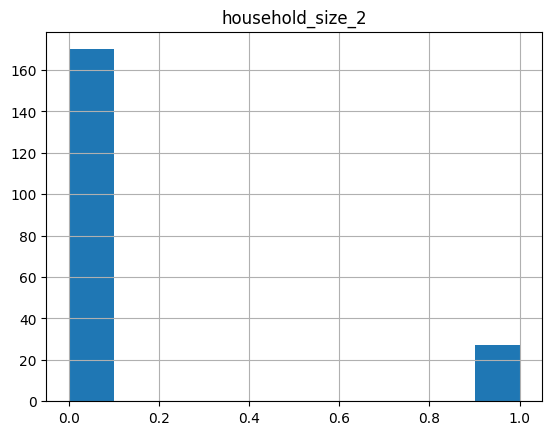

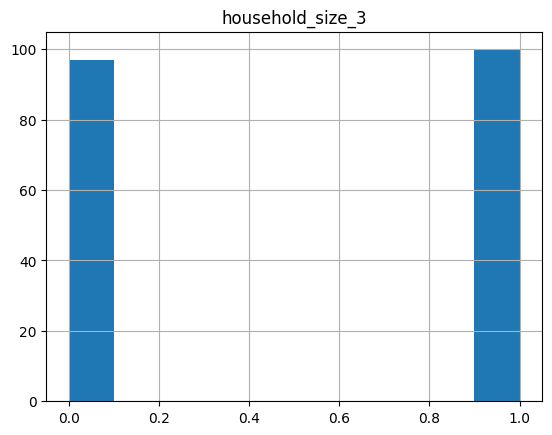

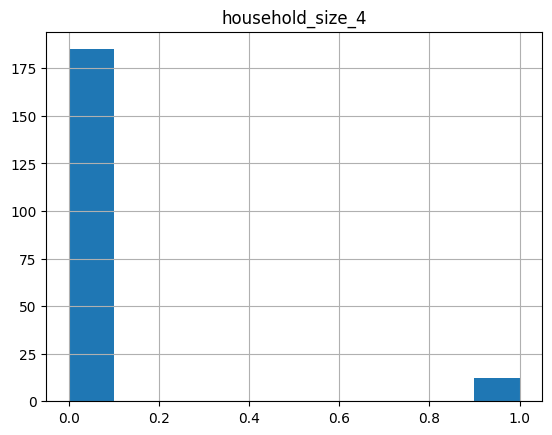

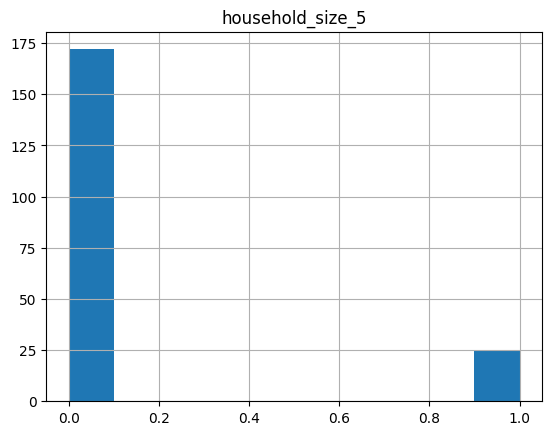

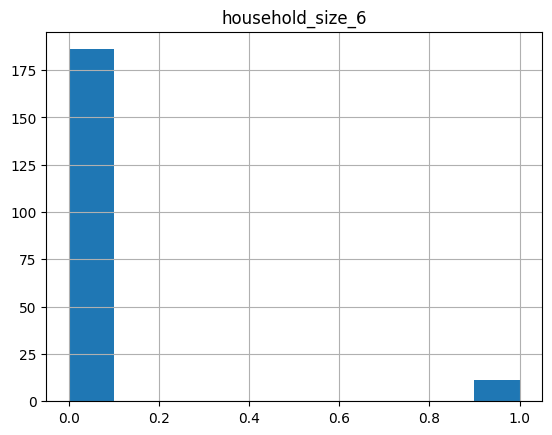

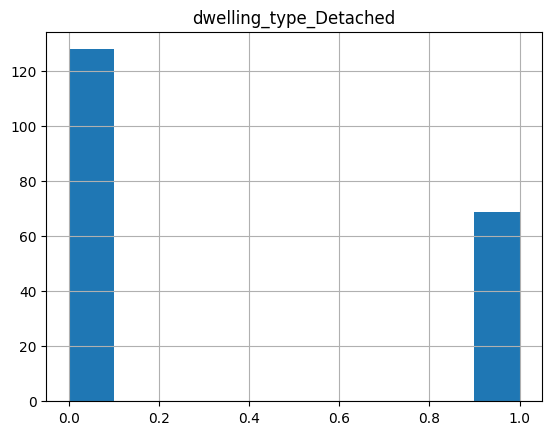

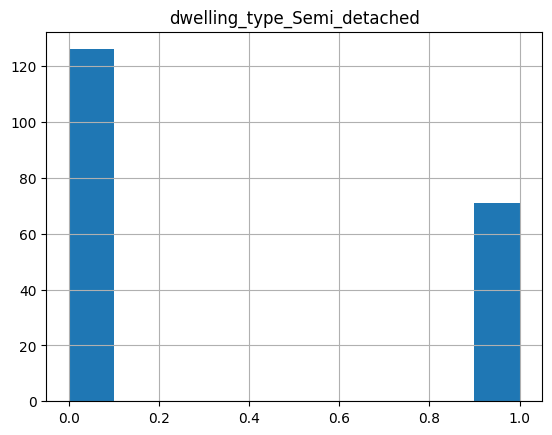

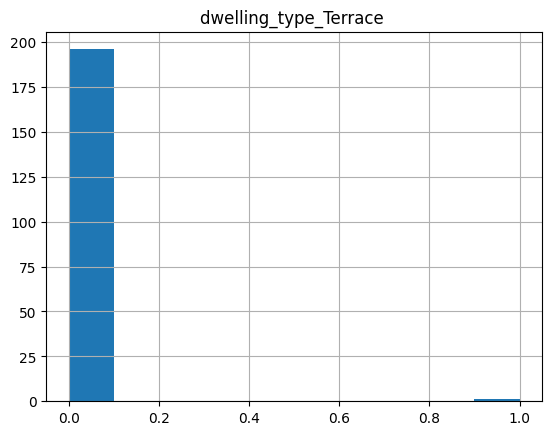

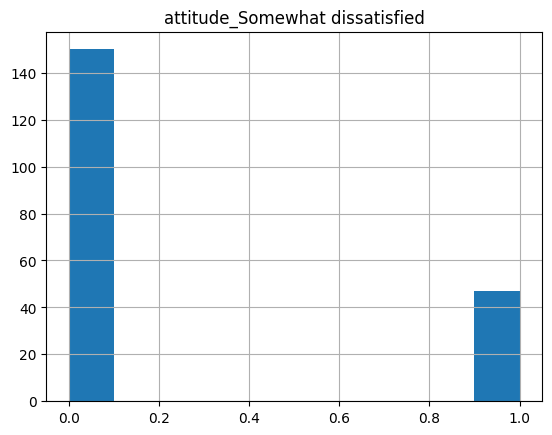

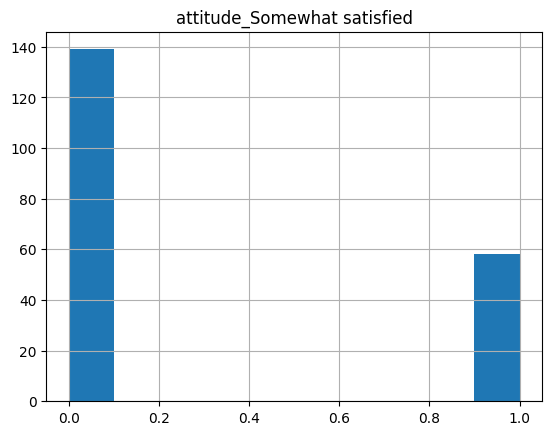

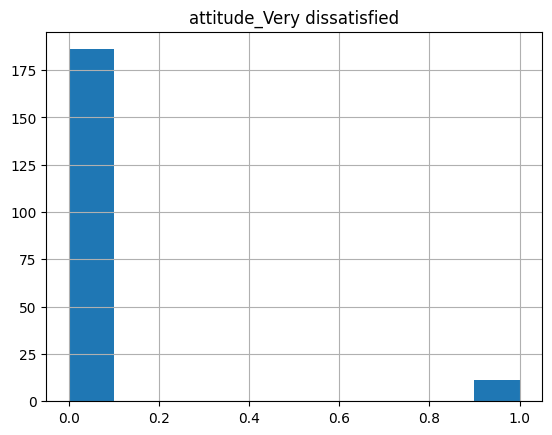

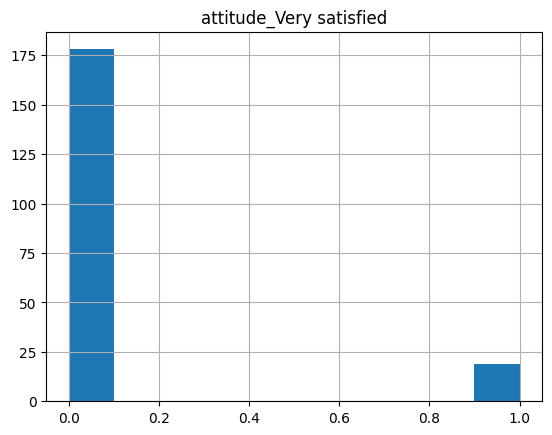

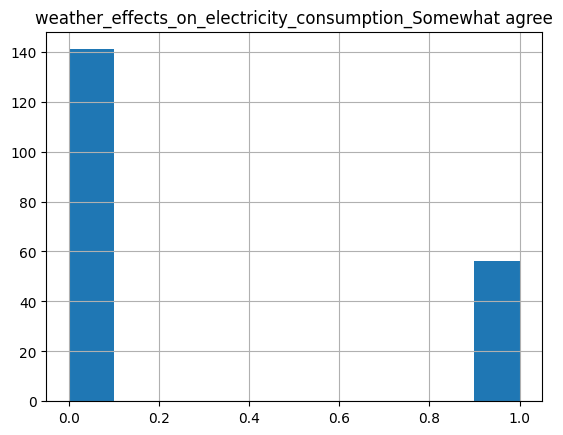

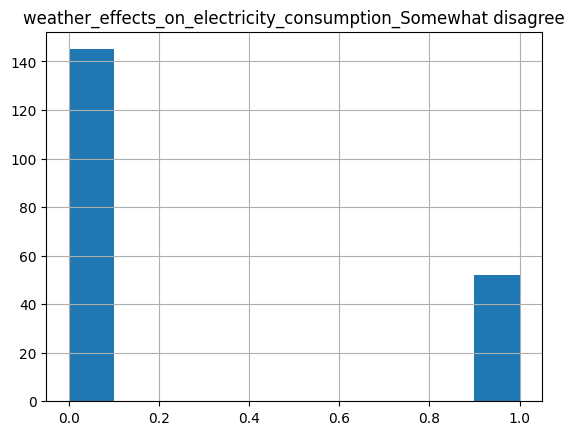

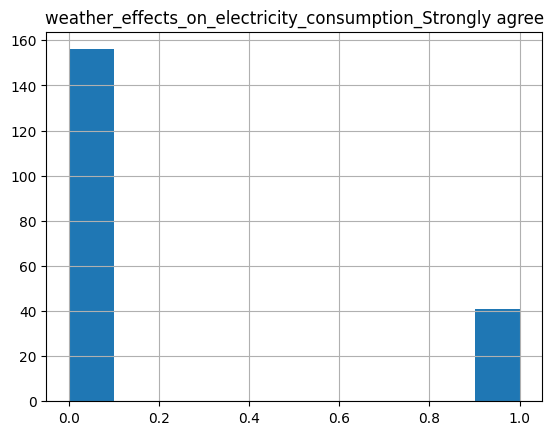

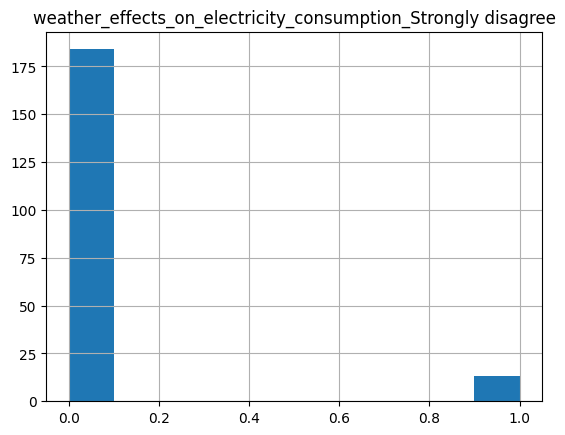

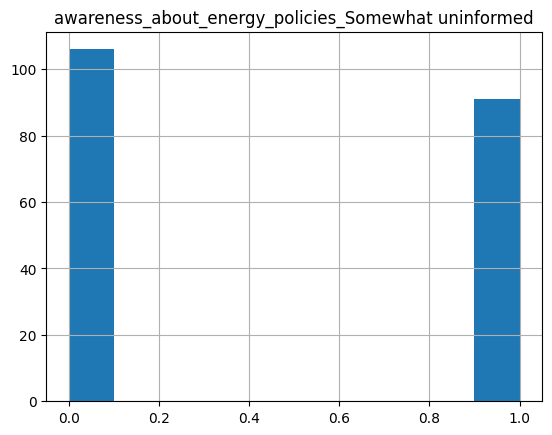

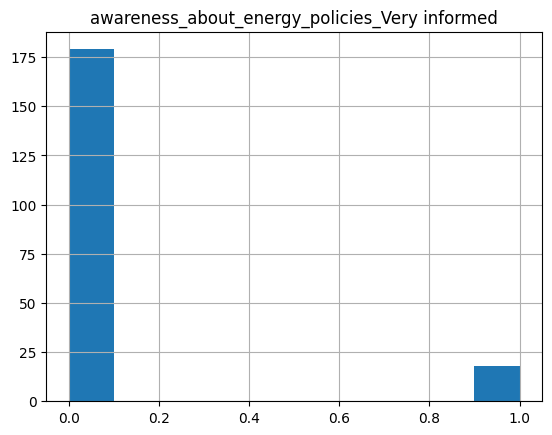

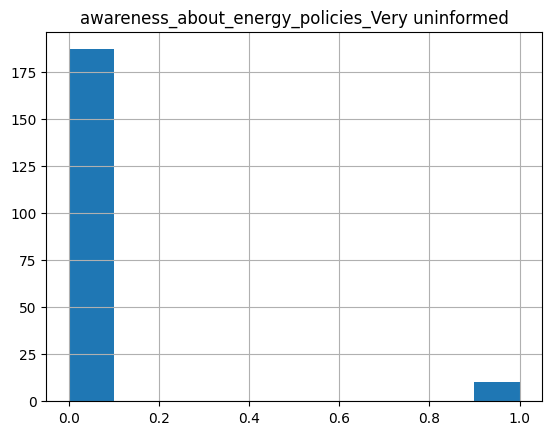

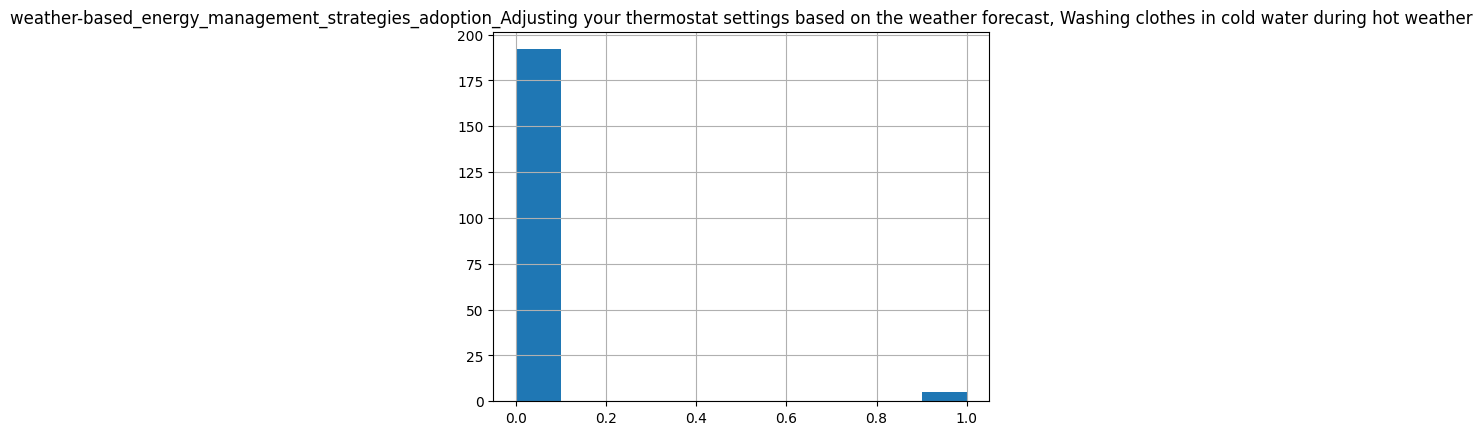

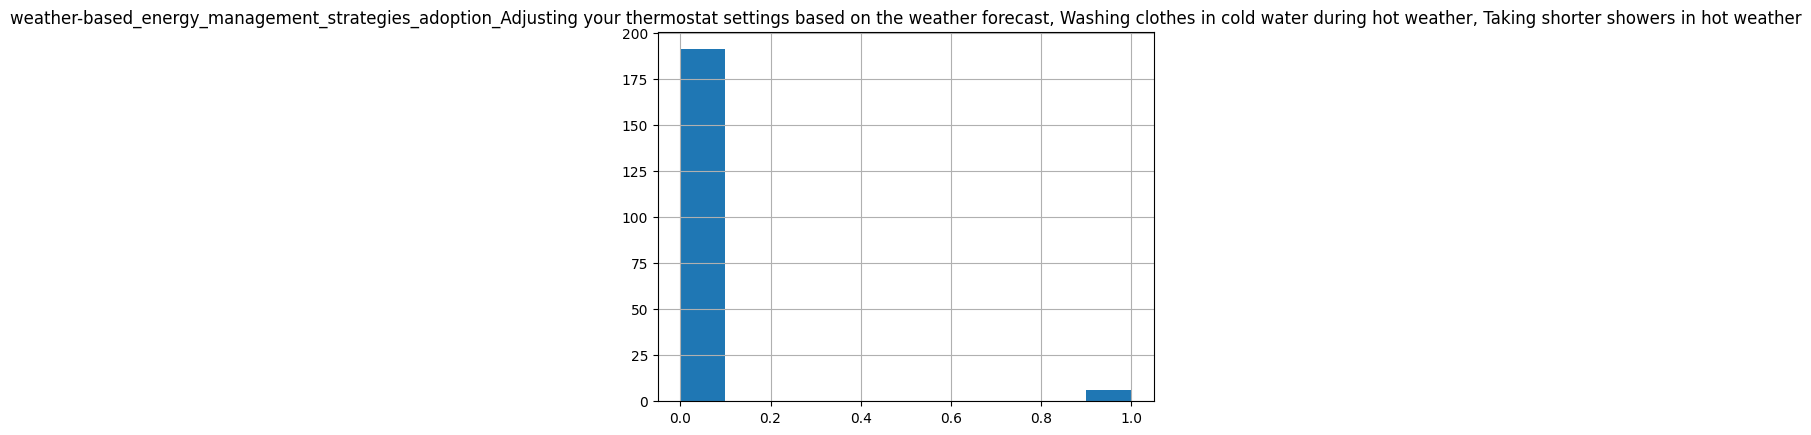

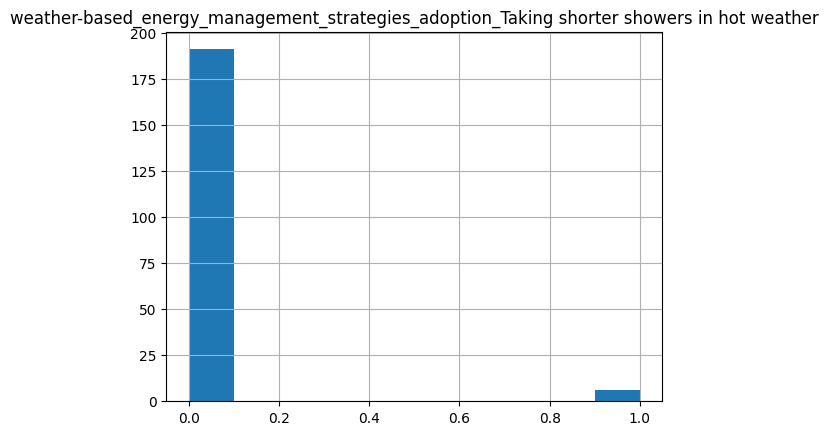

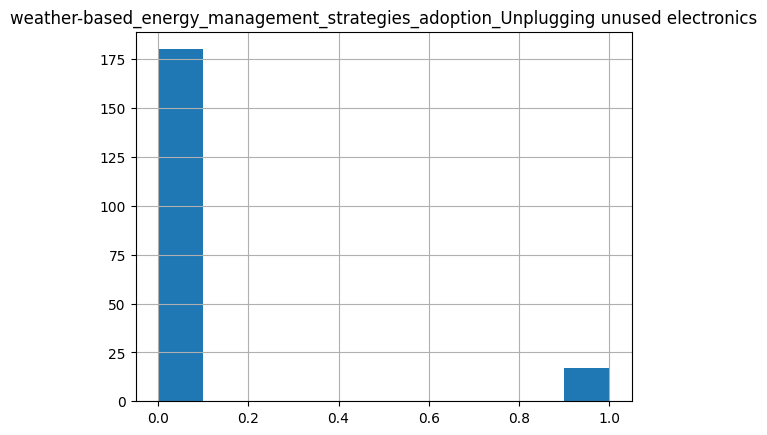

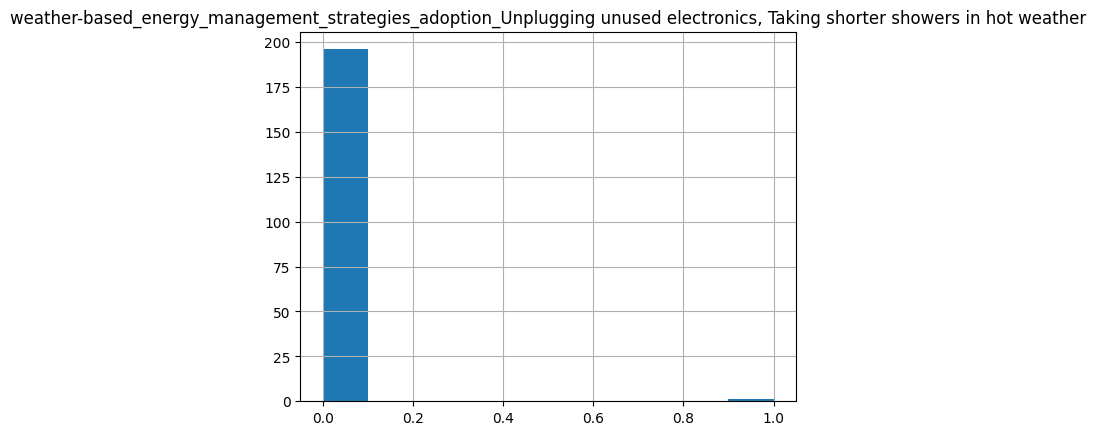

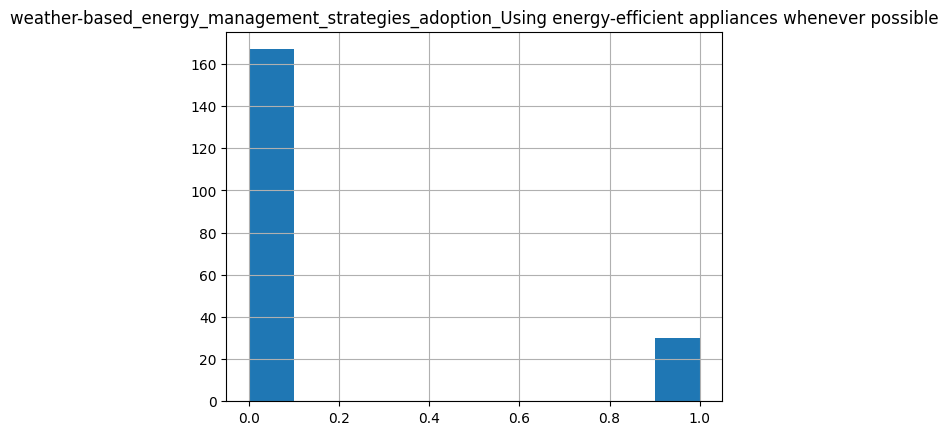

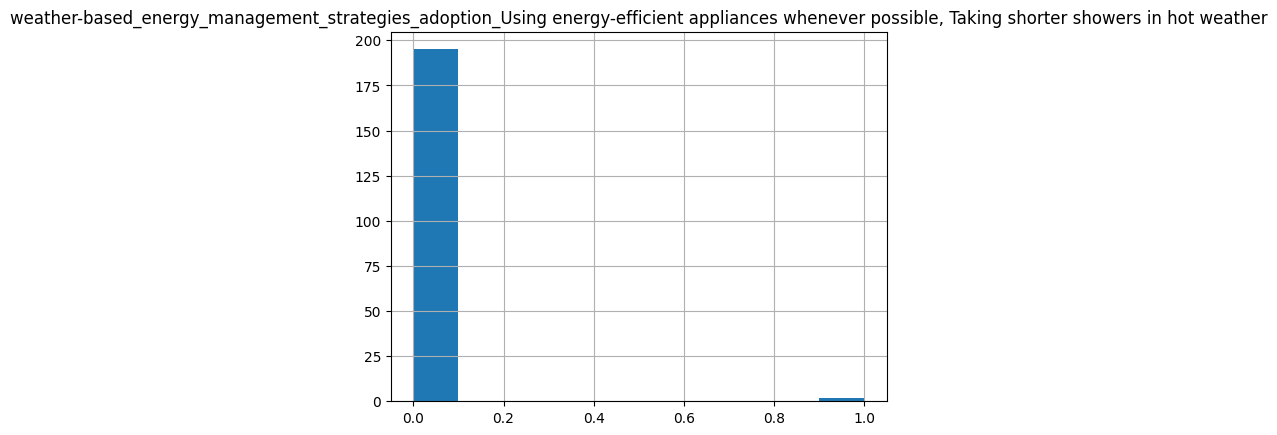

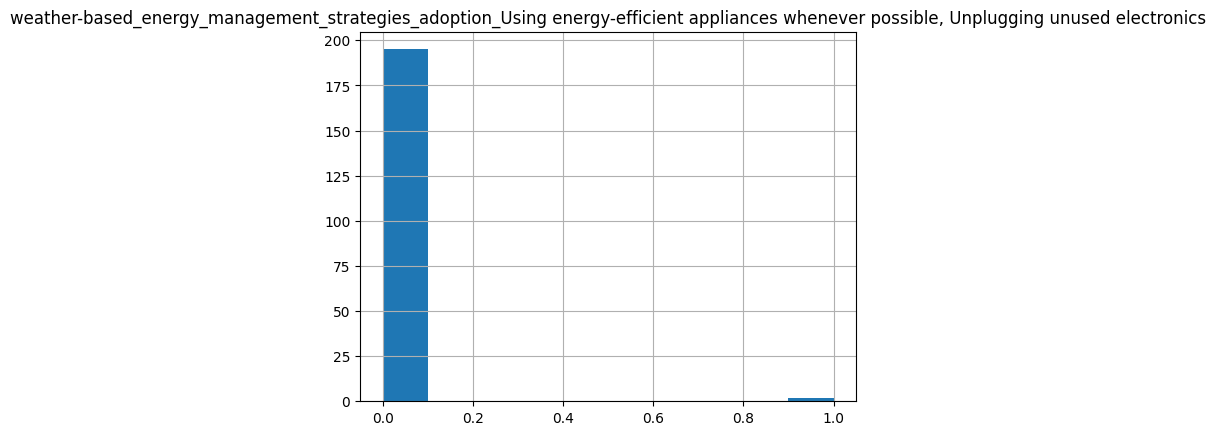

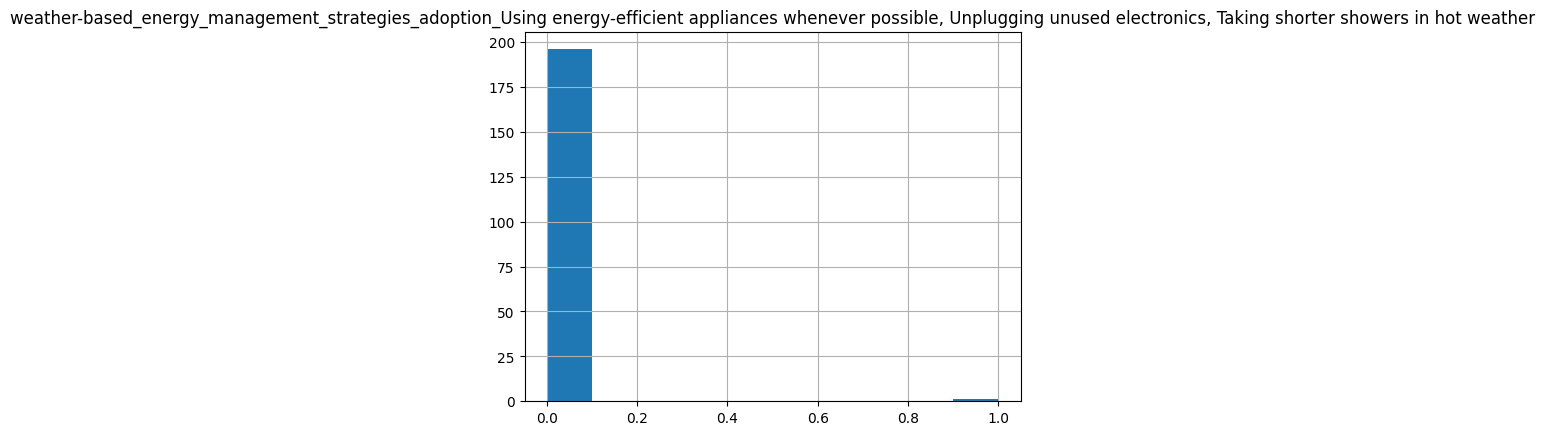

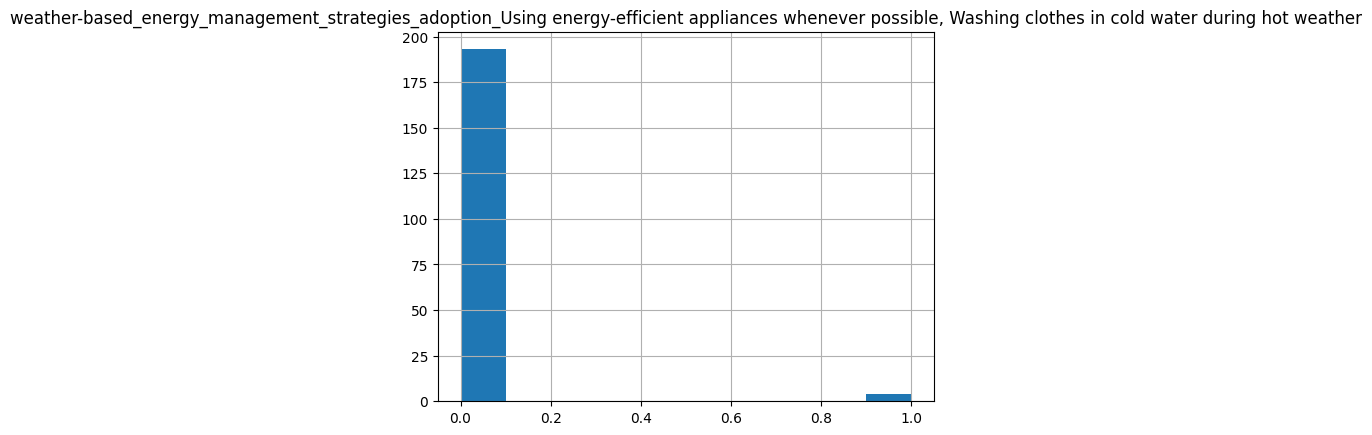

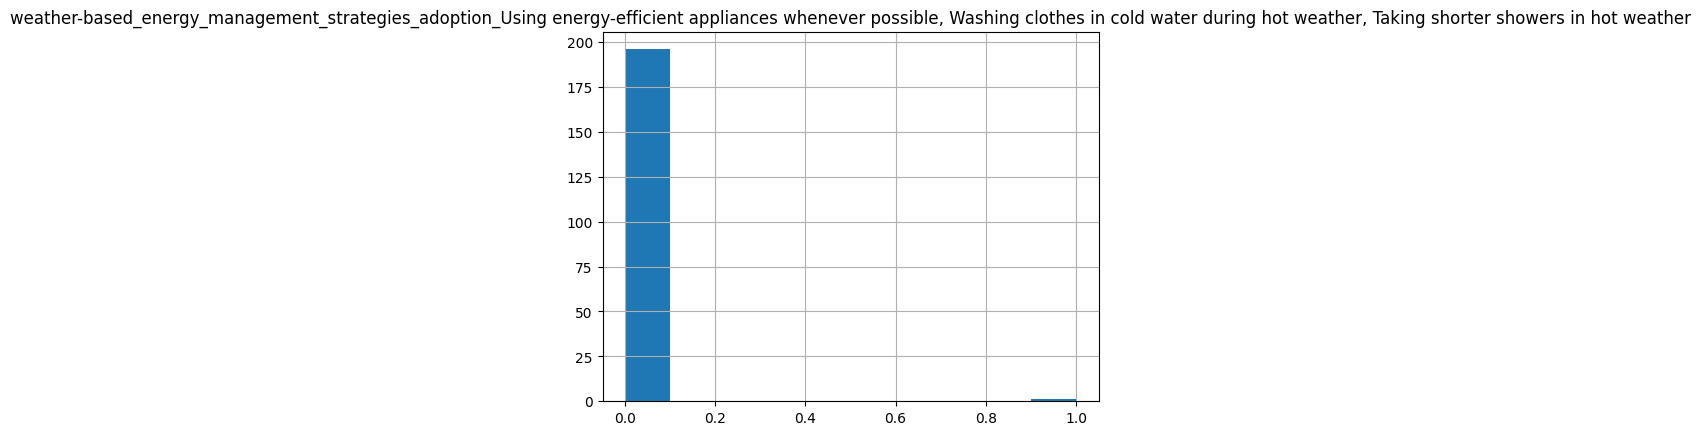

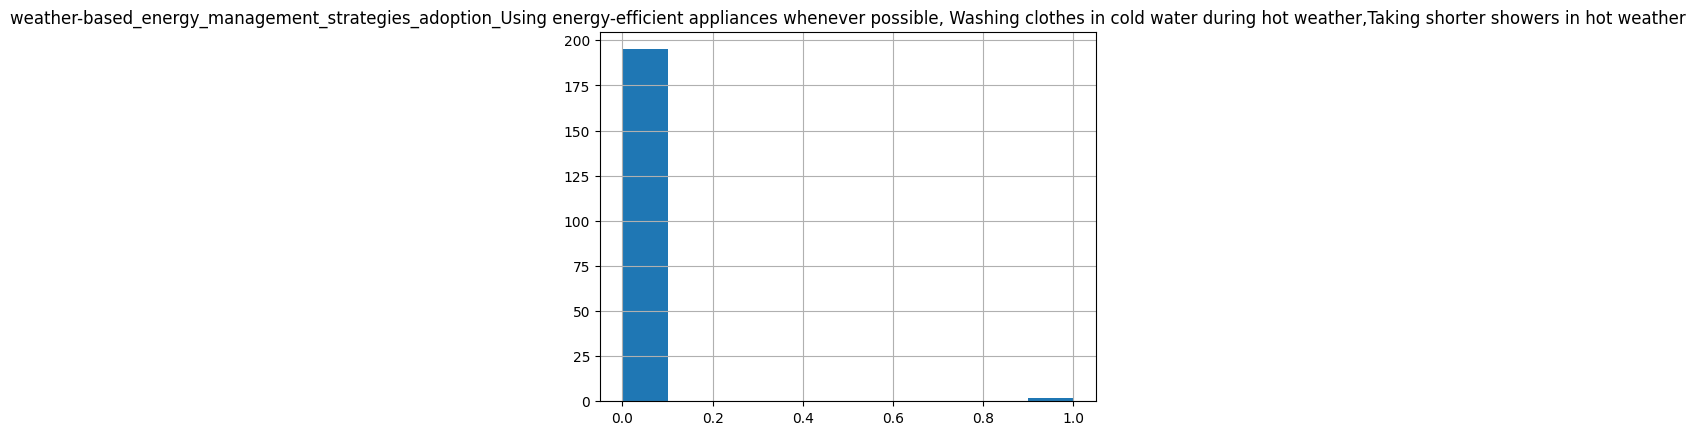

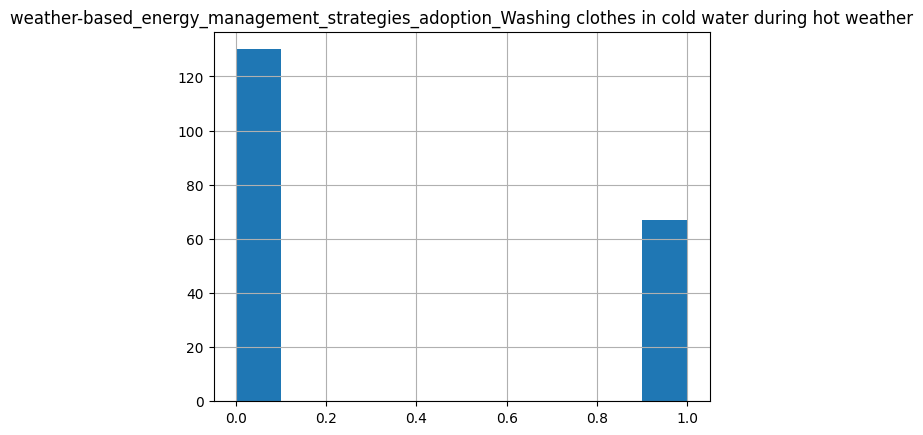

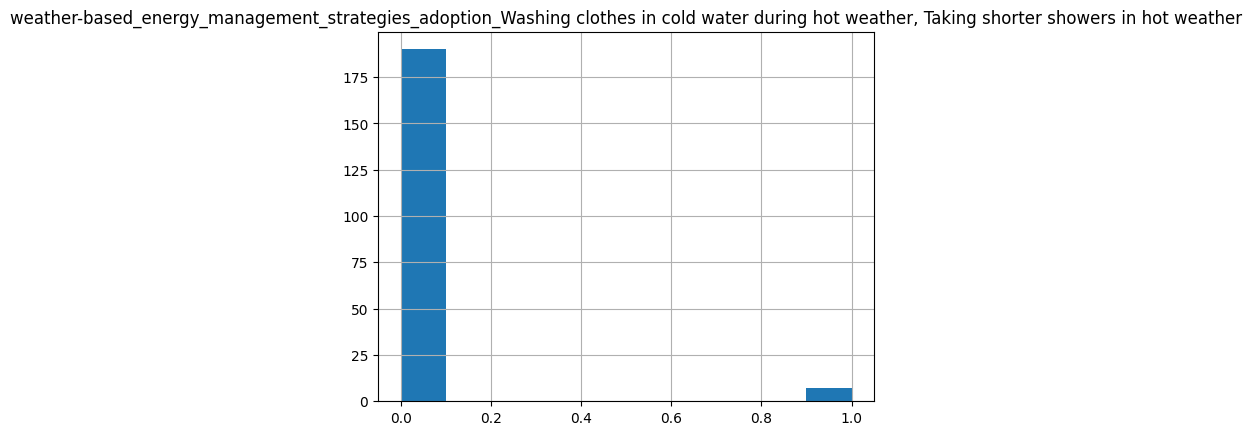

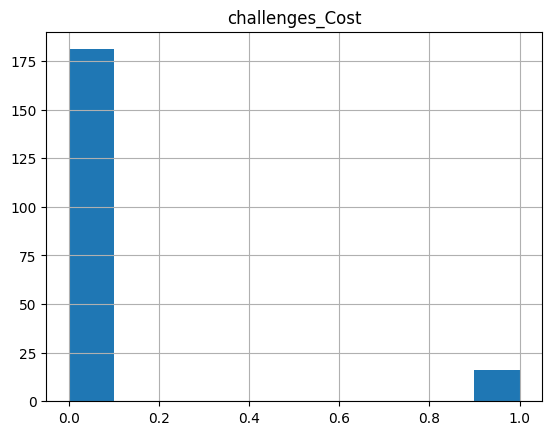

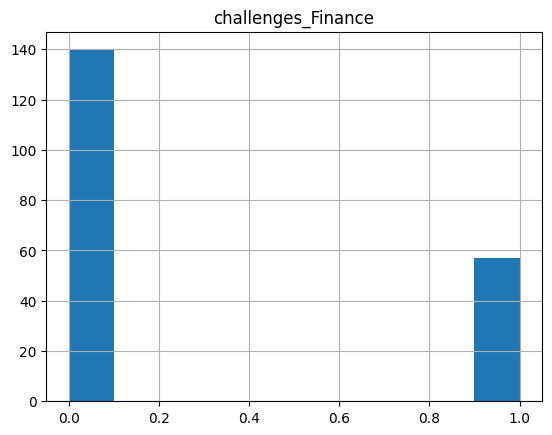

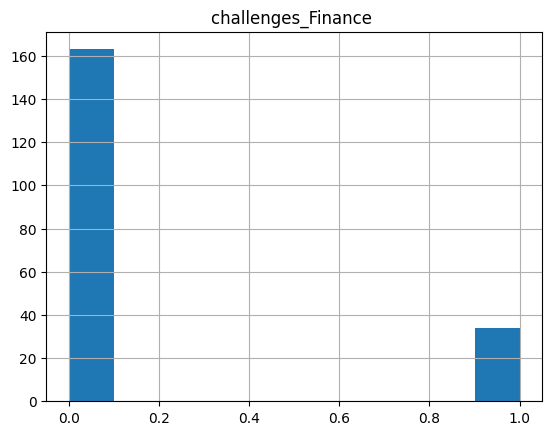

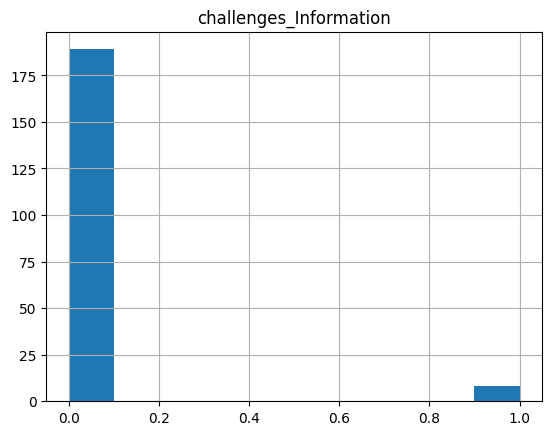

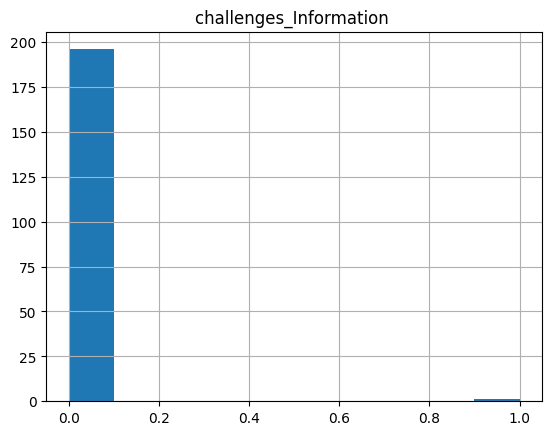

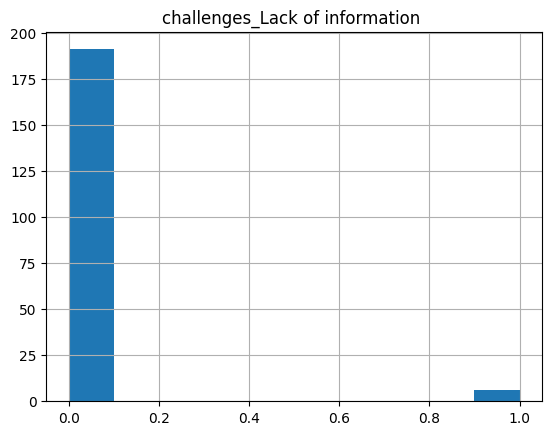

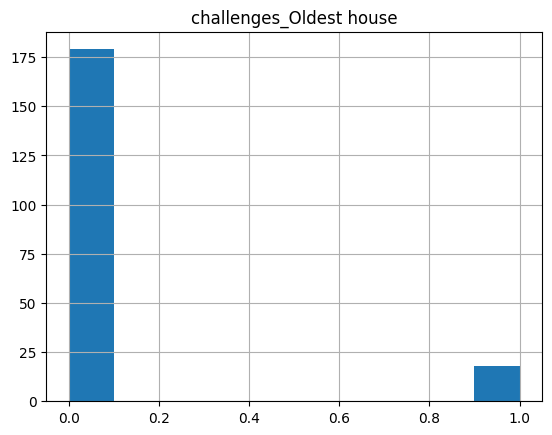

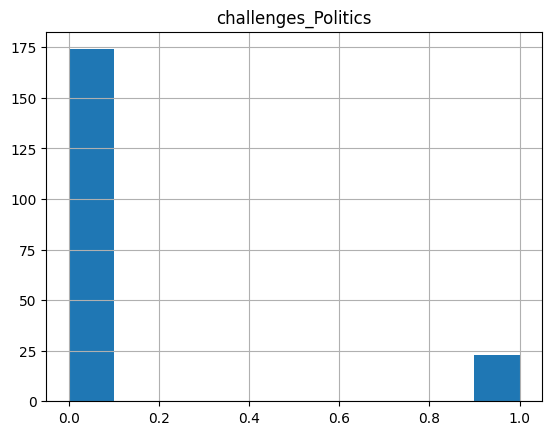

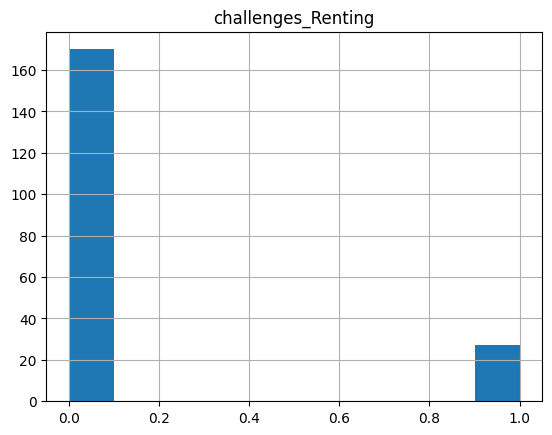

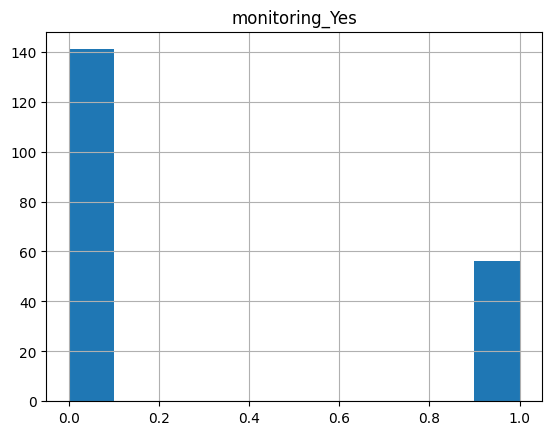

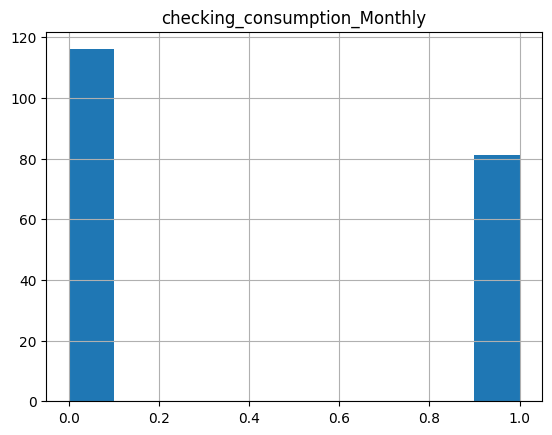

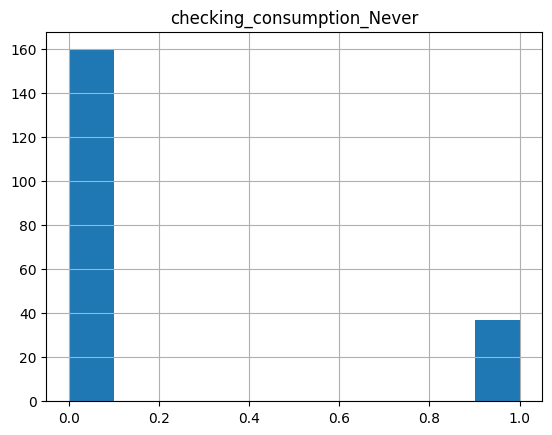

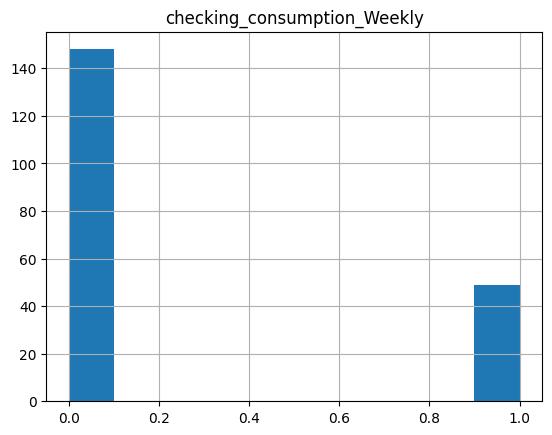

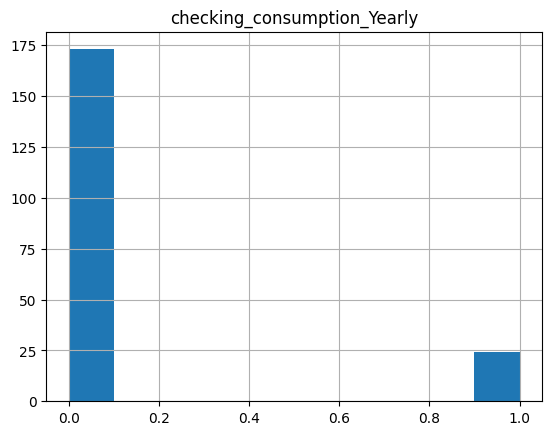

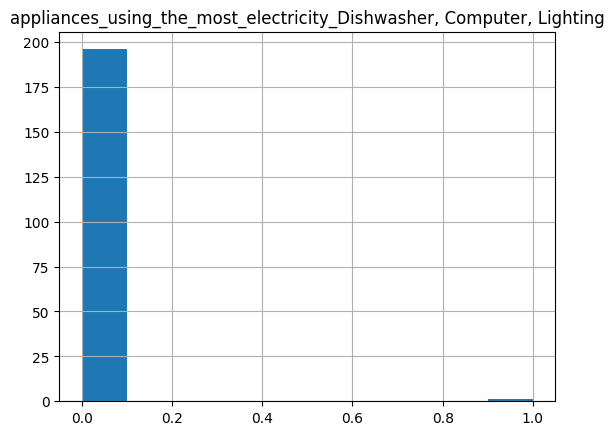

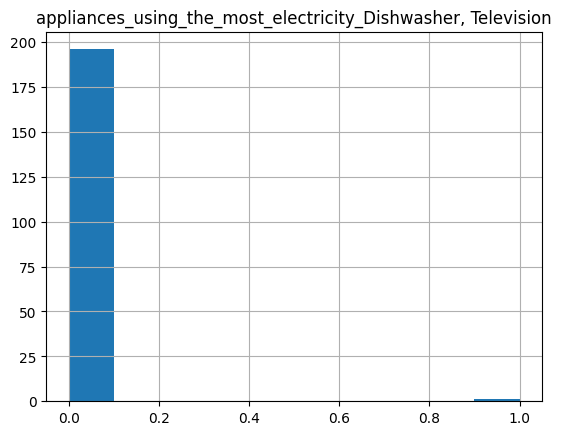

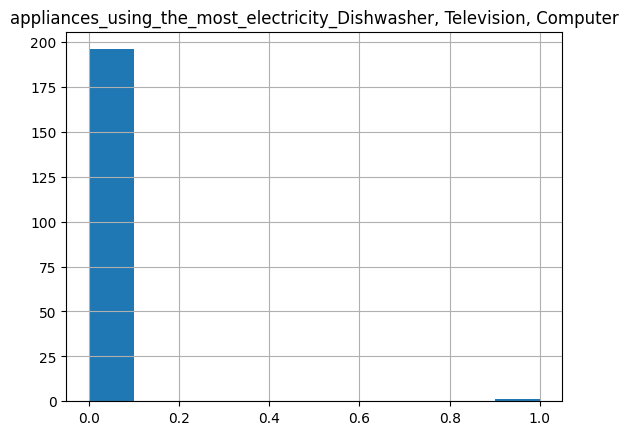

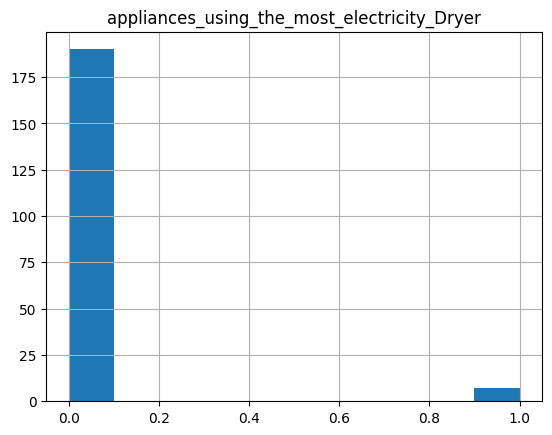

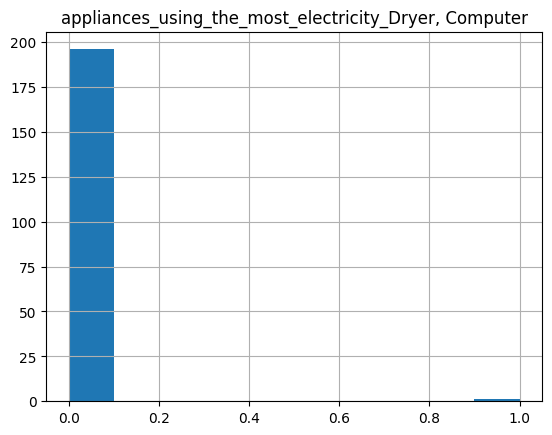

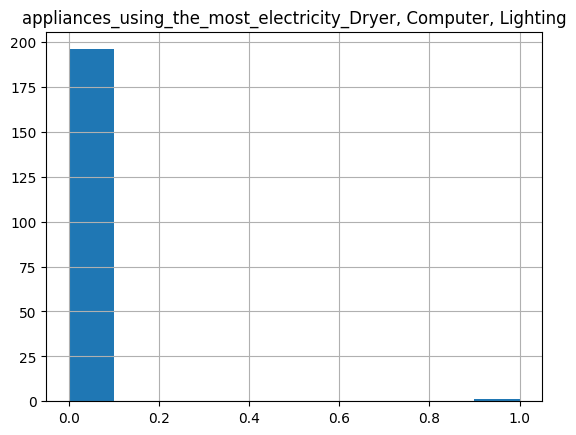

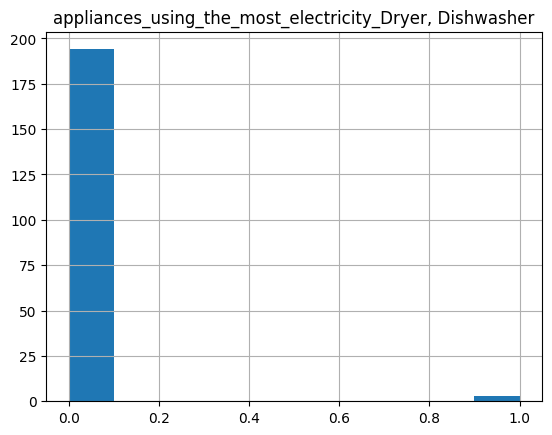

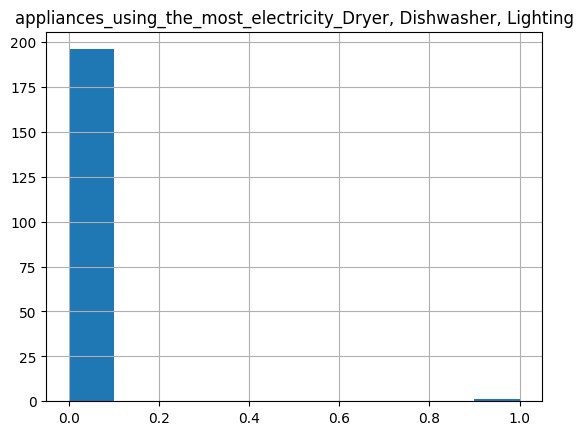

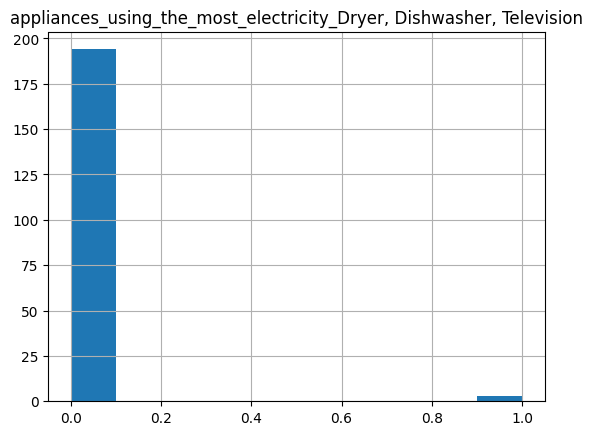

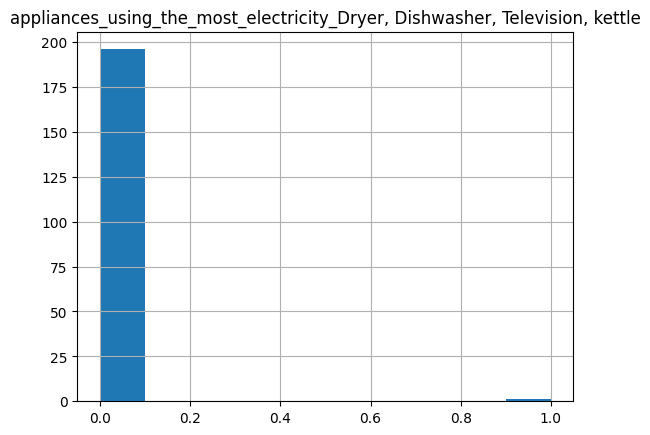

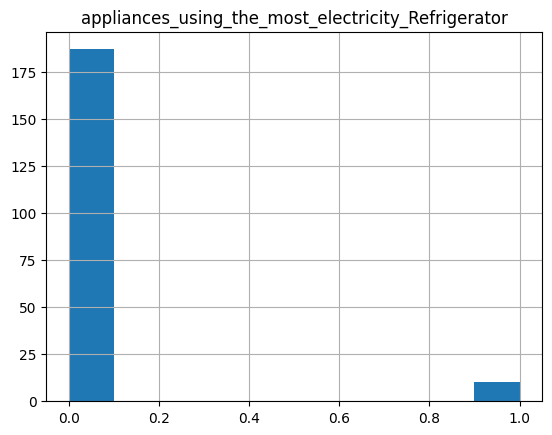

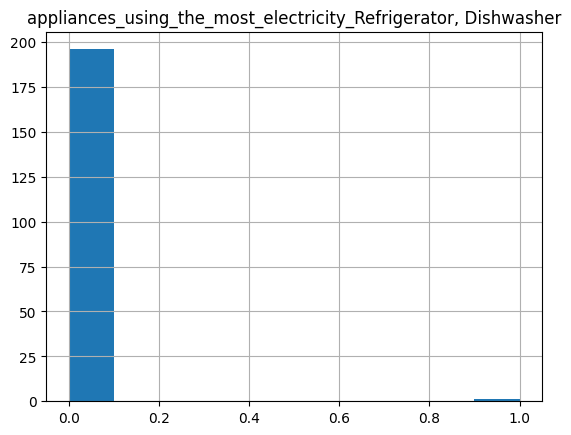

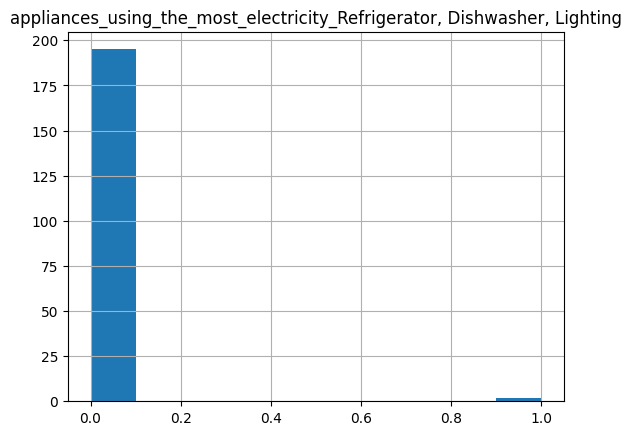

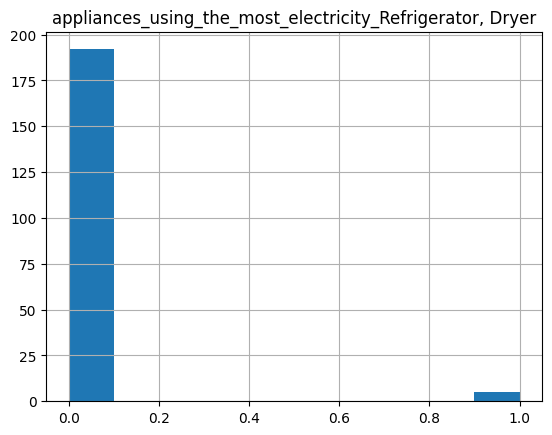

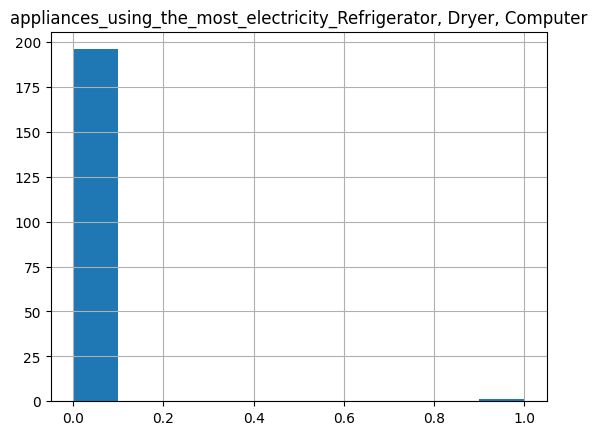

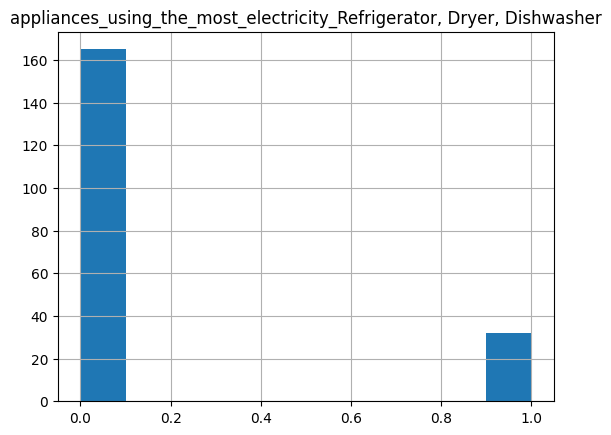

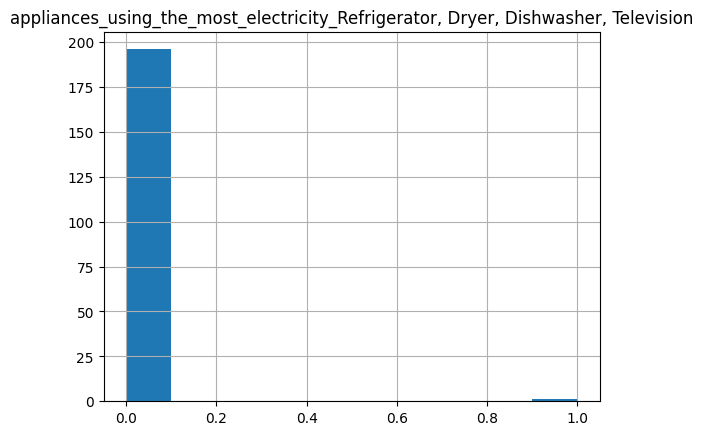

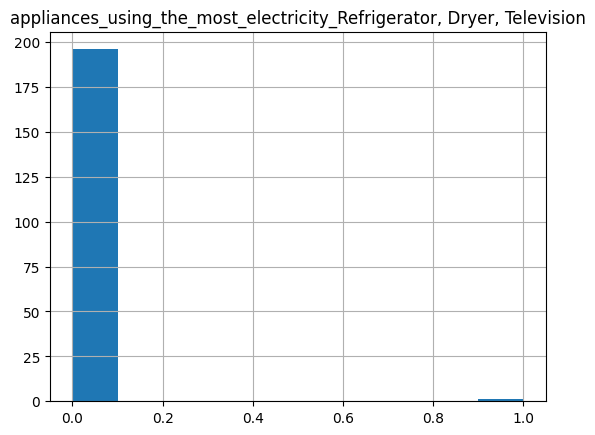

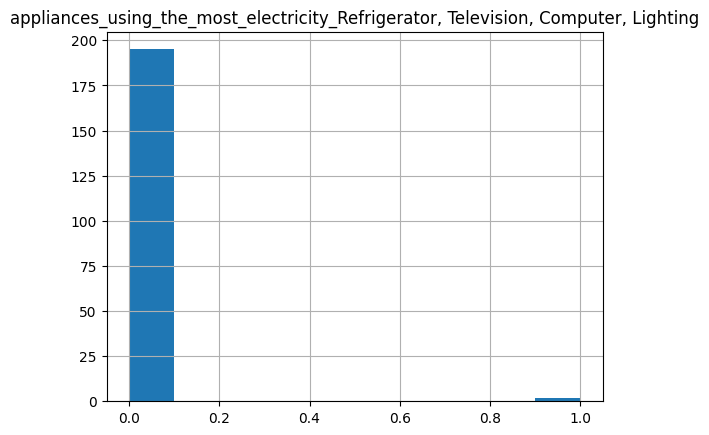

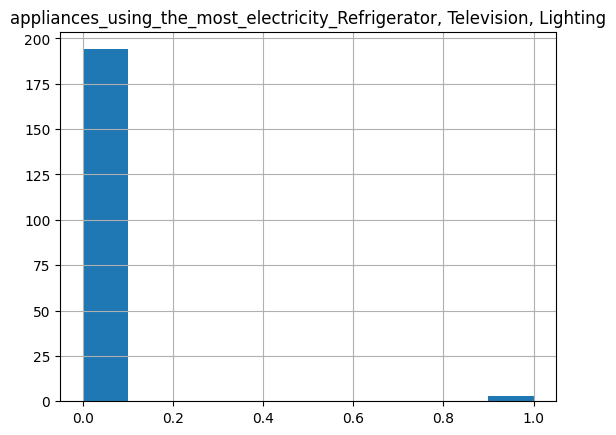

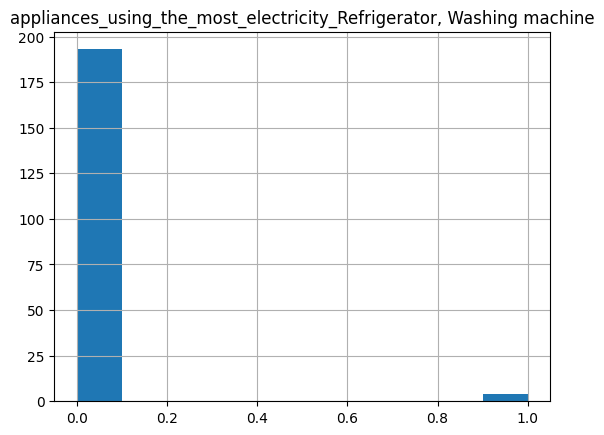

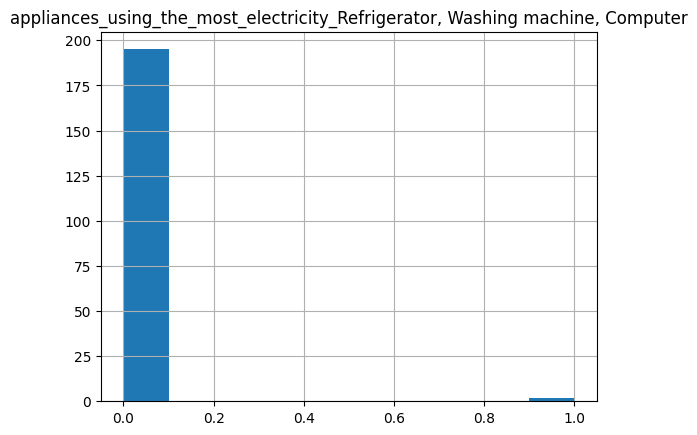

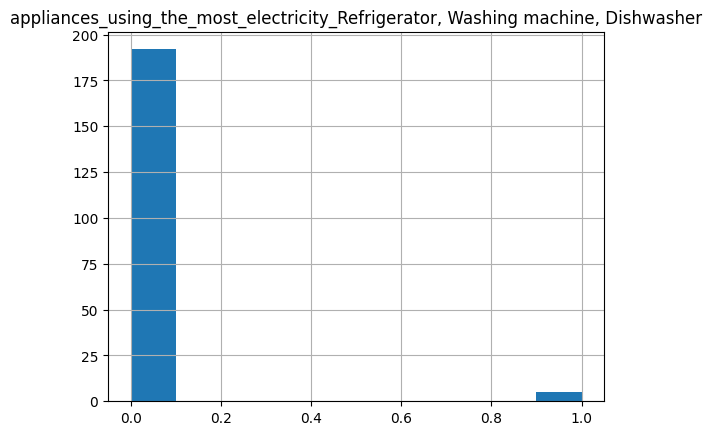

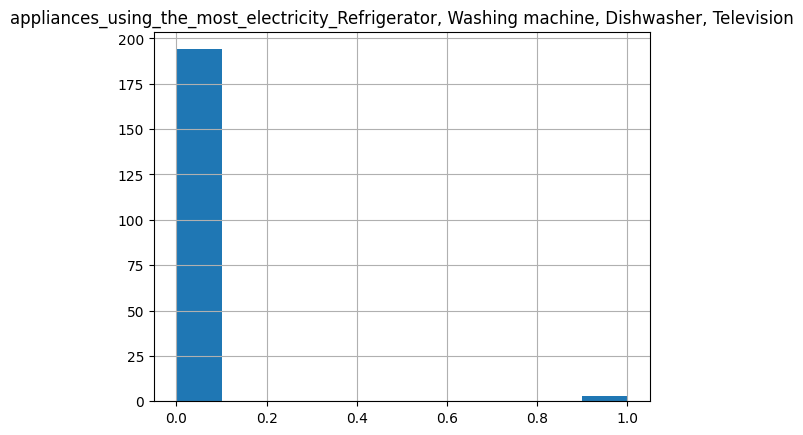

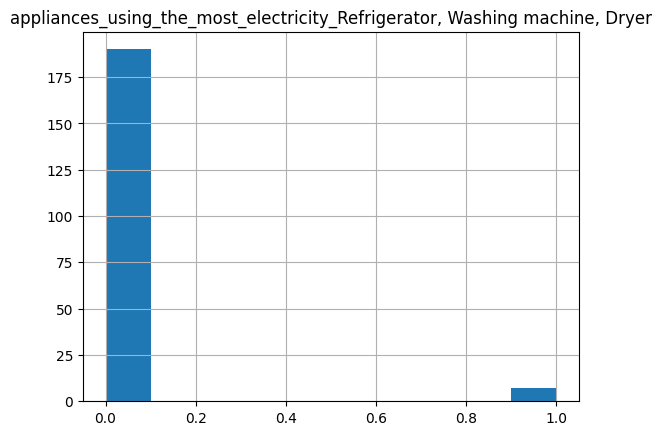

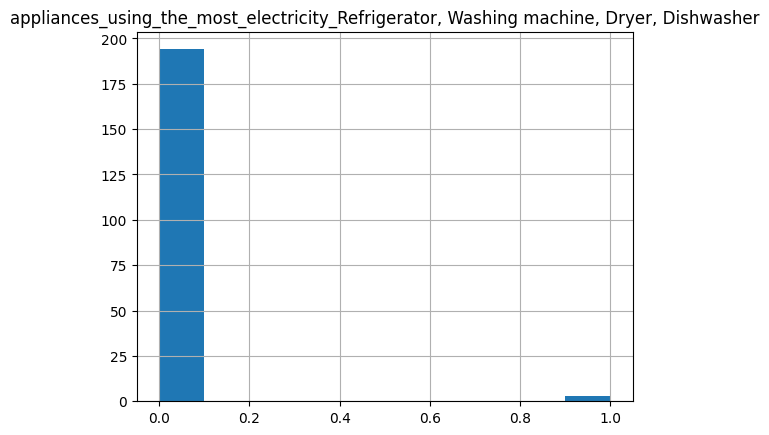

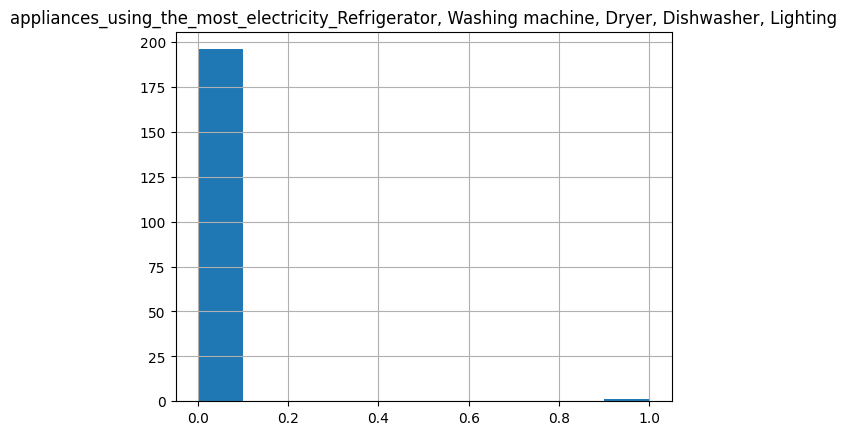

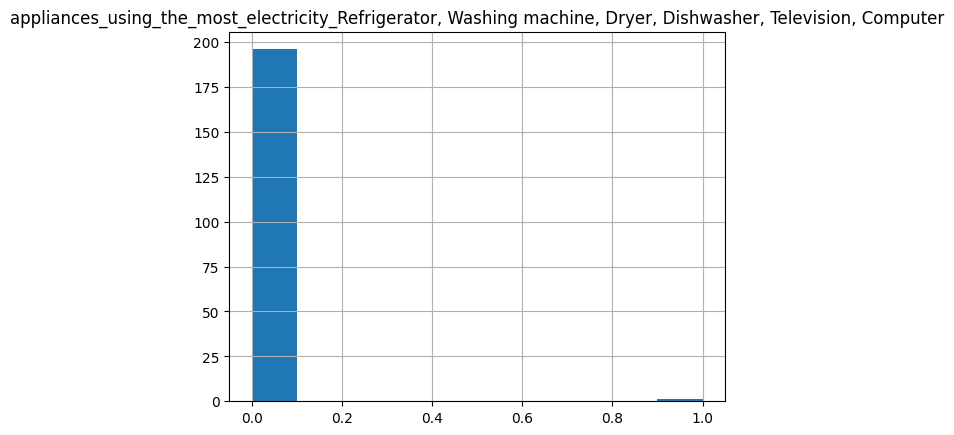

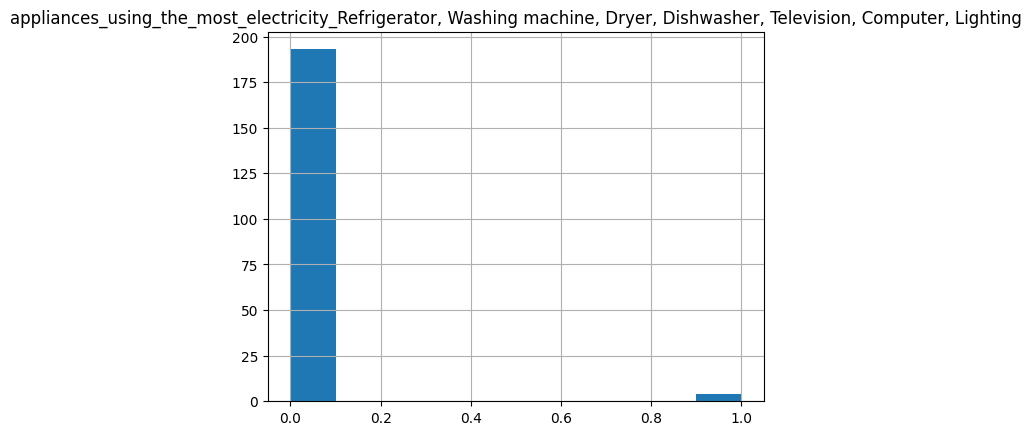

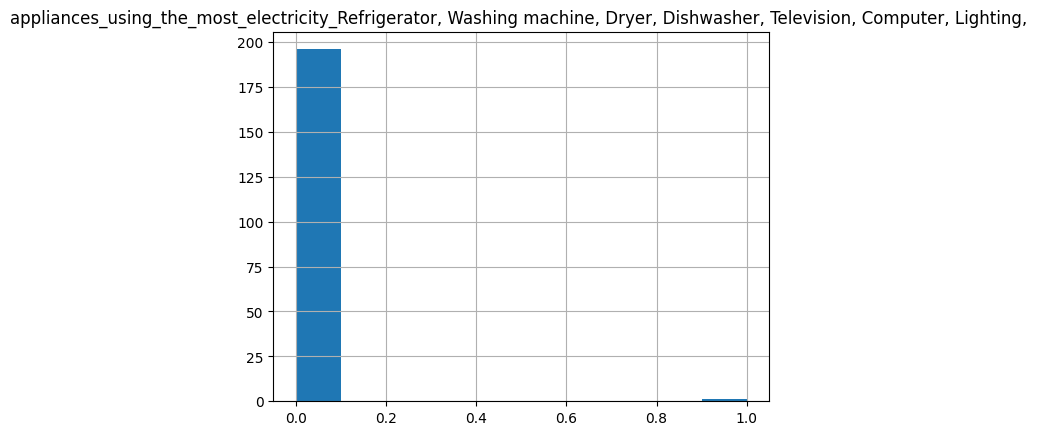

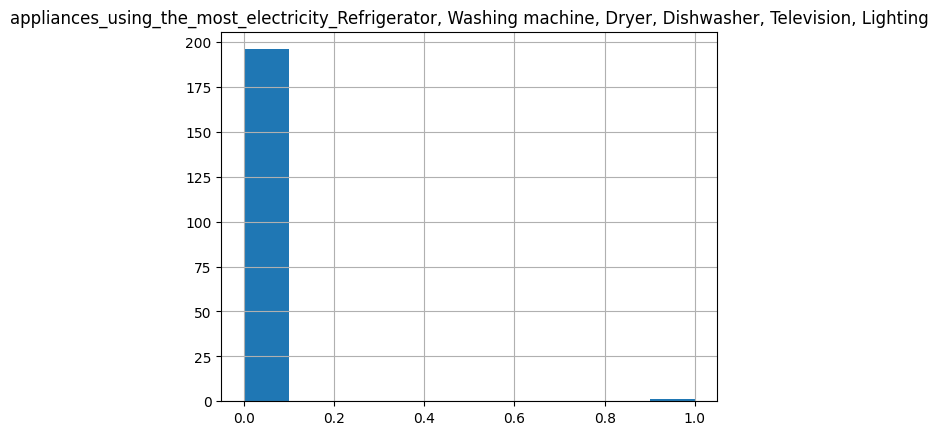

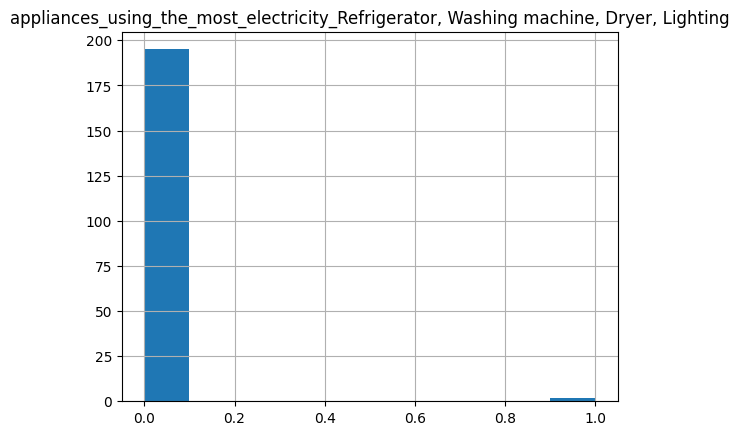

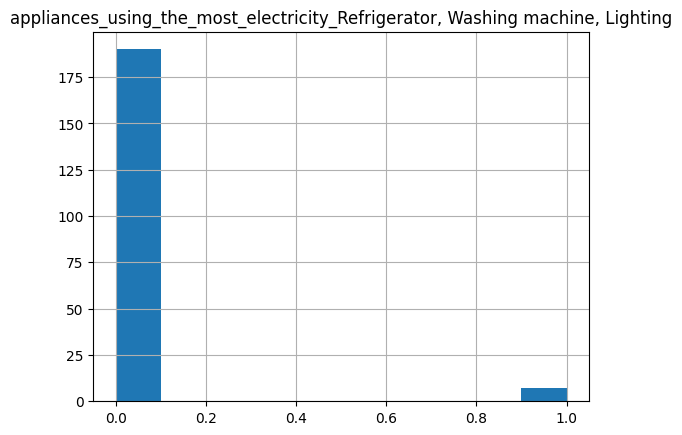

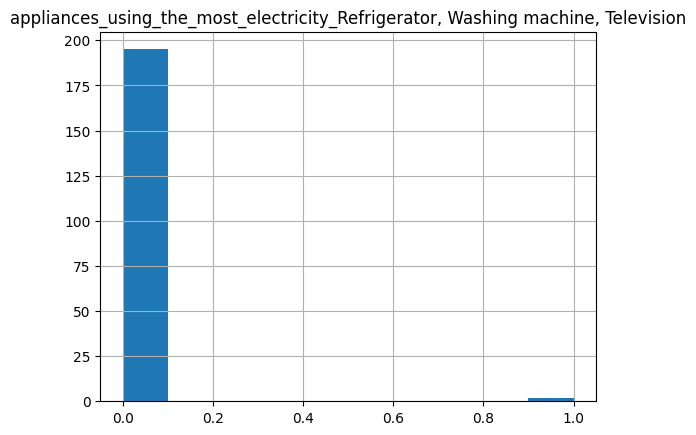

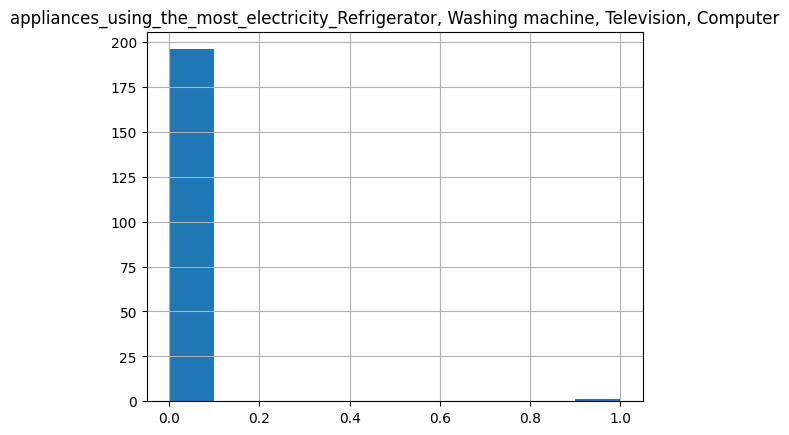

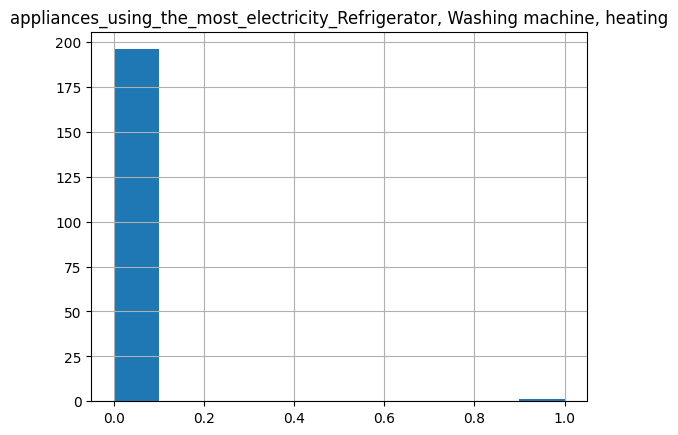

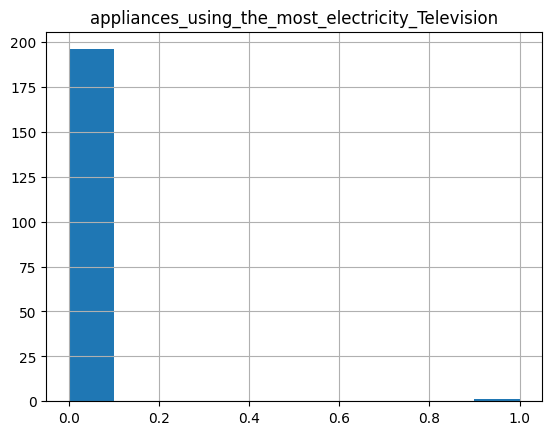

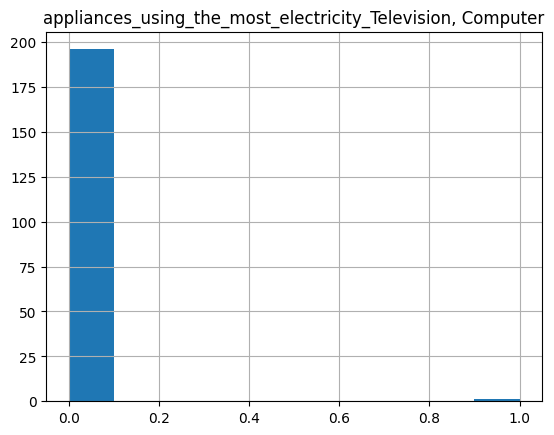

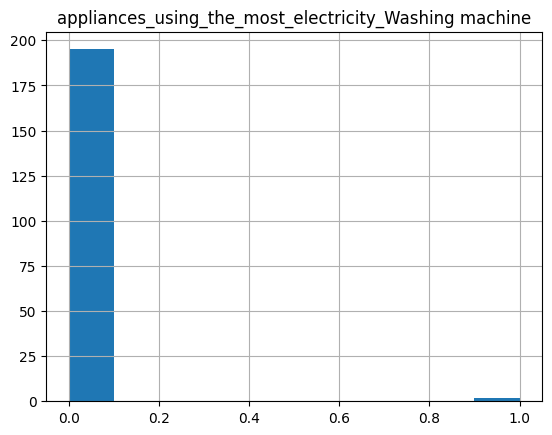

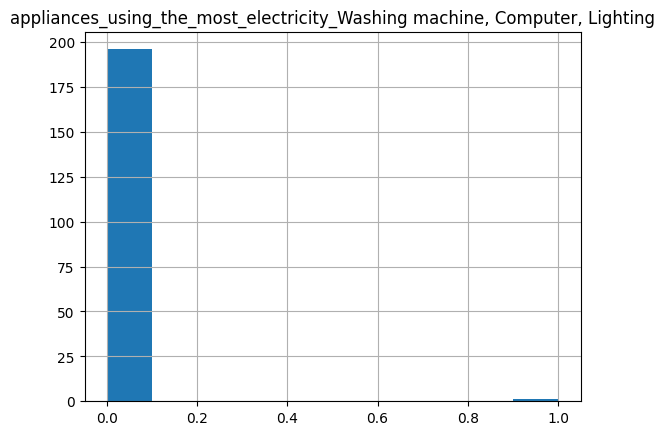

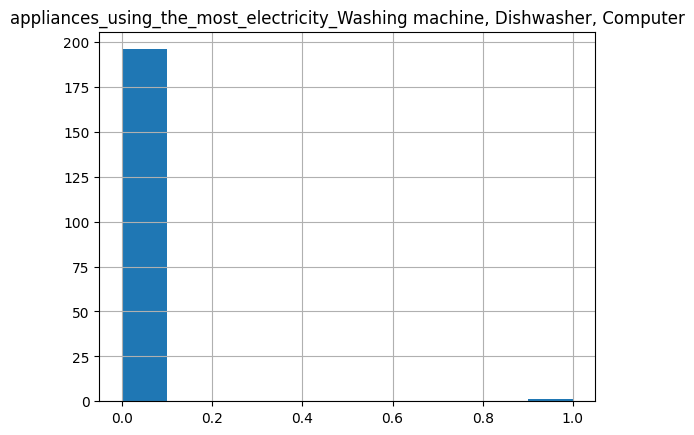

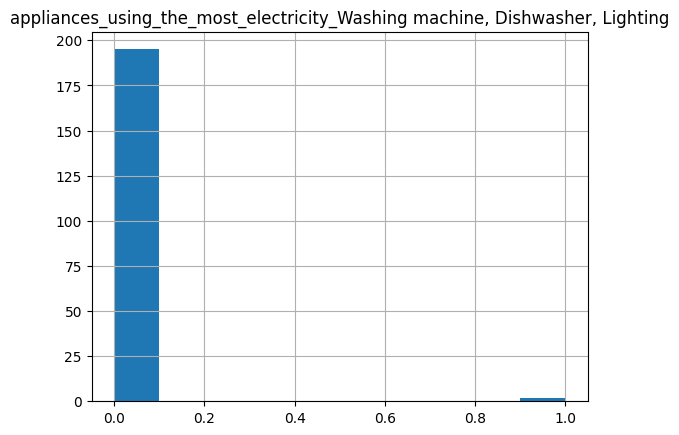

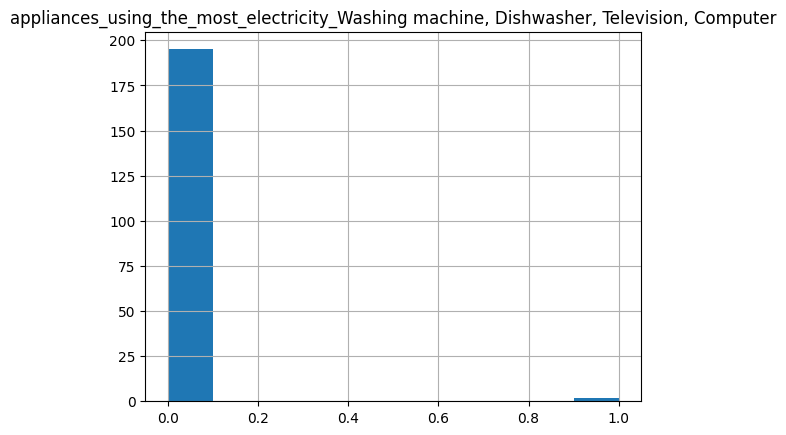

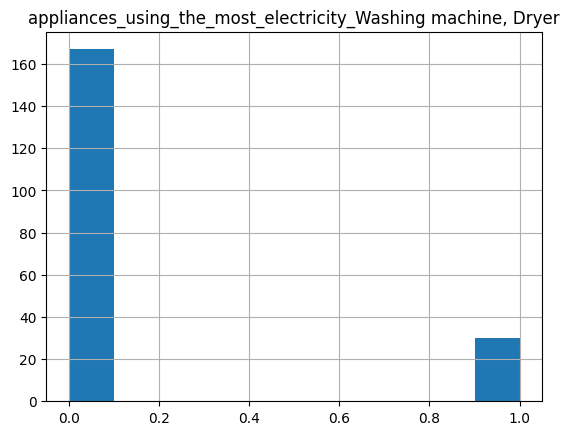

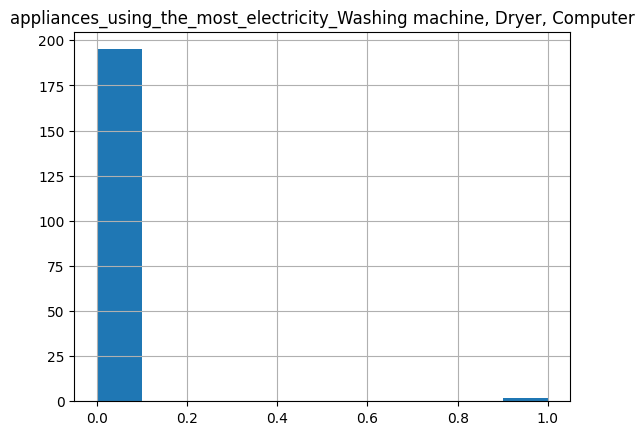

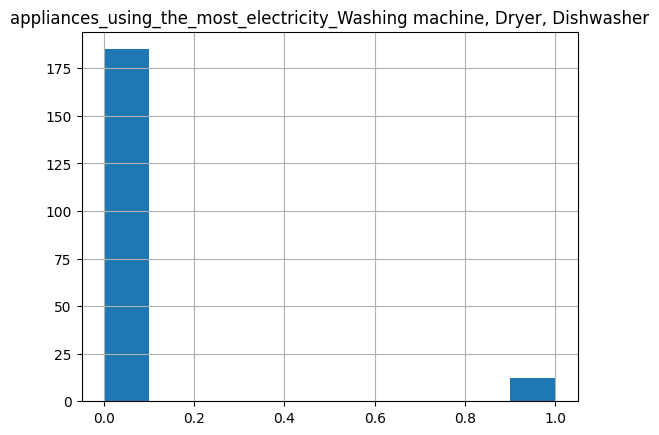

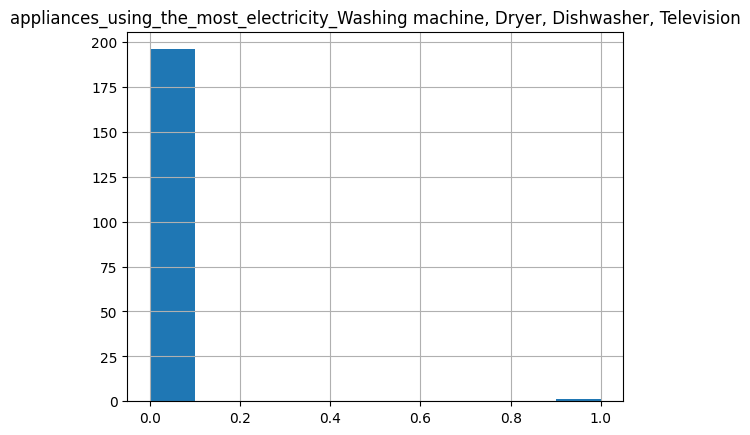

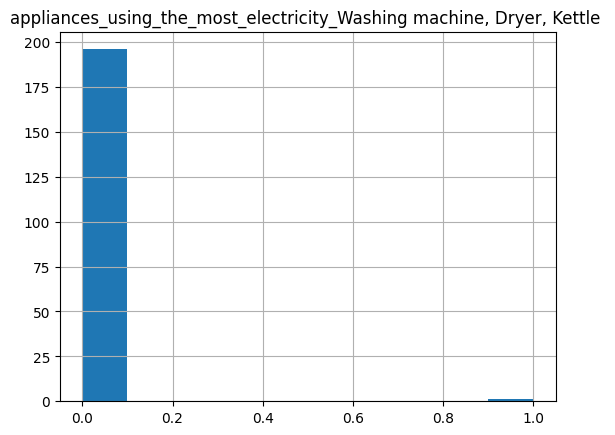

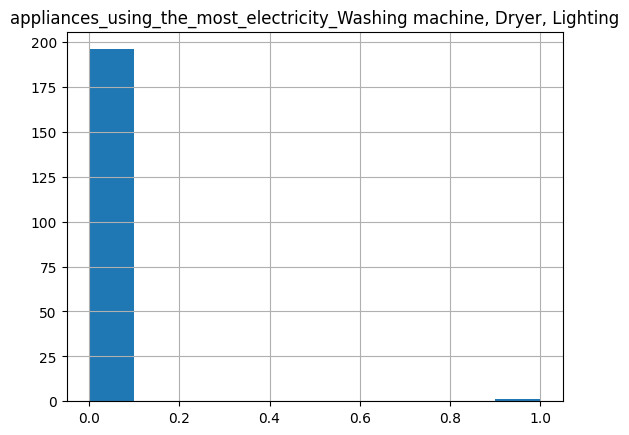

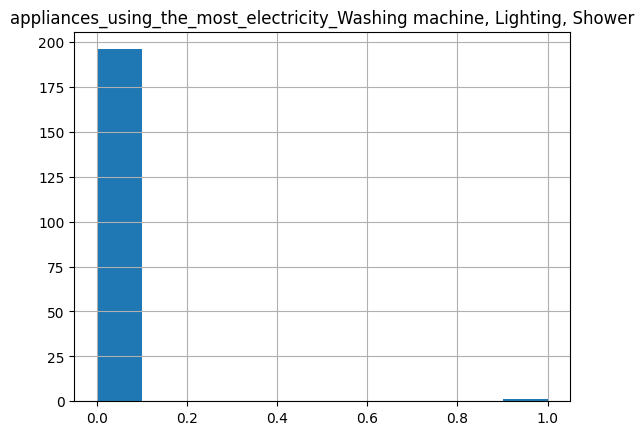

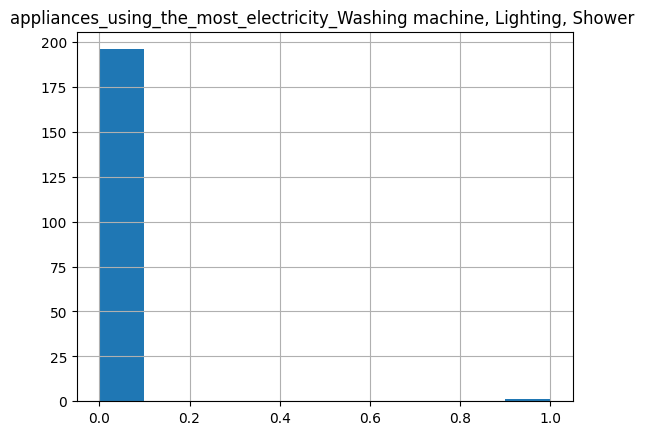

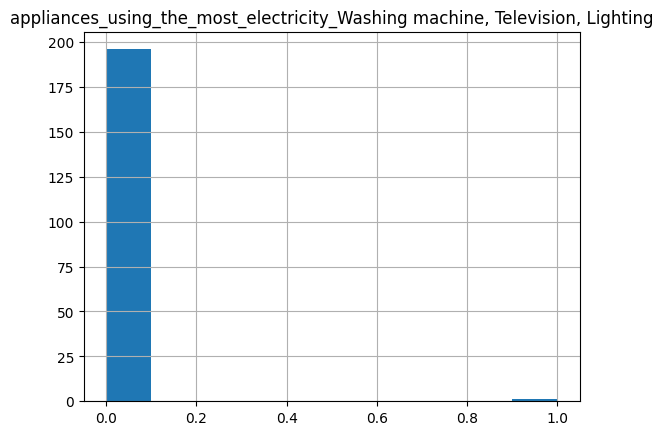

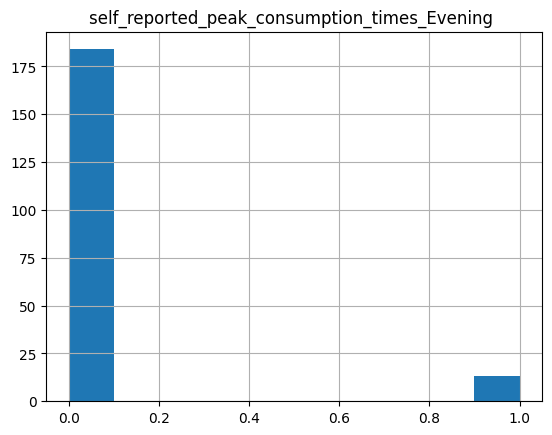

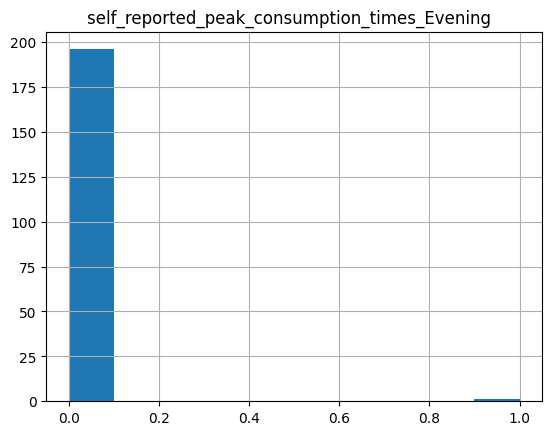

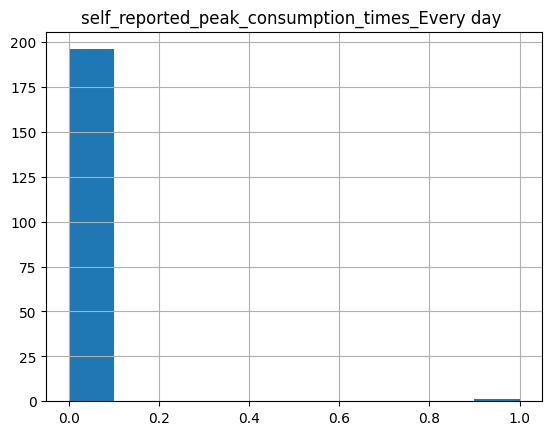

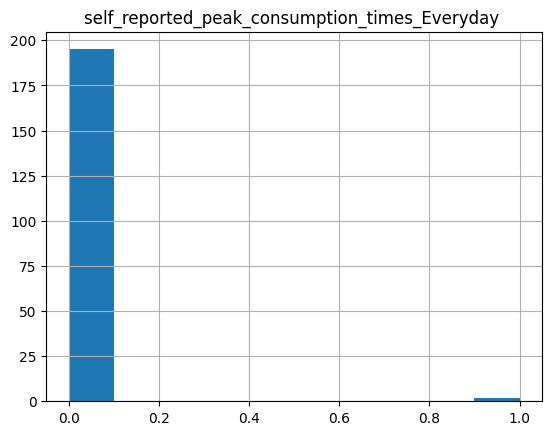

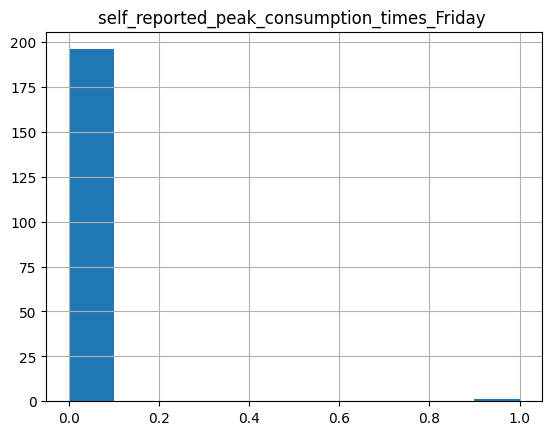

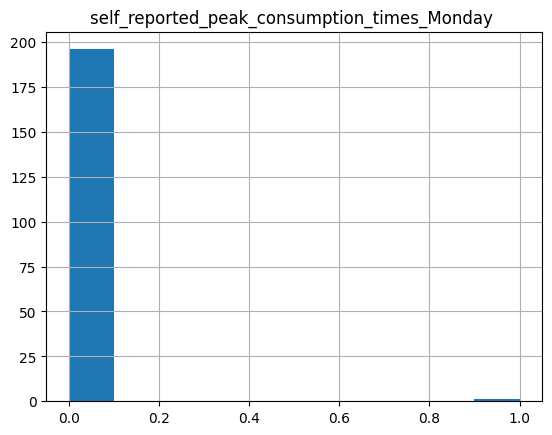

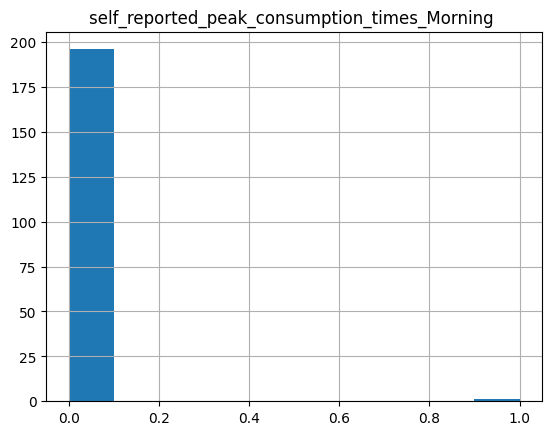

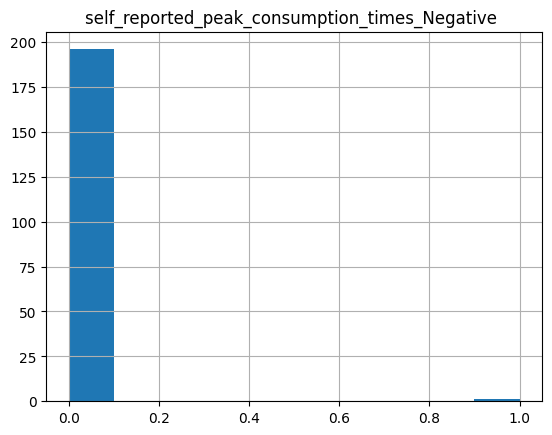

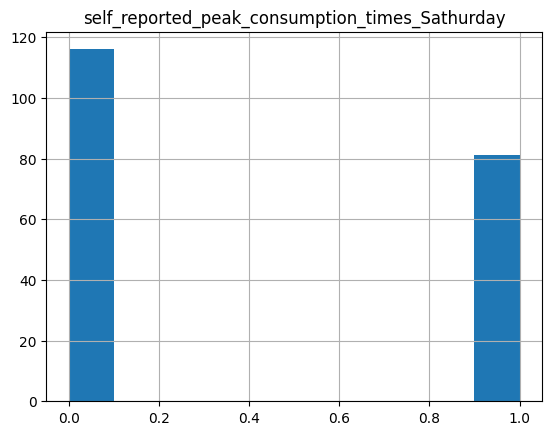

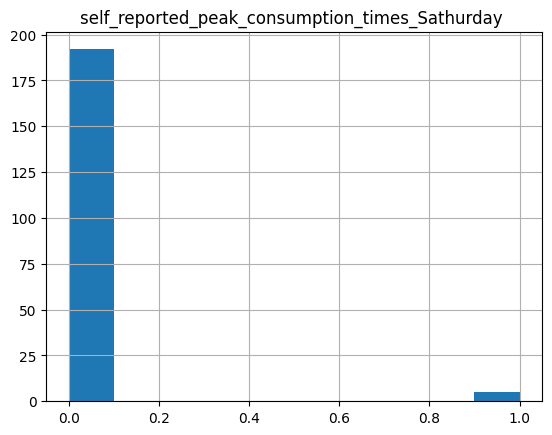

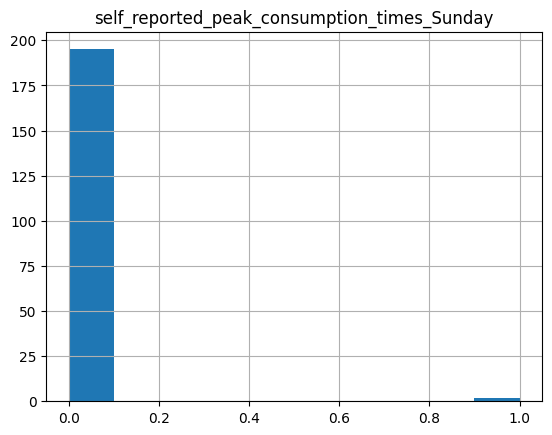

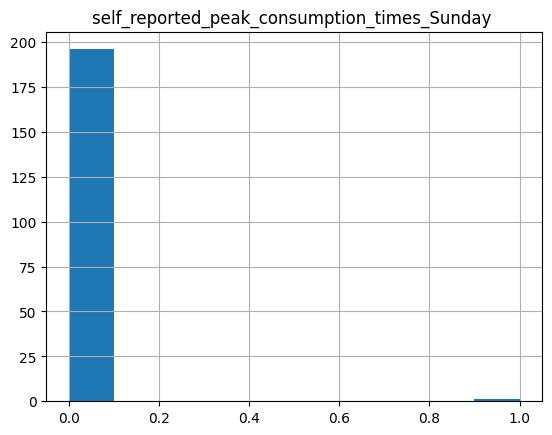

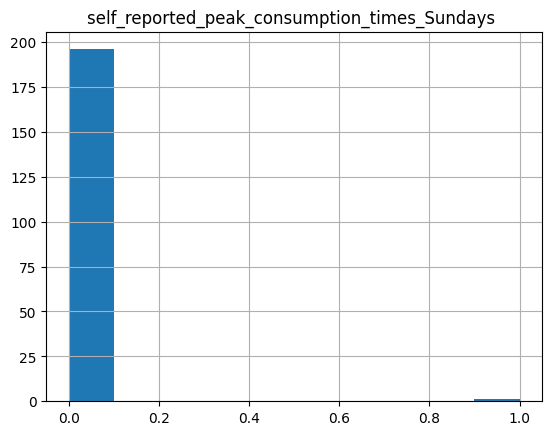

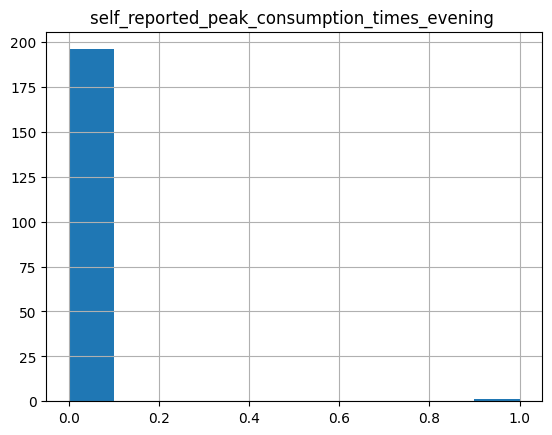

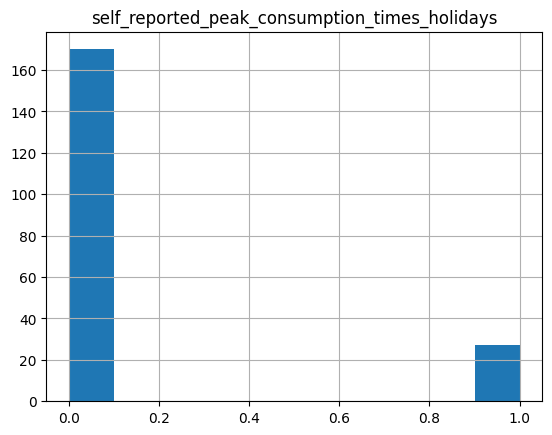

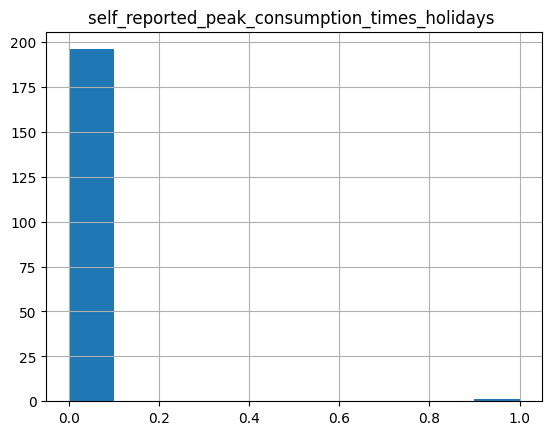

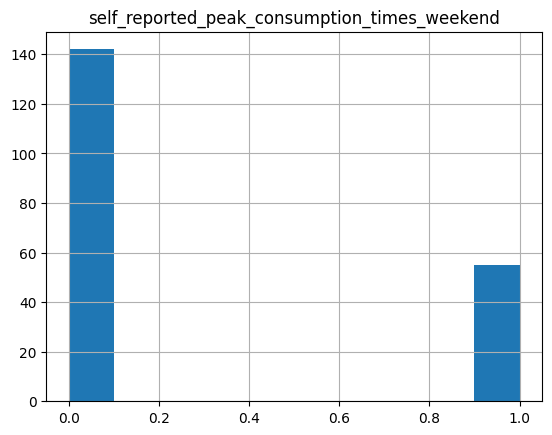

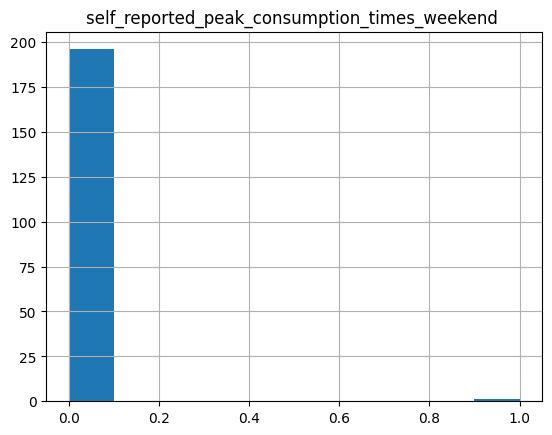

In [164]:
import matplotlib.pyplot as plt

# Loop through all columns in the dataframe
for column in encoded_df.columns:
    plt.figure()
    encoded_df[column].hist(bins=10)
    plt.title(column)

**Box plots** identify outliers in the data

C:\Users\I346462\AppData\Local\Temp\ipykernel_21340\2848991171.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


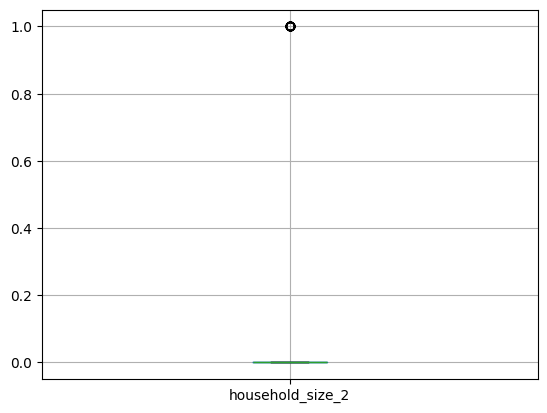

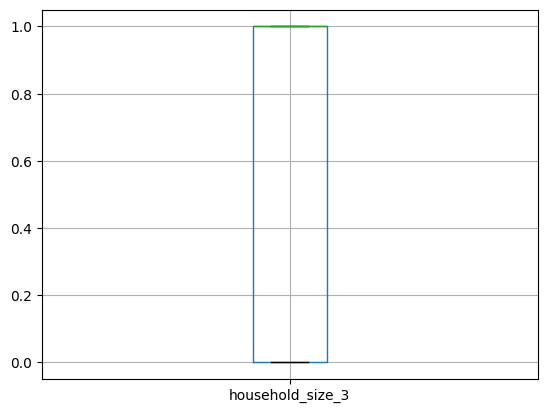

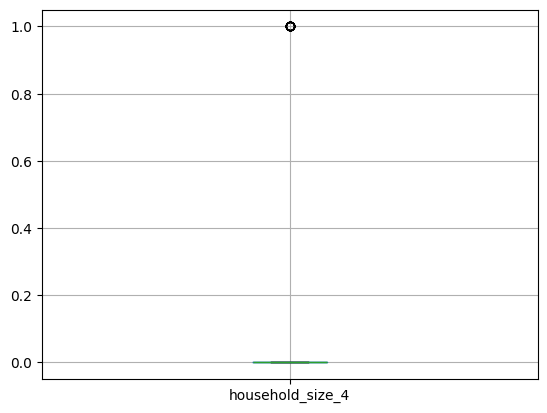

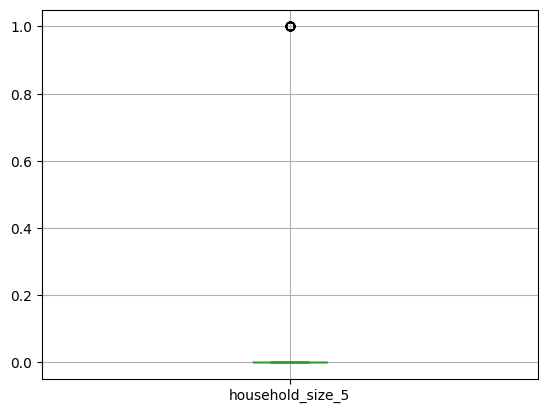

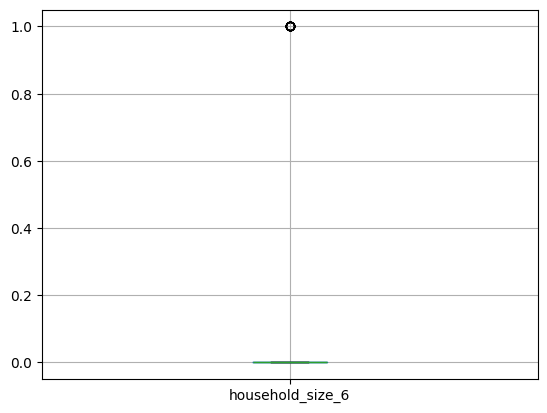

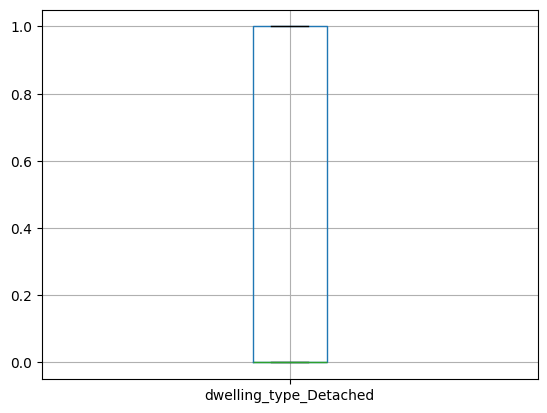

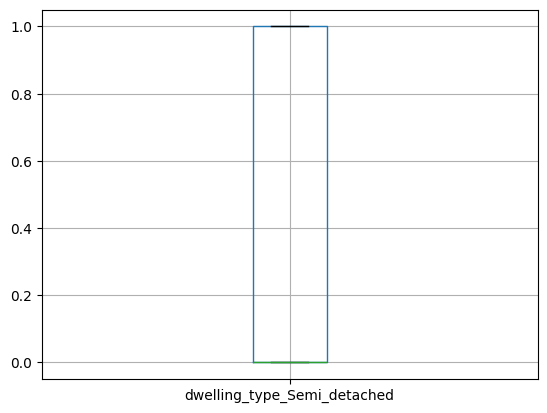

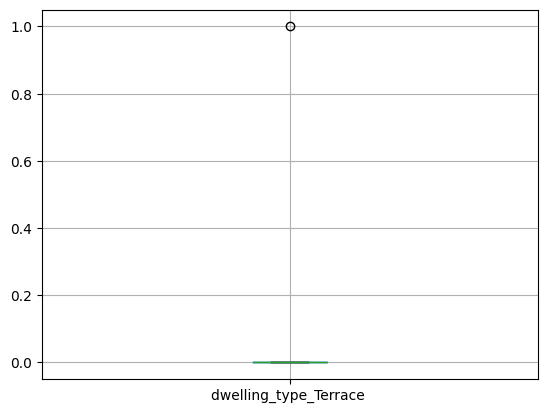

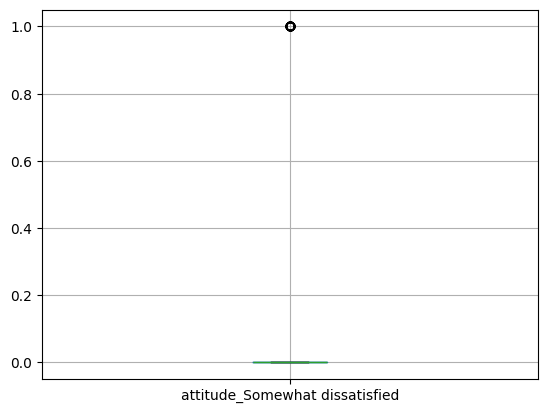

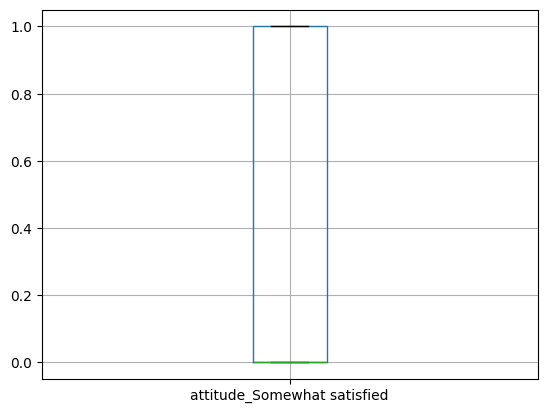

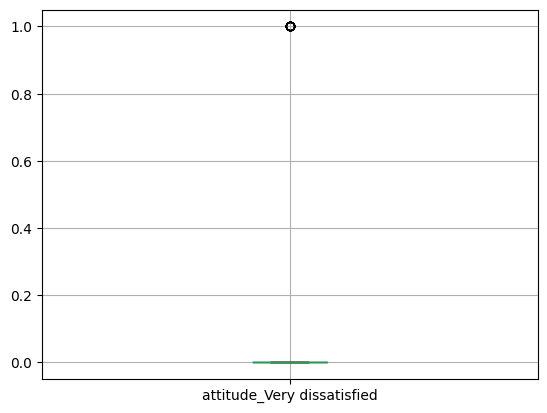

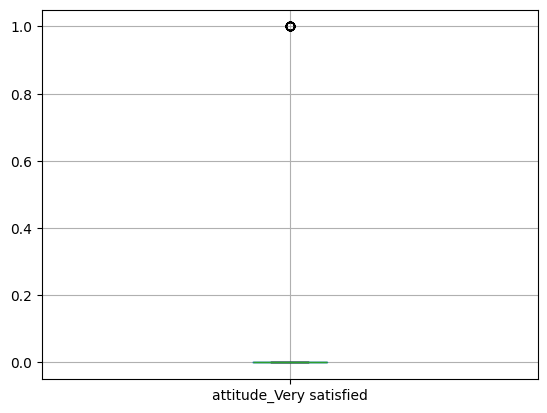

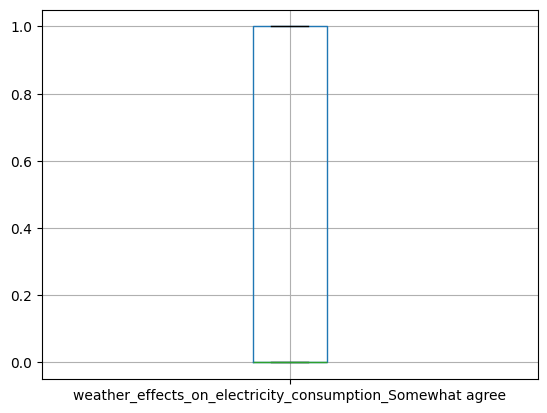

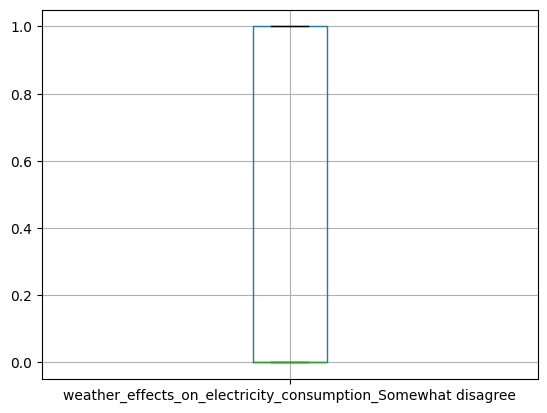

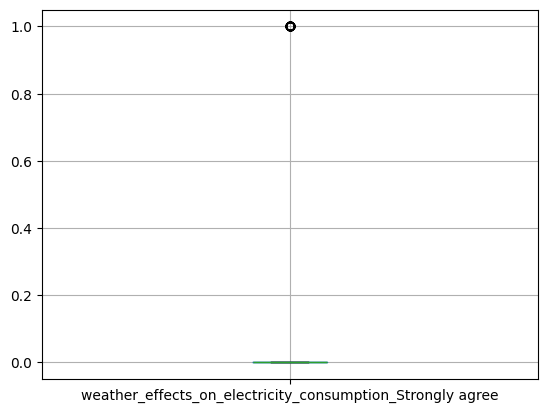

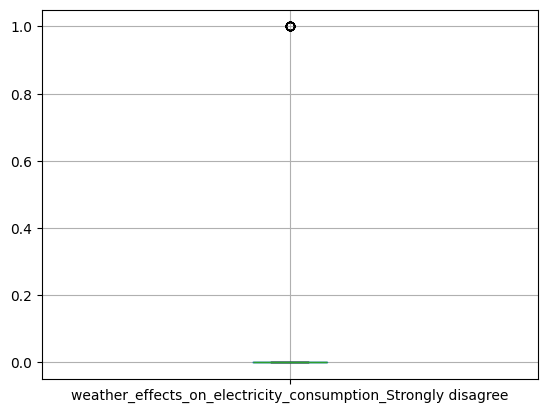

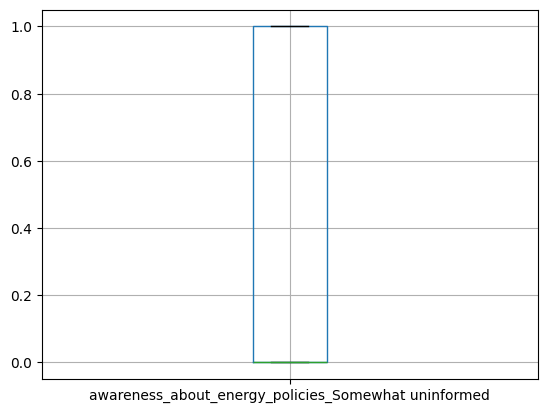

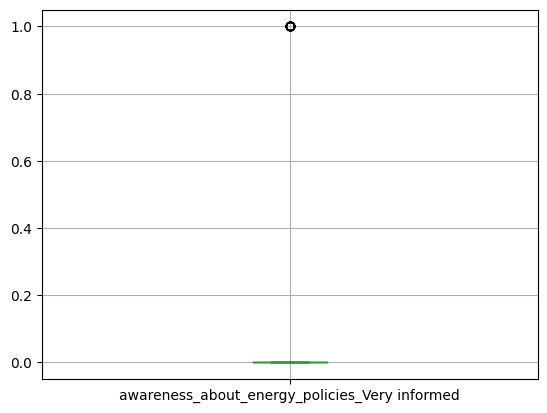

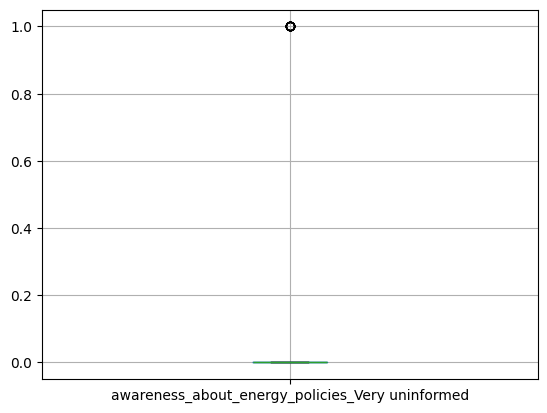

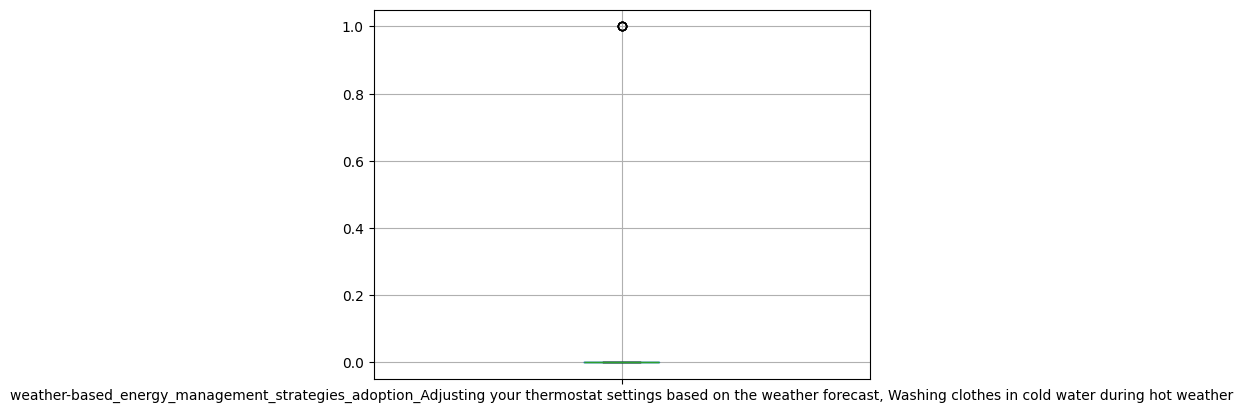

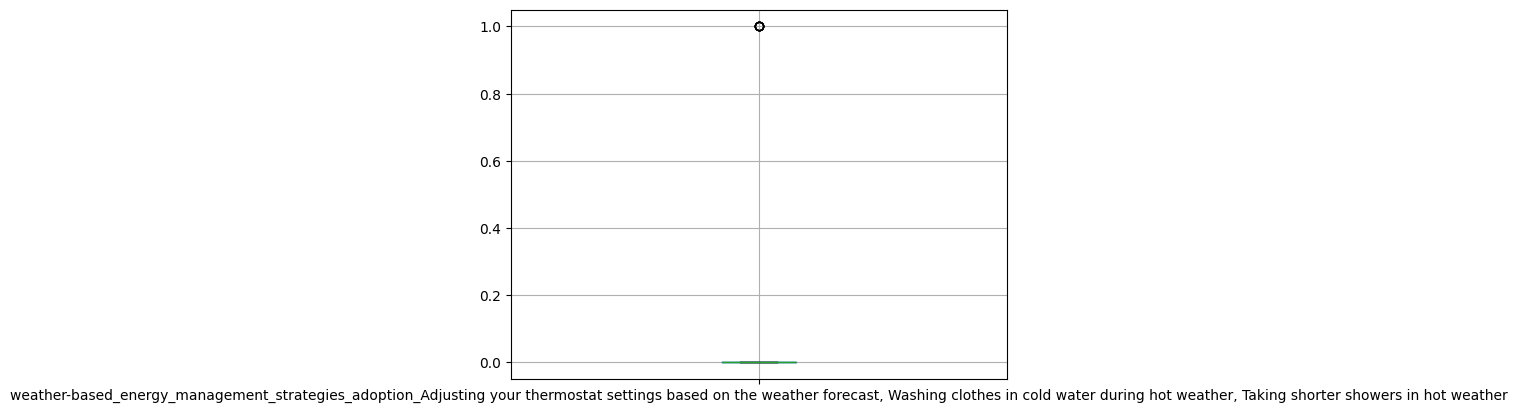

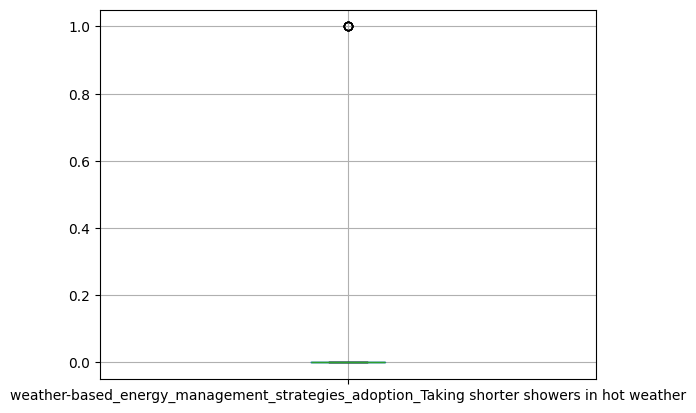

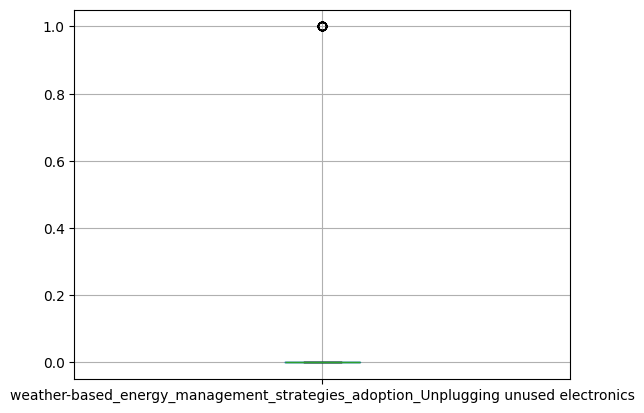

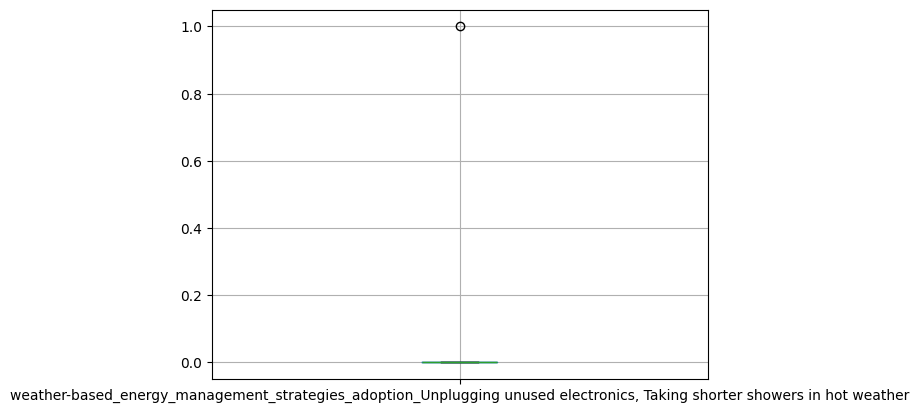

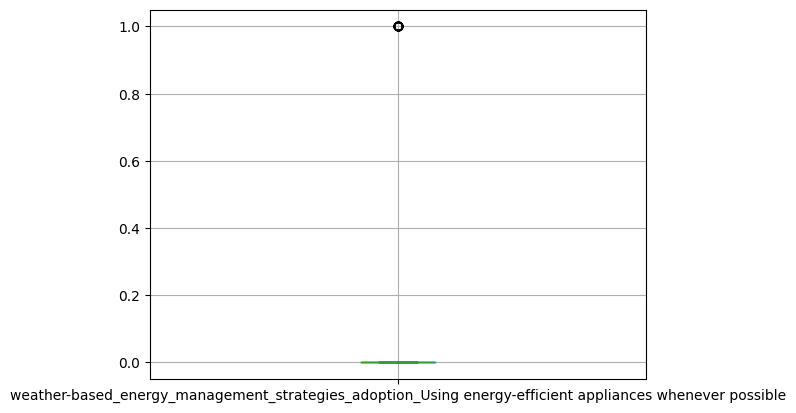

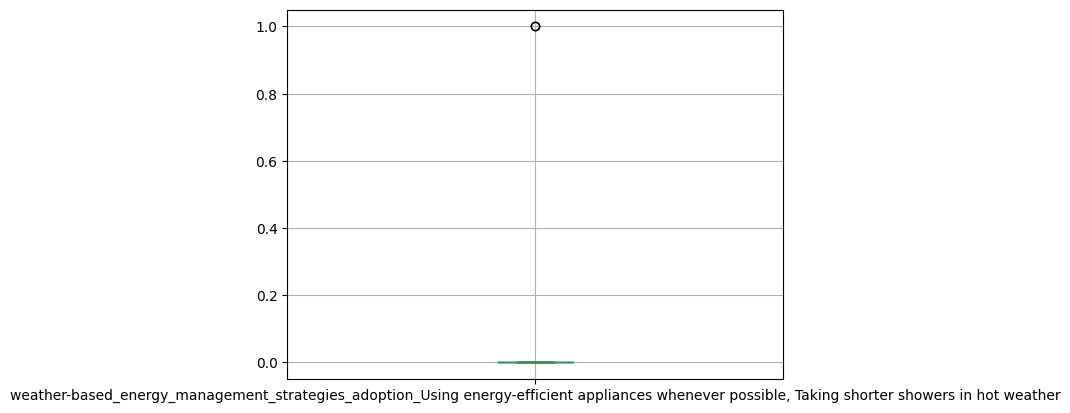

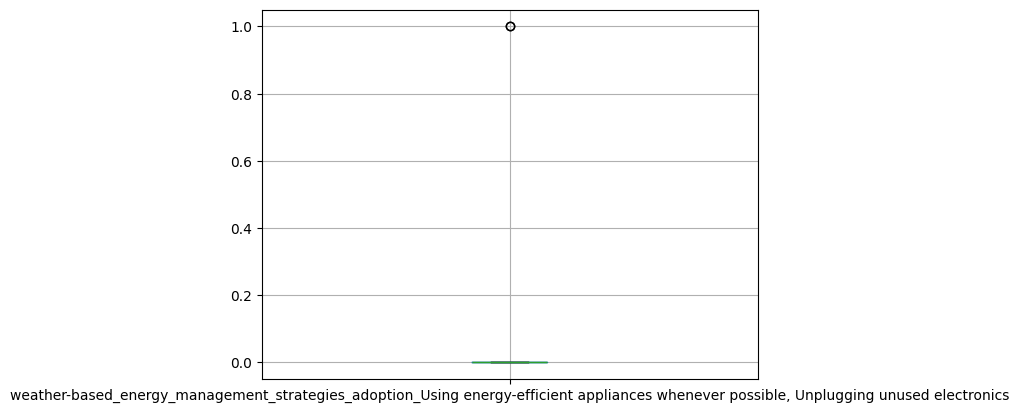

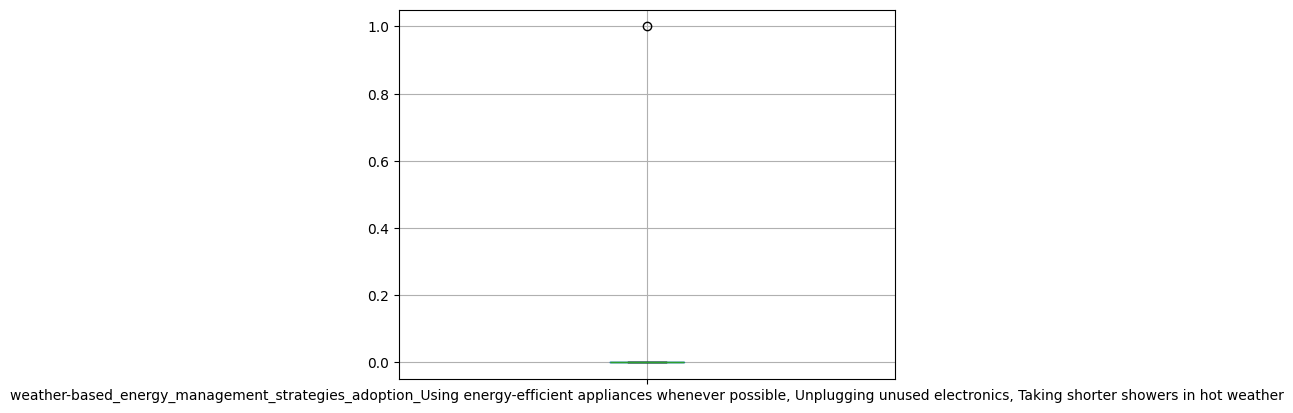

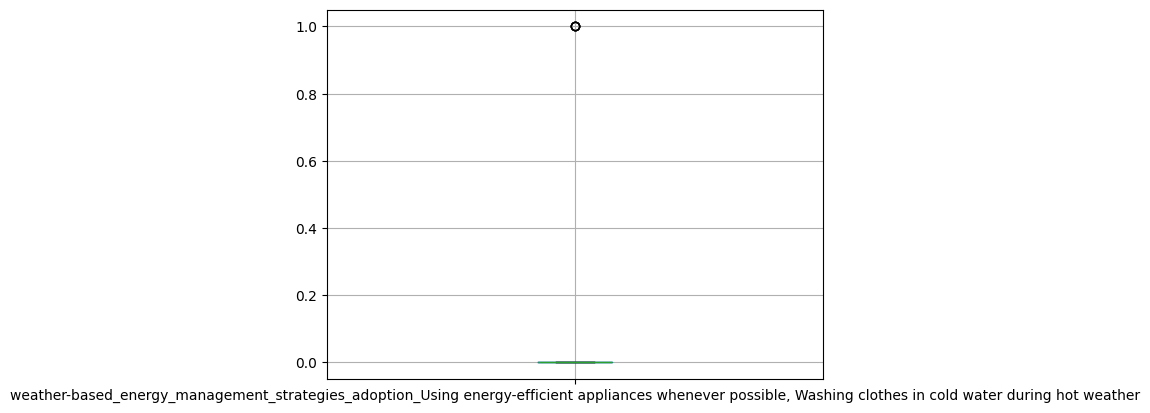

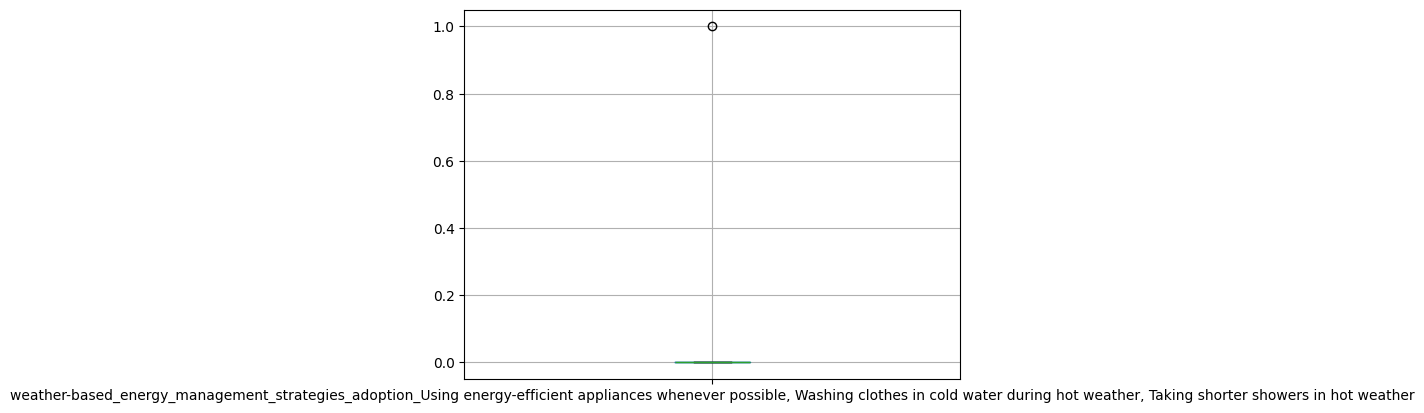

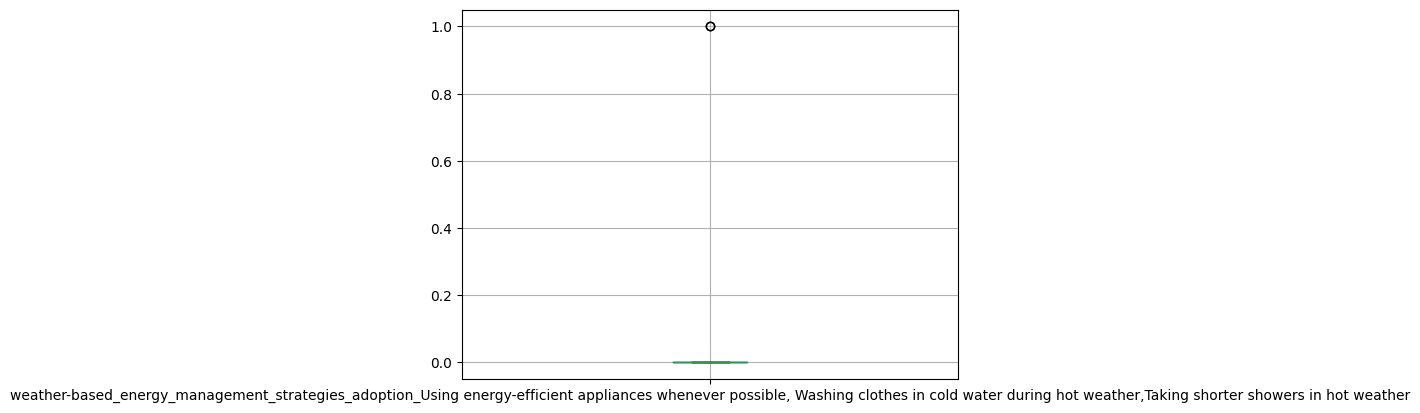

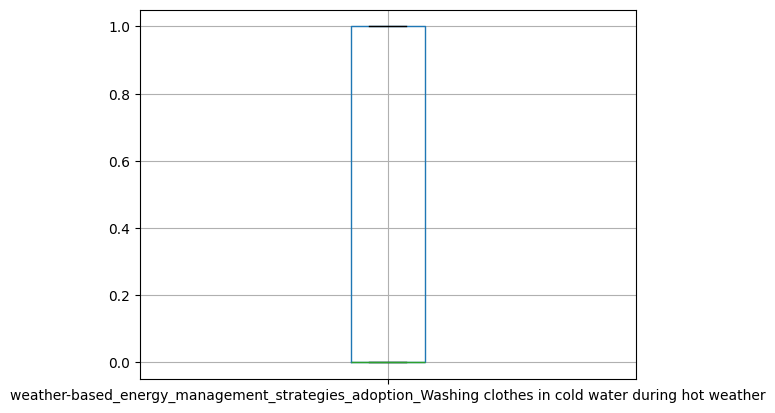

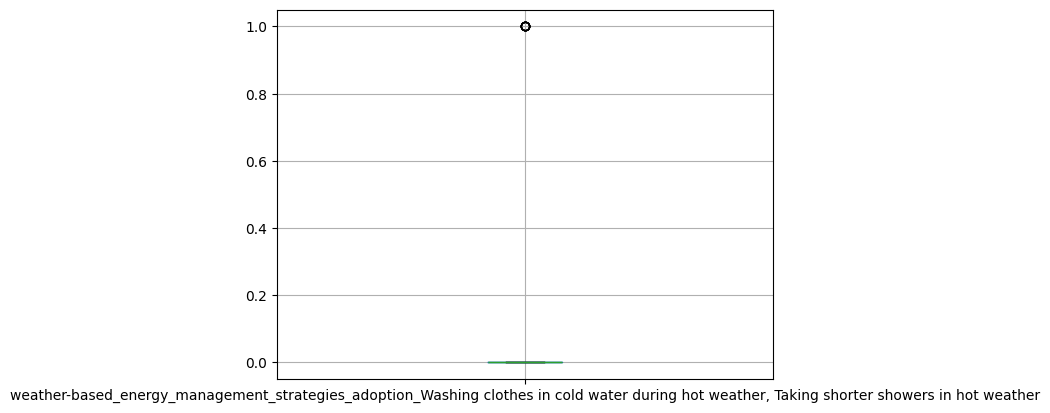

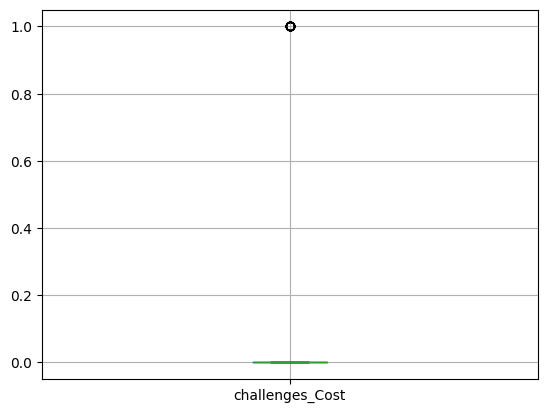

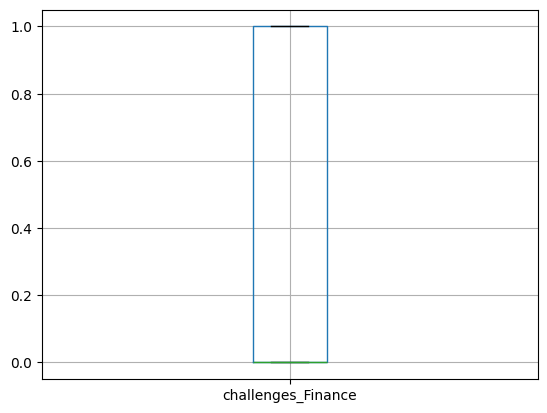

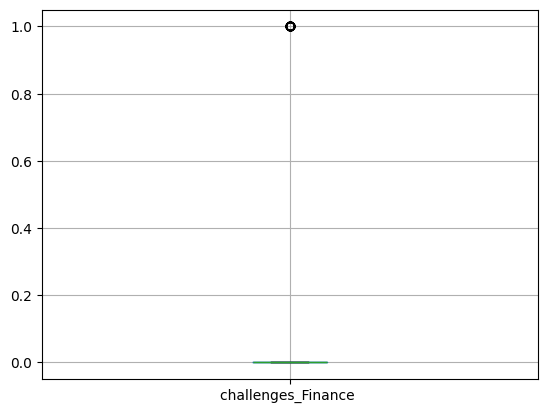

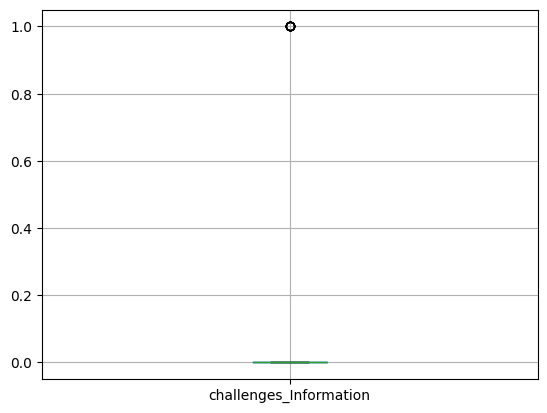

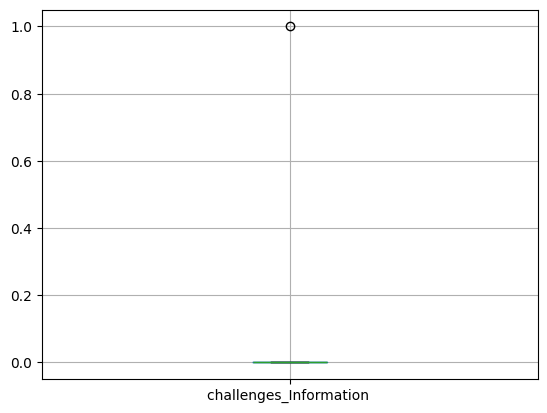

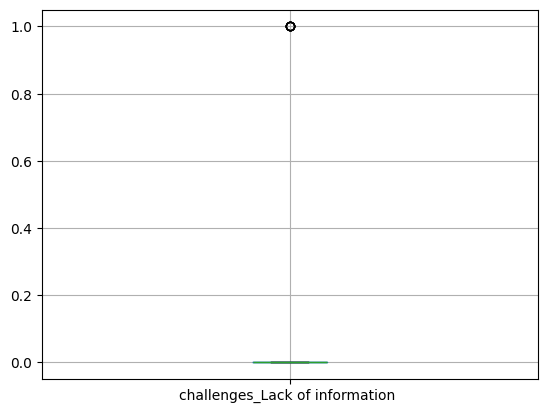

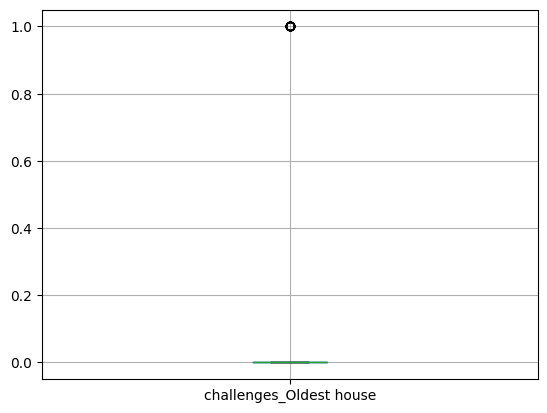

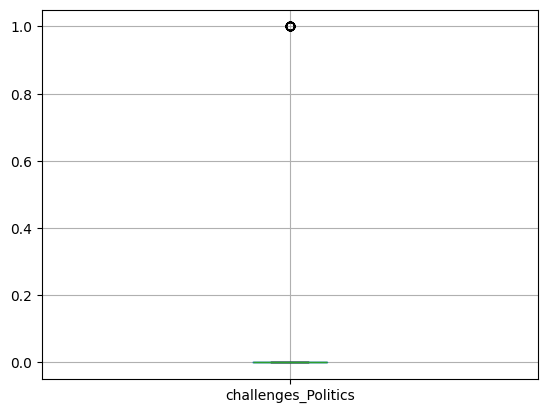

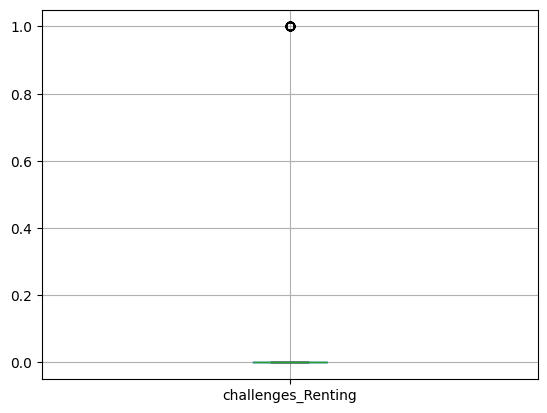

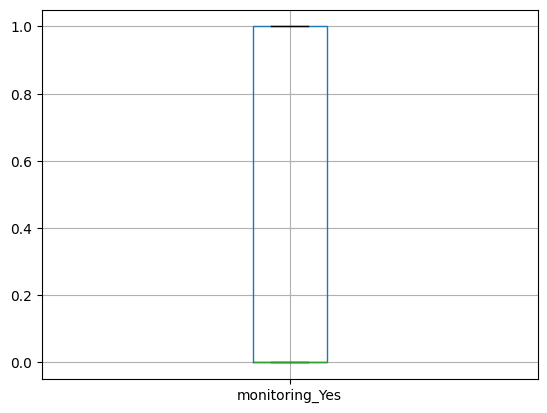

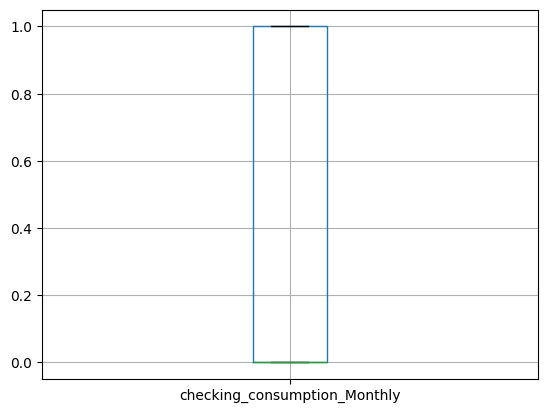

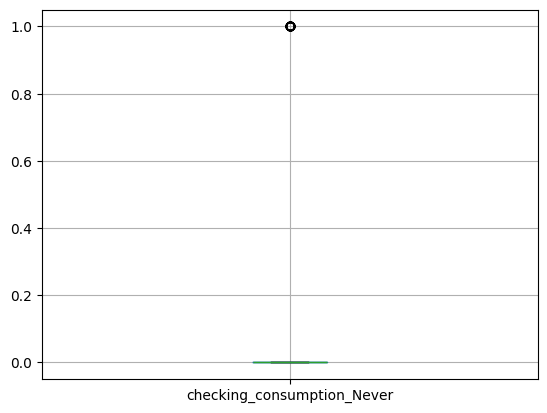

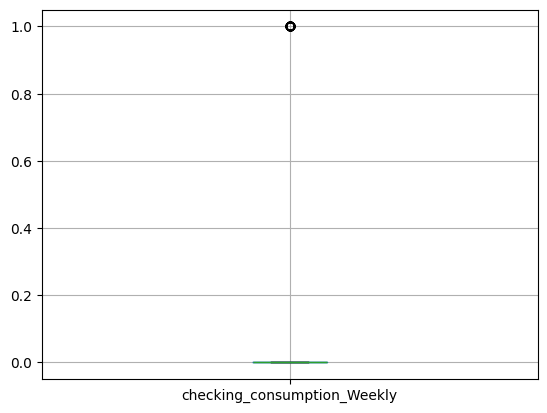

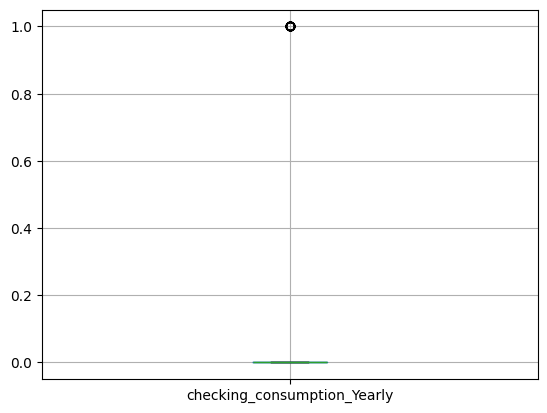

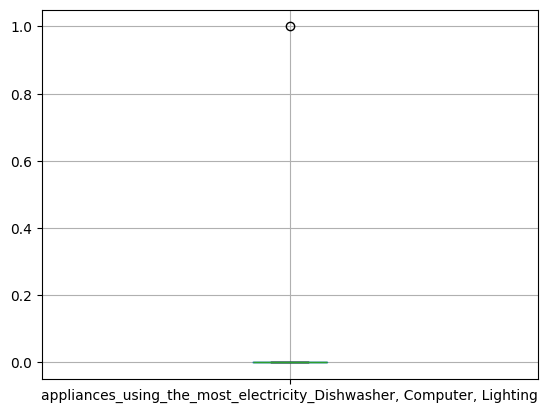

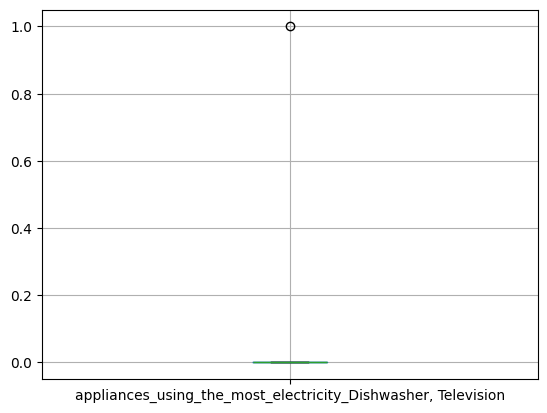

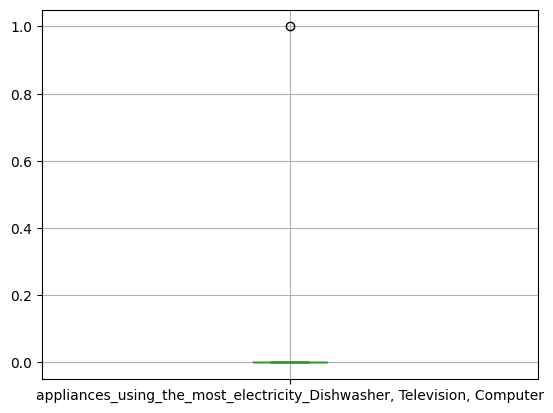

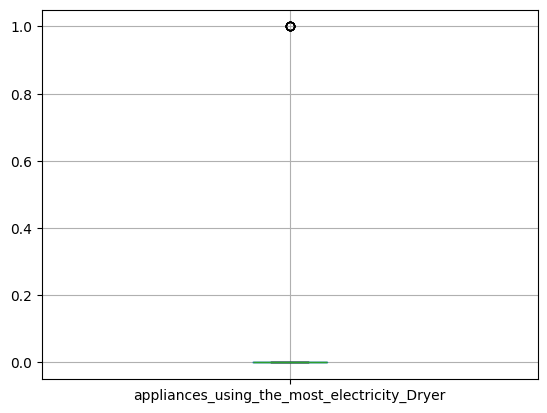

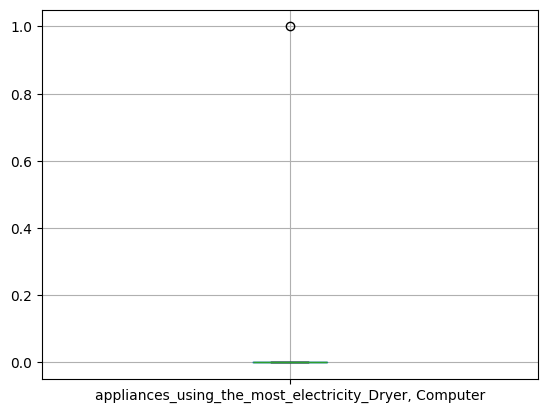

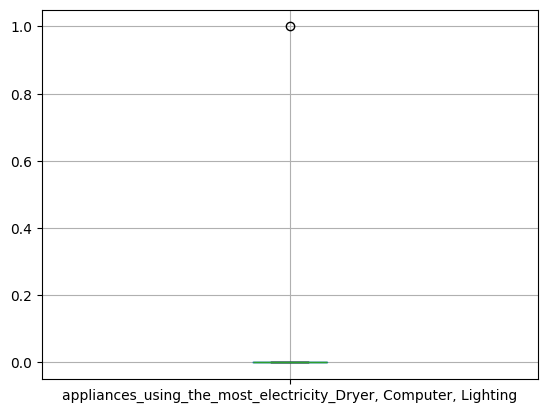

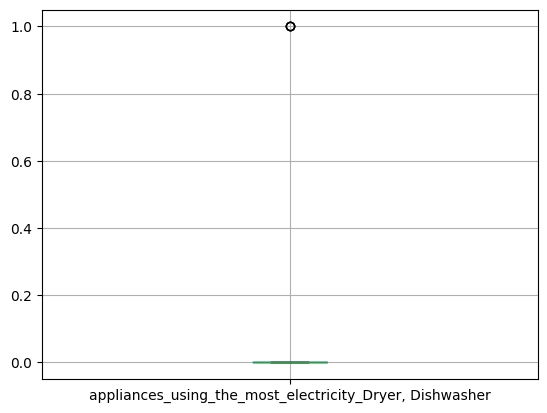

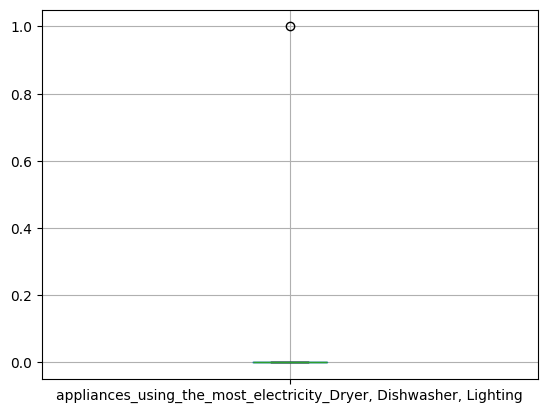

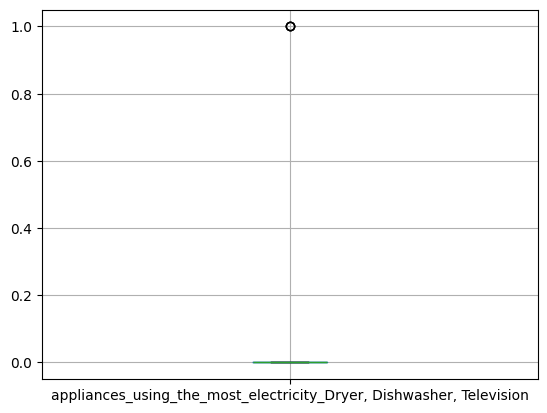

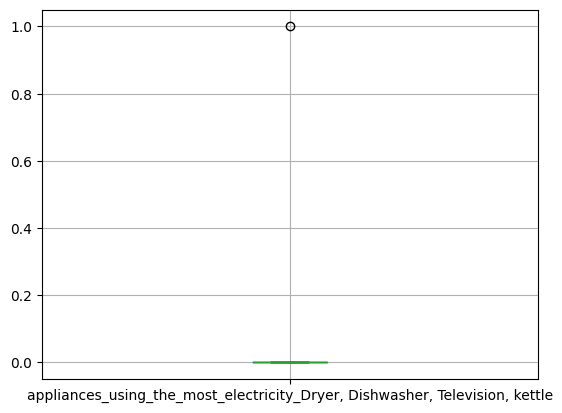

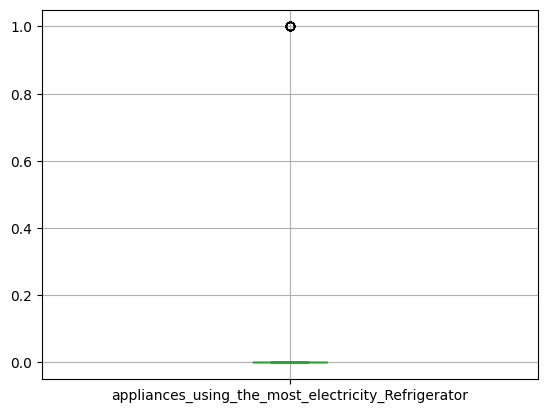

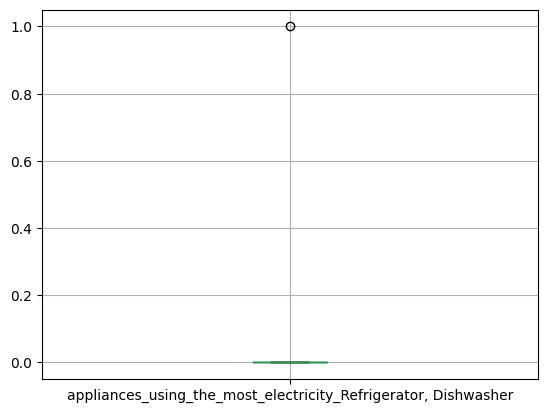

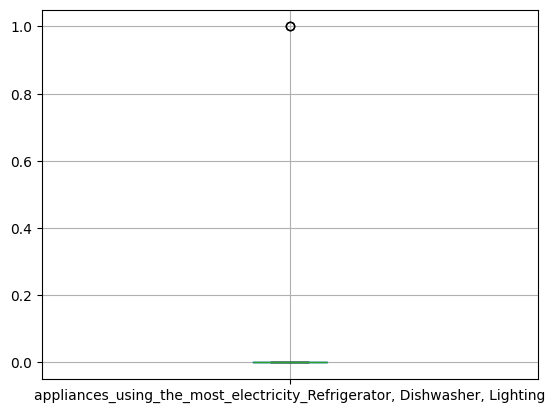

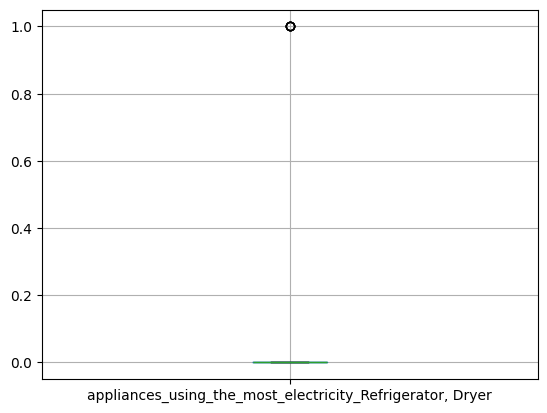

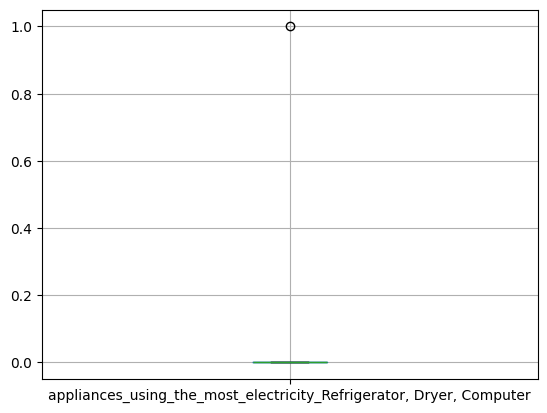

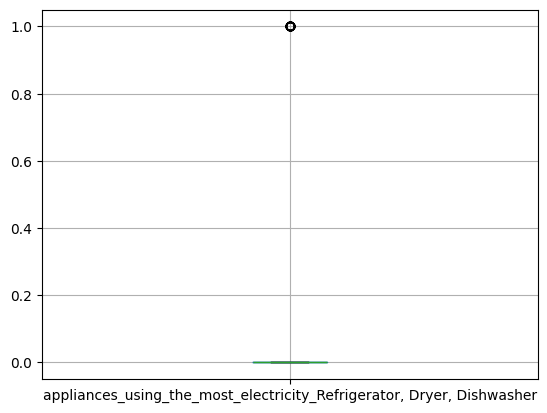

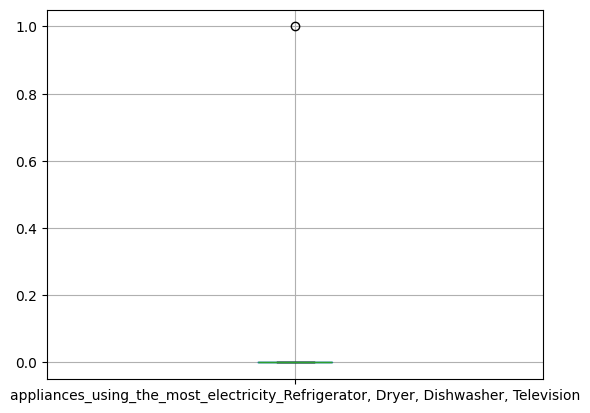

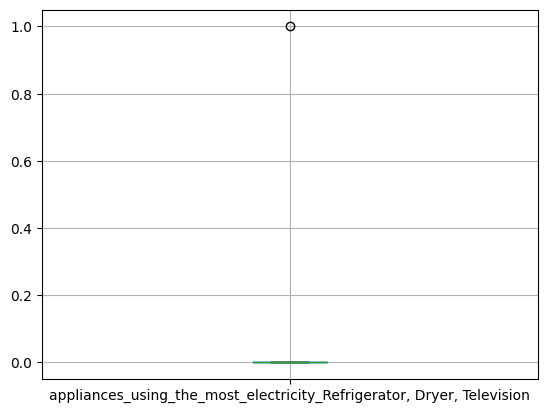

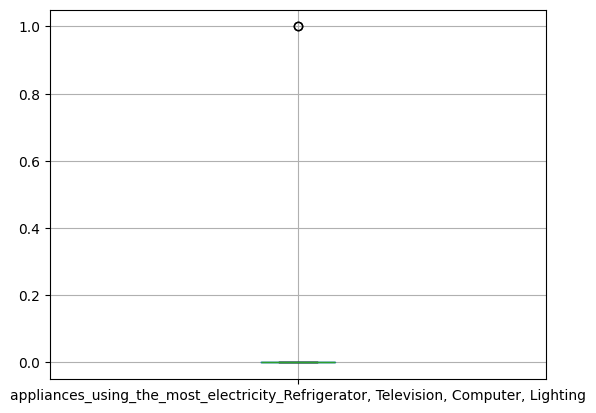

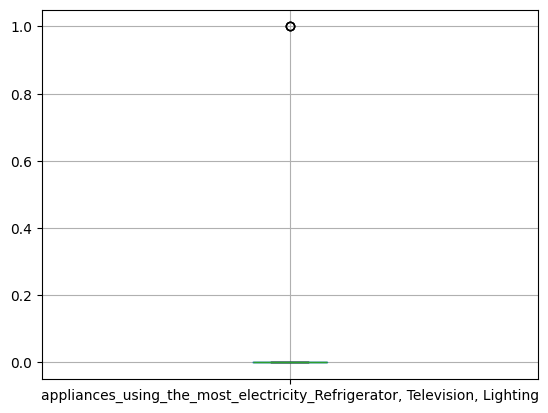

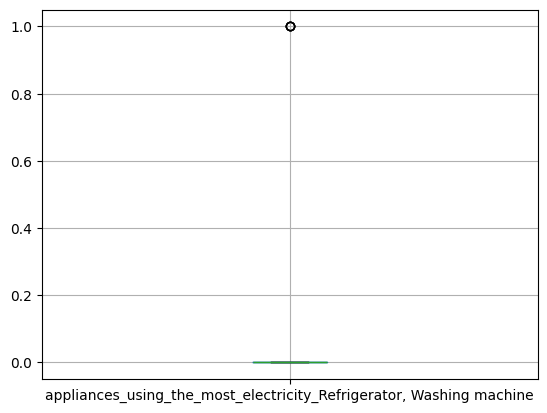

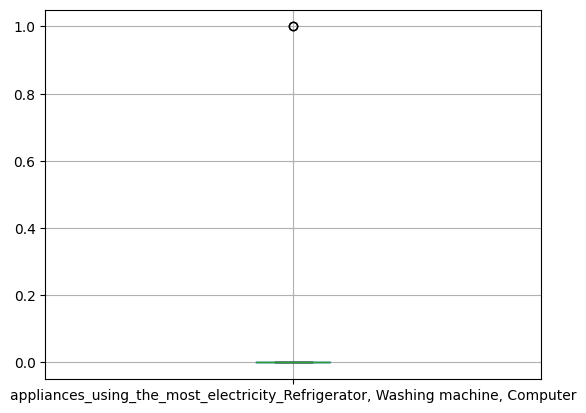

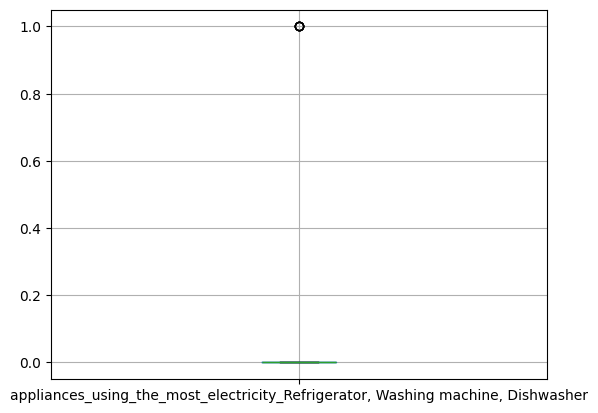

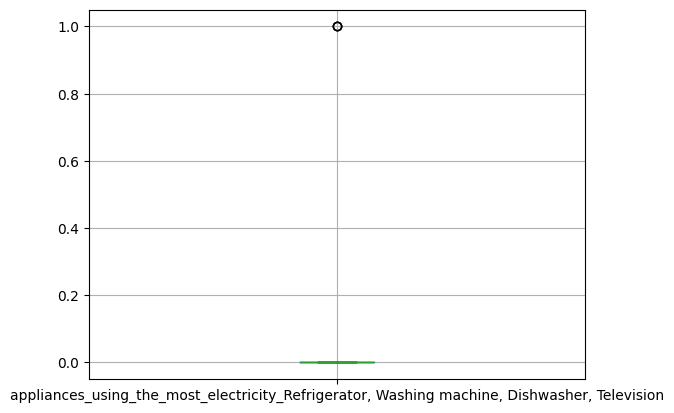

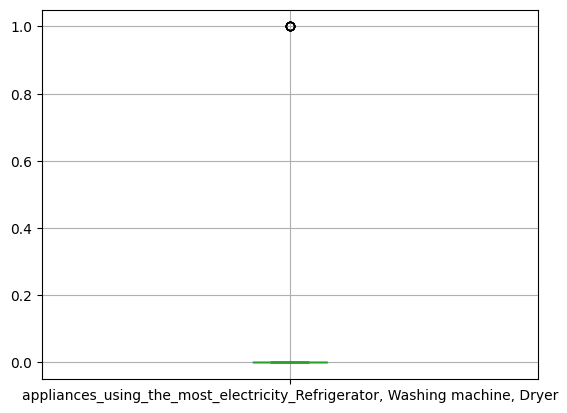

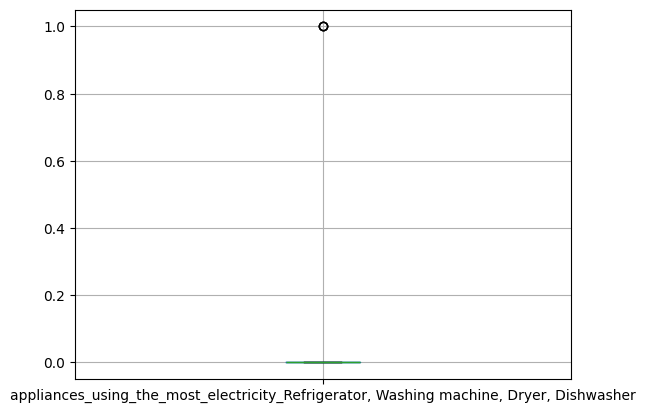

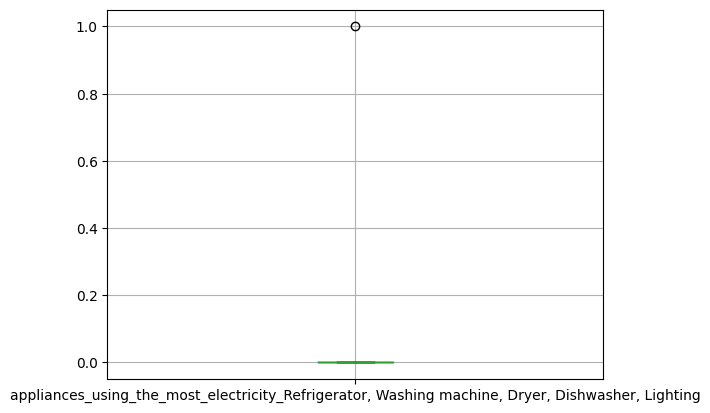

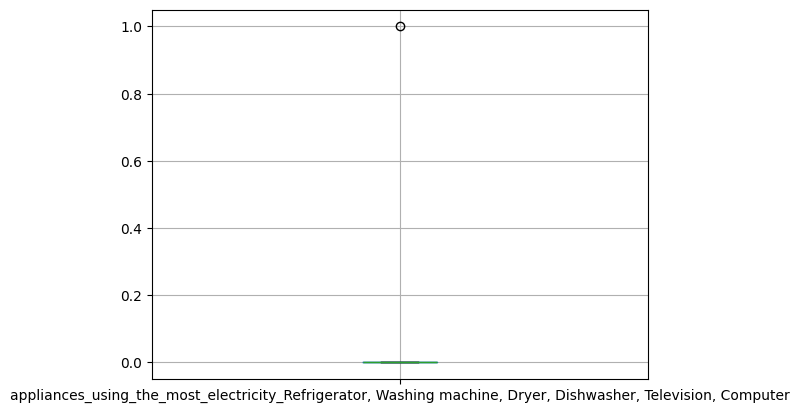

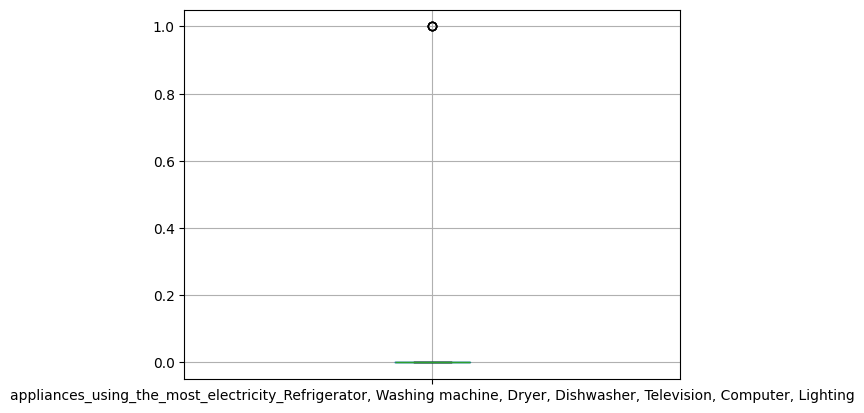

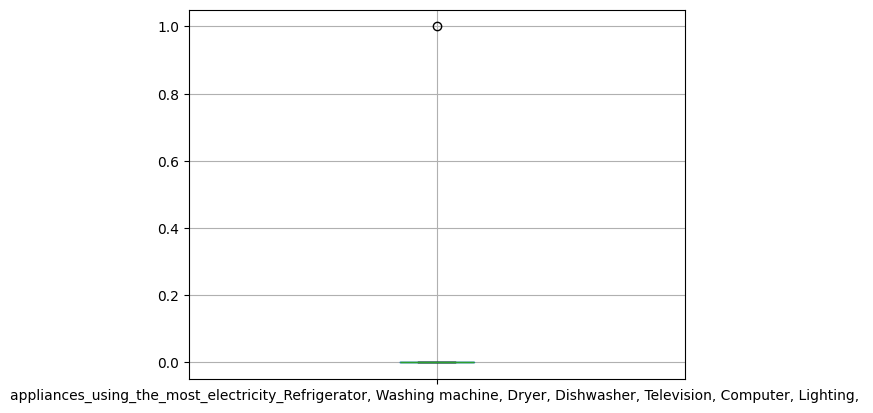

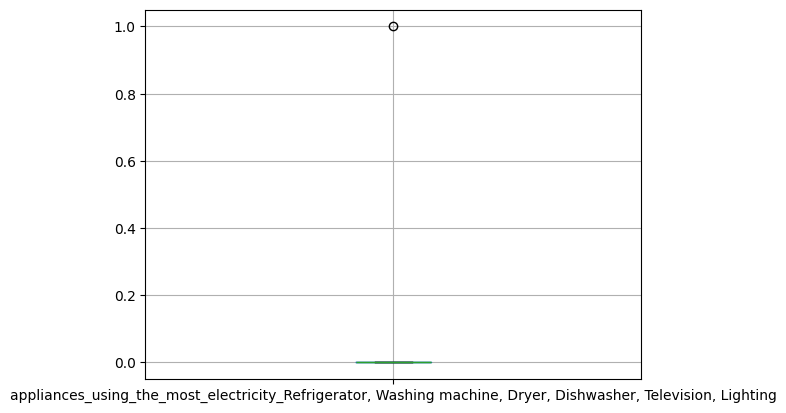

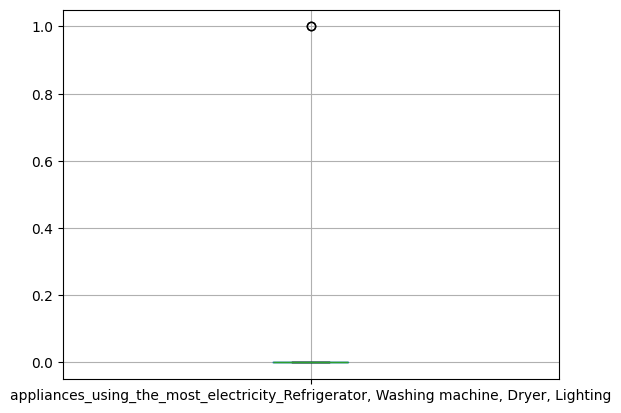

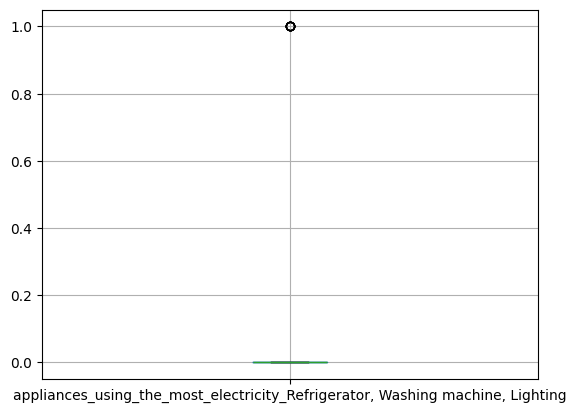

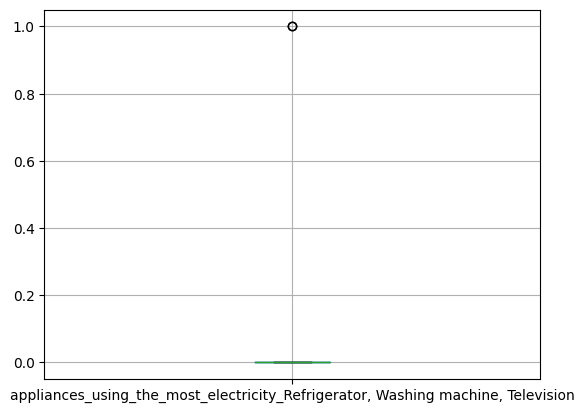

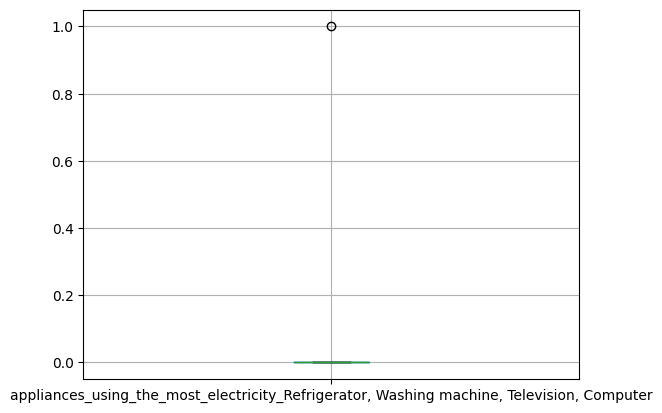

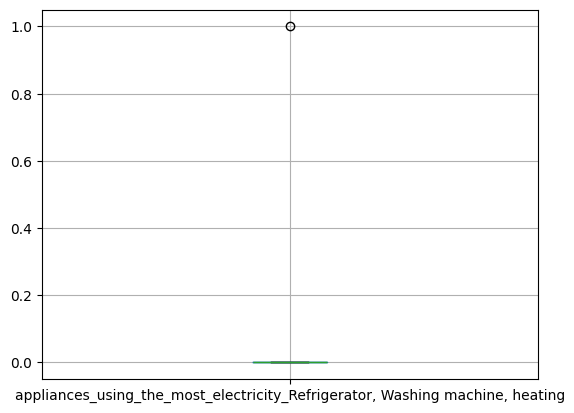

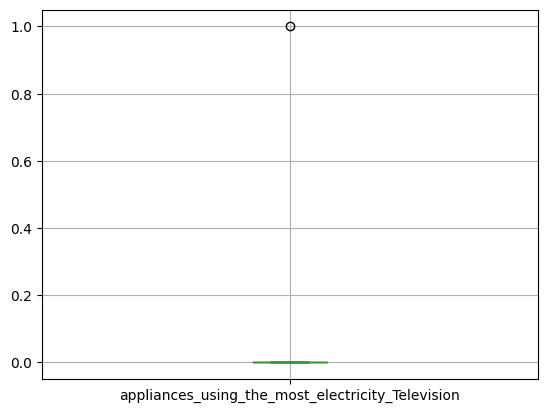

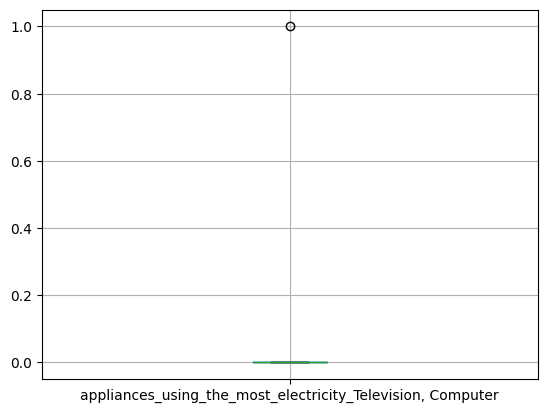

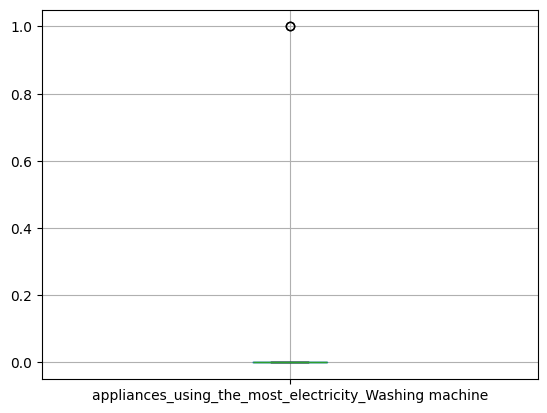

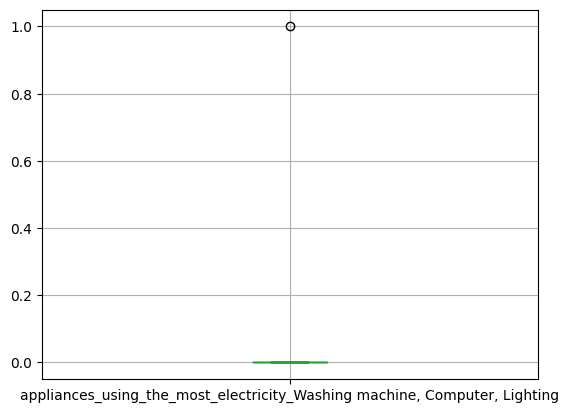

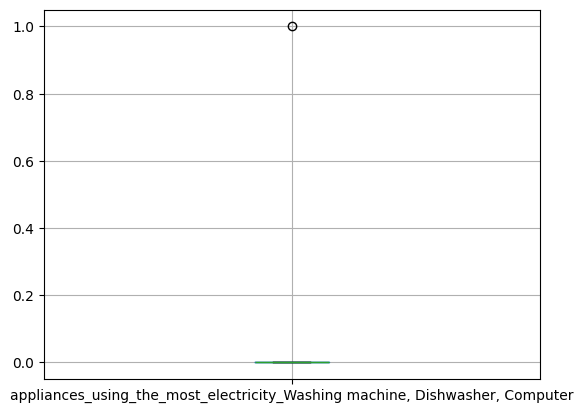

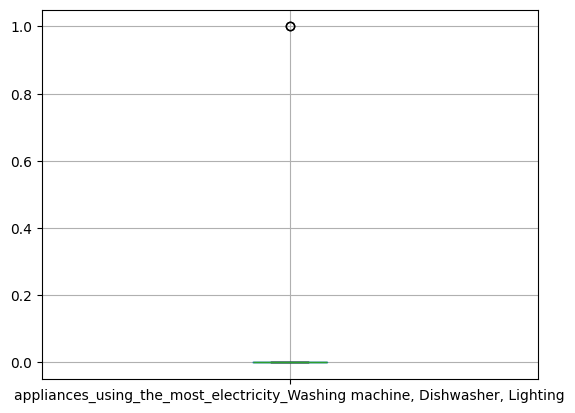

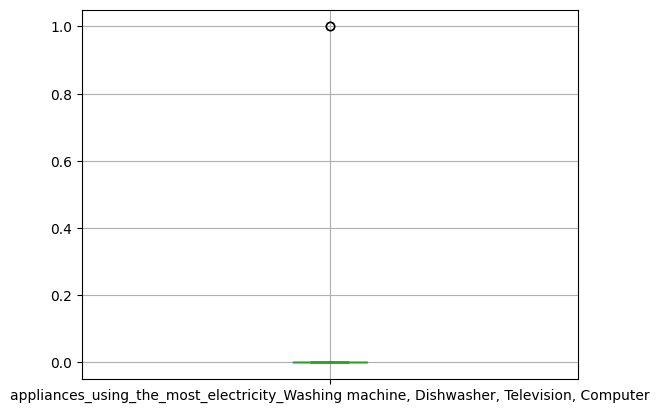

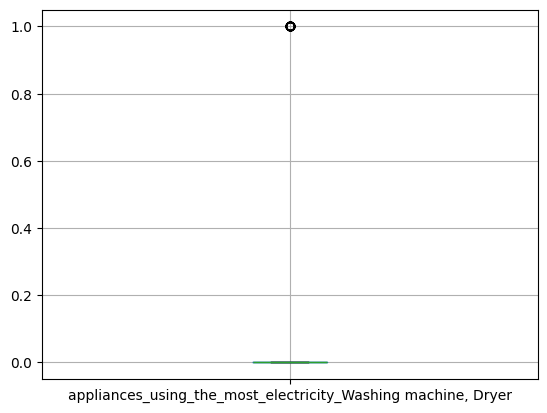

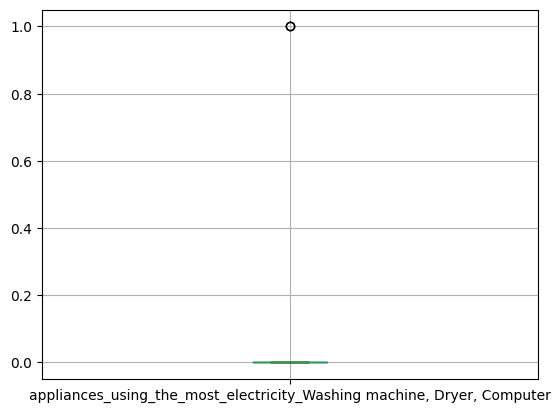

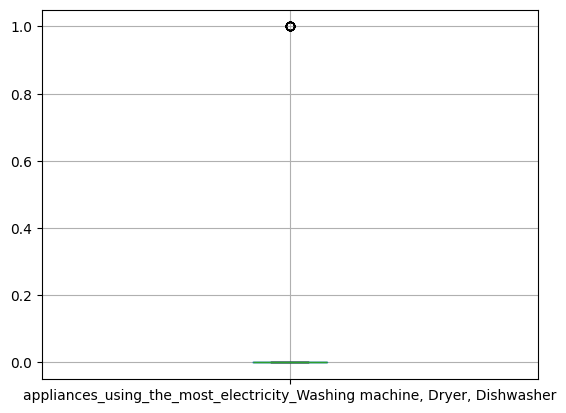

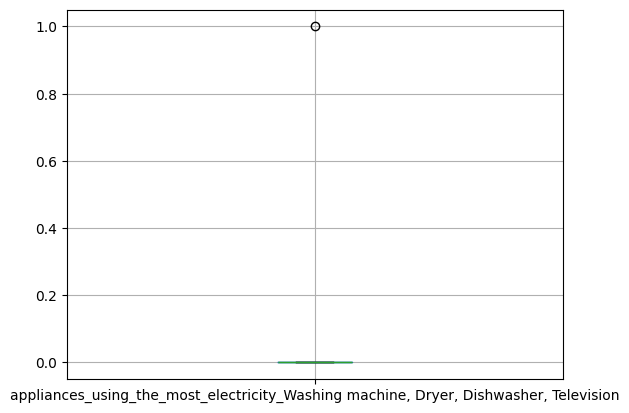

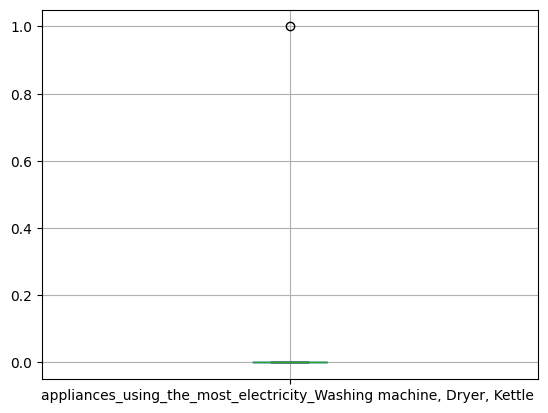

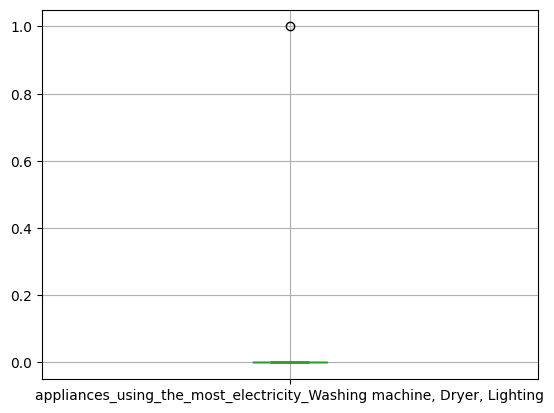

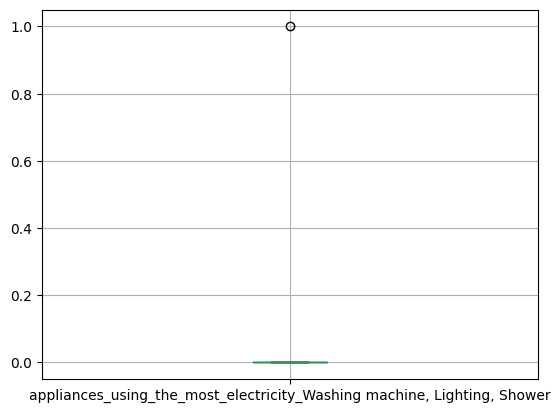

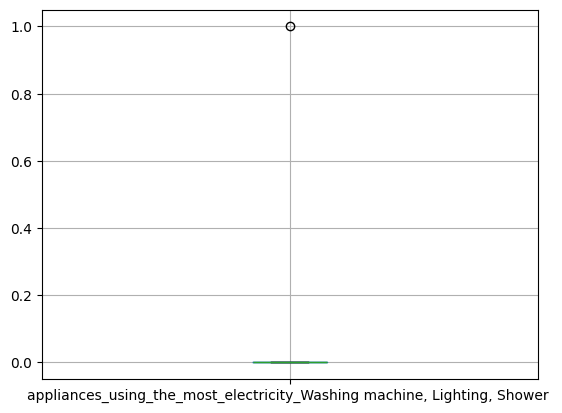

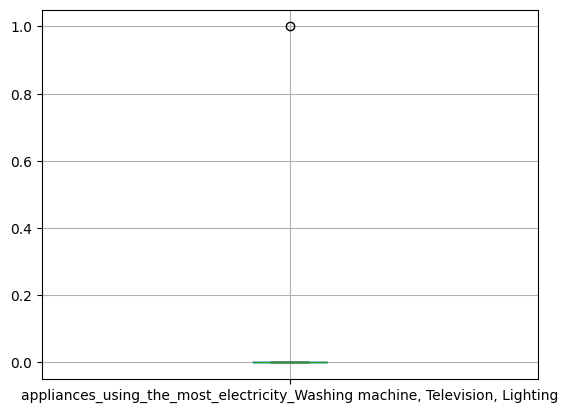

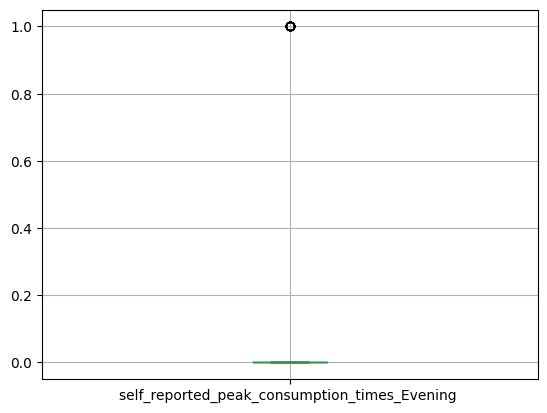

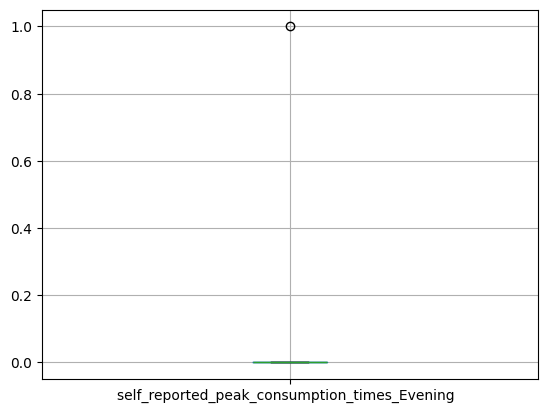

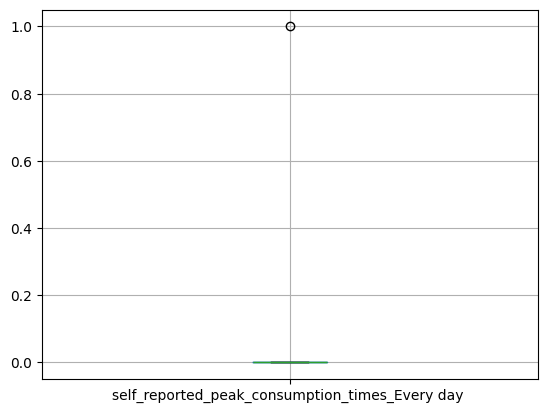

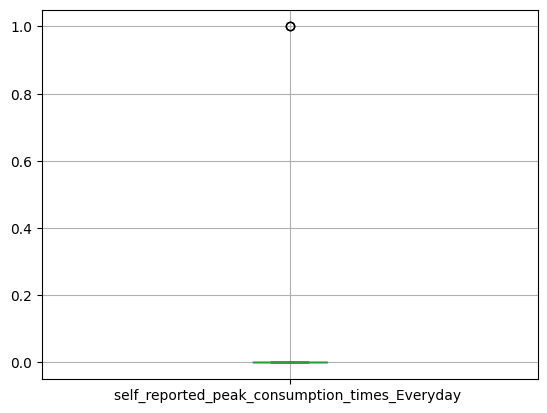

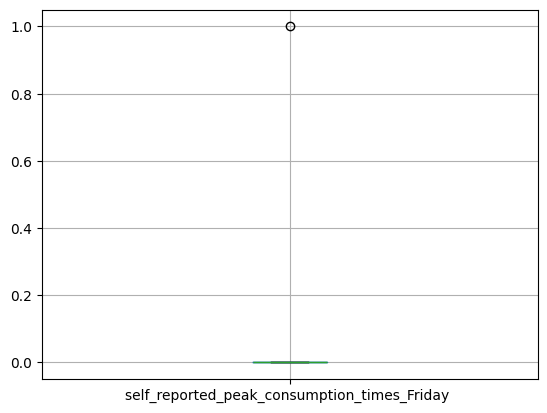

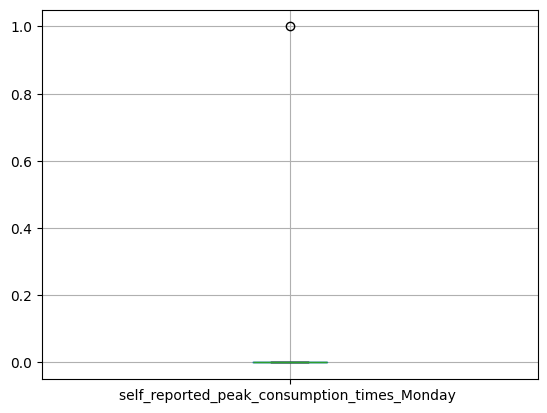

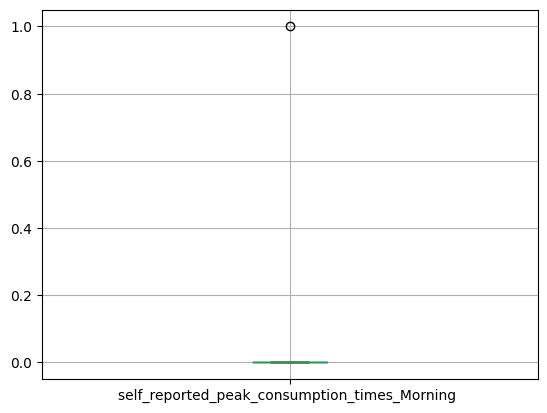

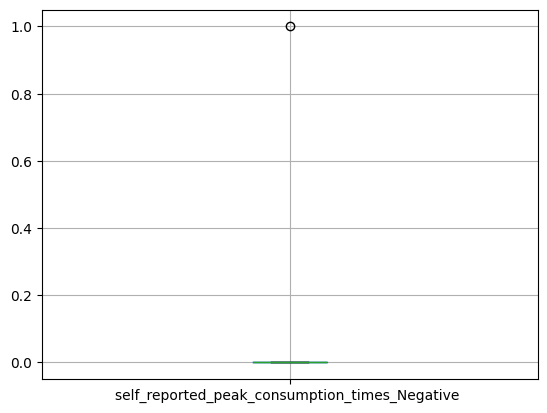

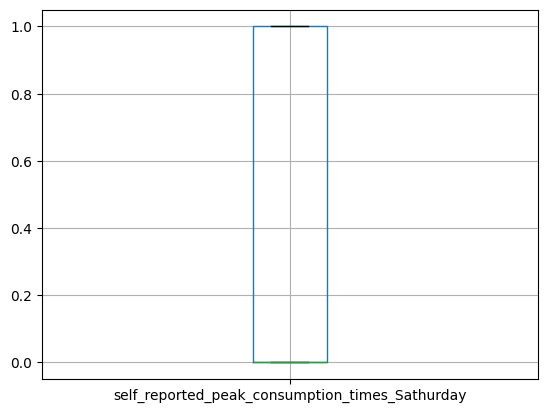

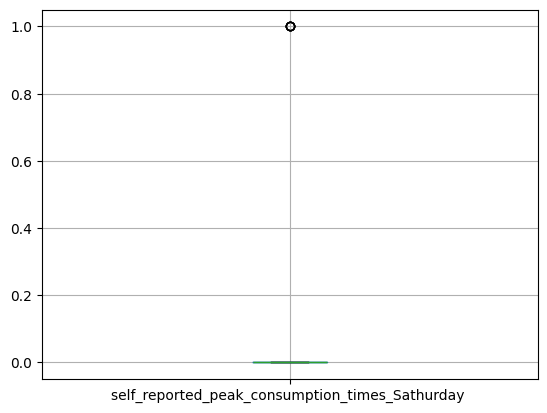

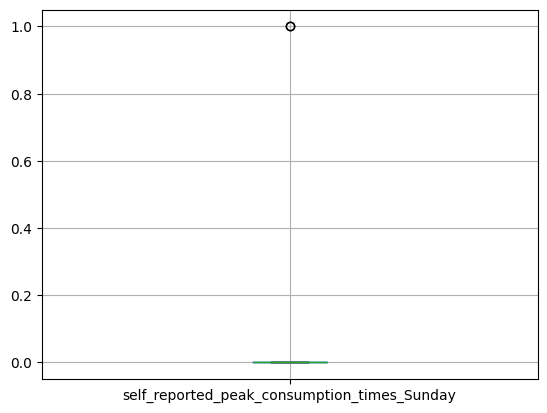

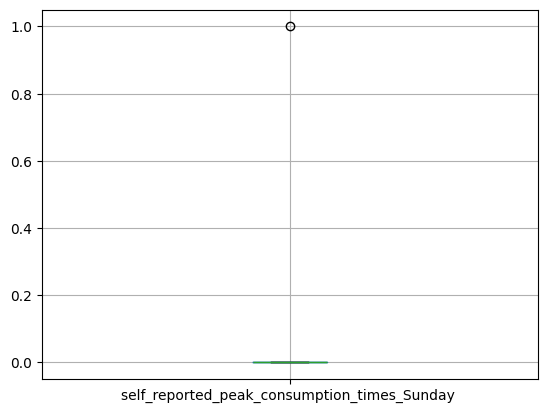

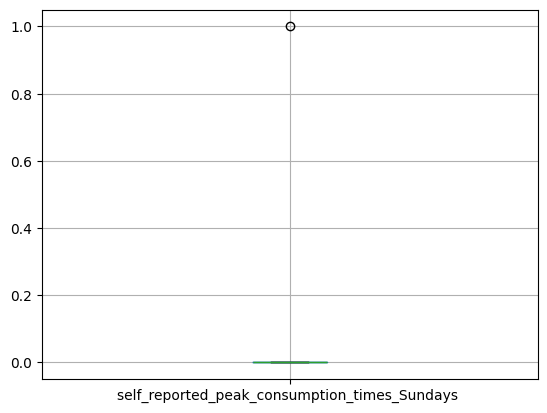

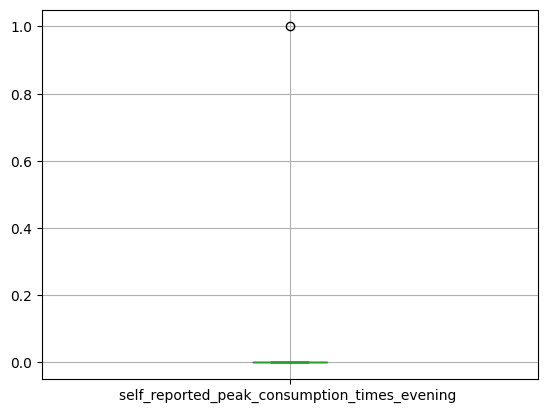

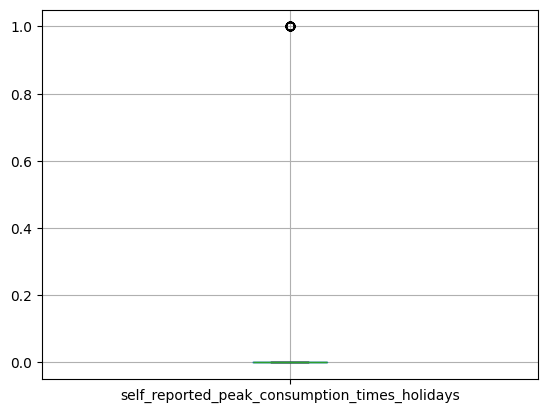

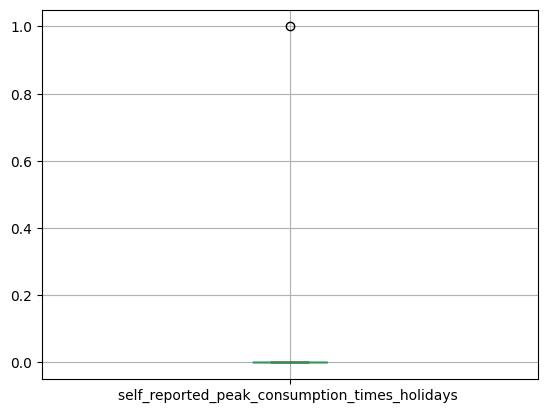

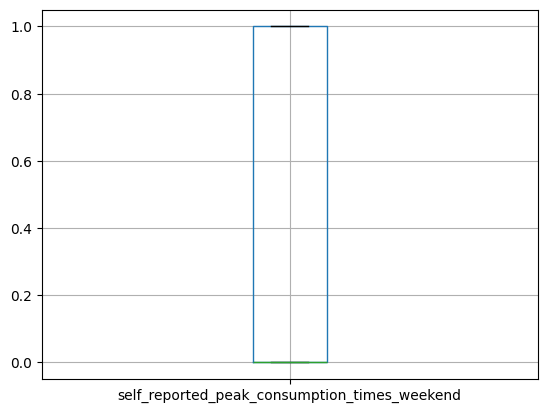

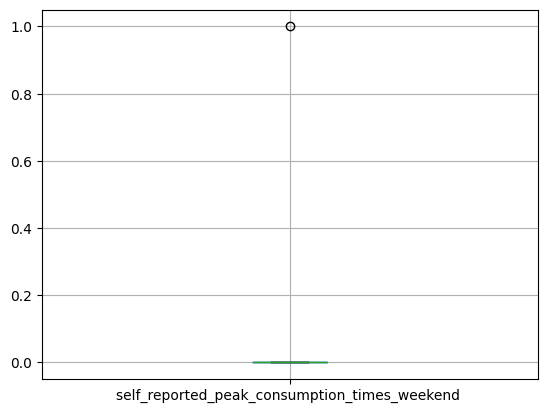

In [165]:
# Loop through all columns in the dataframe
for column in encoded_df.columns:
    plt.figure()
    encoded_df.boxplot([column])

**Scatter plots** understand the relationship between two variables

In [166]:
print(encoded_df.columns)

Index(['household_size_2', 'household_size_3', 'household_size_4',
       'household_size_5', 'household_size_6', 'dwelling_type_Detached',
       'dwelling_type_Semi_detached', 'dwelling_type_Terrace ',
       'attitude_Somewhat dissatisfied', 'attitude_Somewhat satisfied',
       ...
       'self_reported_peak_consumption_times_Sathurday',
       'self_reported_peak_consumption_times_Sathurday ',
       'self_reported_peak_consumption_times_Sunday',
       'self_reported_peak_consumption_times_Sunday ',
       'self_reported_peak_consumption_times_Sundays ',
       'self_reported_peak_consumption_times_evening ',
       'self_reported_peak_consumption_times_holidays',
       'self_reported_peak_consumption_times_holidays ',
       'self_reported_peak_consumption_times_weekend',
       'self_reported_peak_consumption_times_weekend '],
      dtype='object', length=117)


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

**matrix of scatter plots** shows the relationship between two of the variables

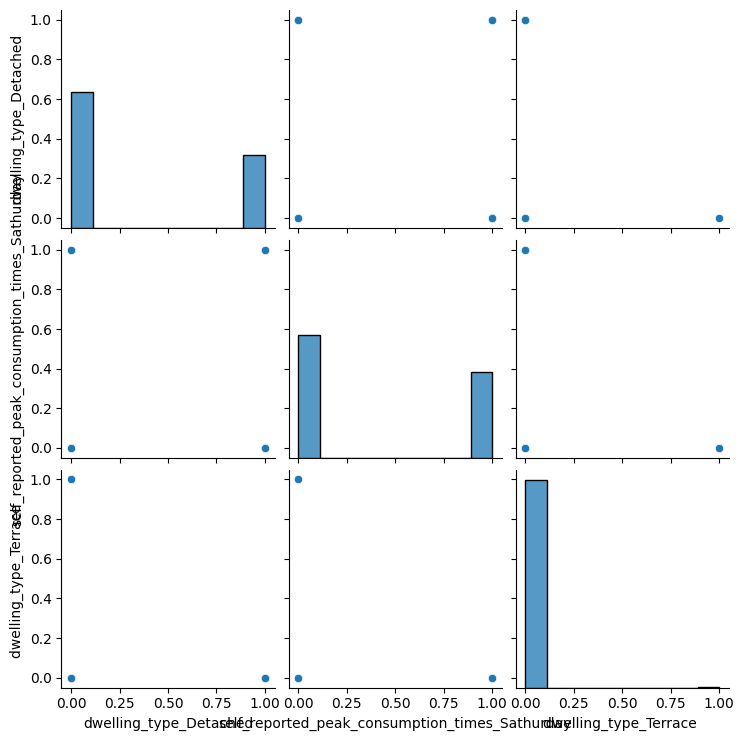

In [168]:
# Create a pairplot to visualize the relationships between variables
sns.pairplot(encoded_df[columns])
plt.show()

**Correlation matrix** understand the linear relationship between different variables

<Axes: >

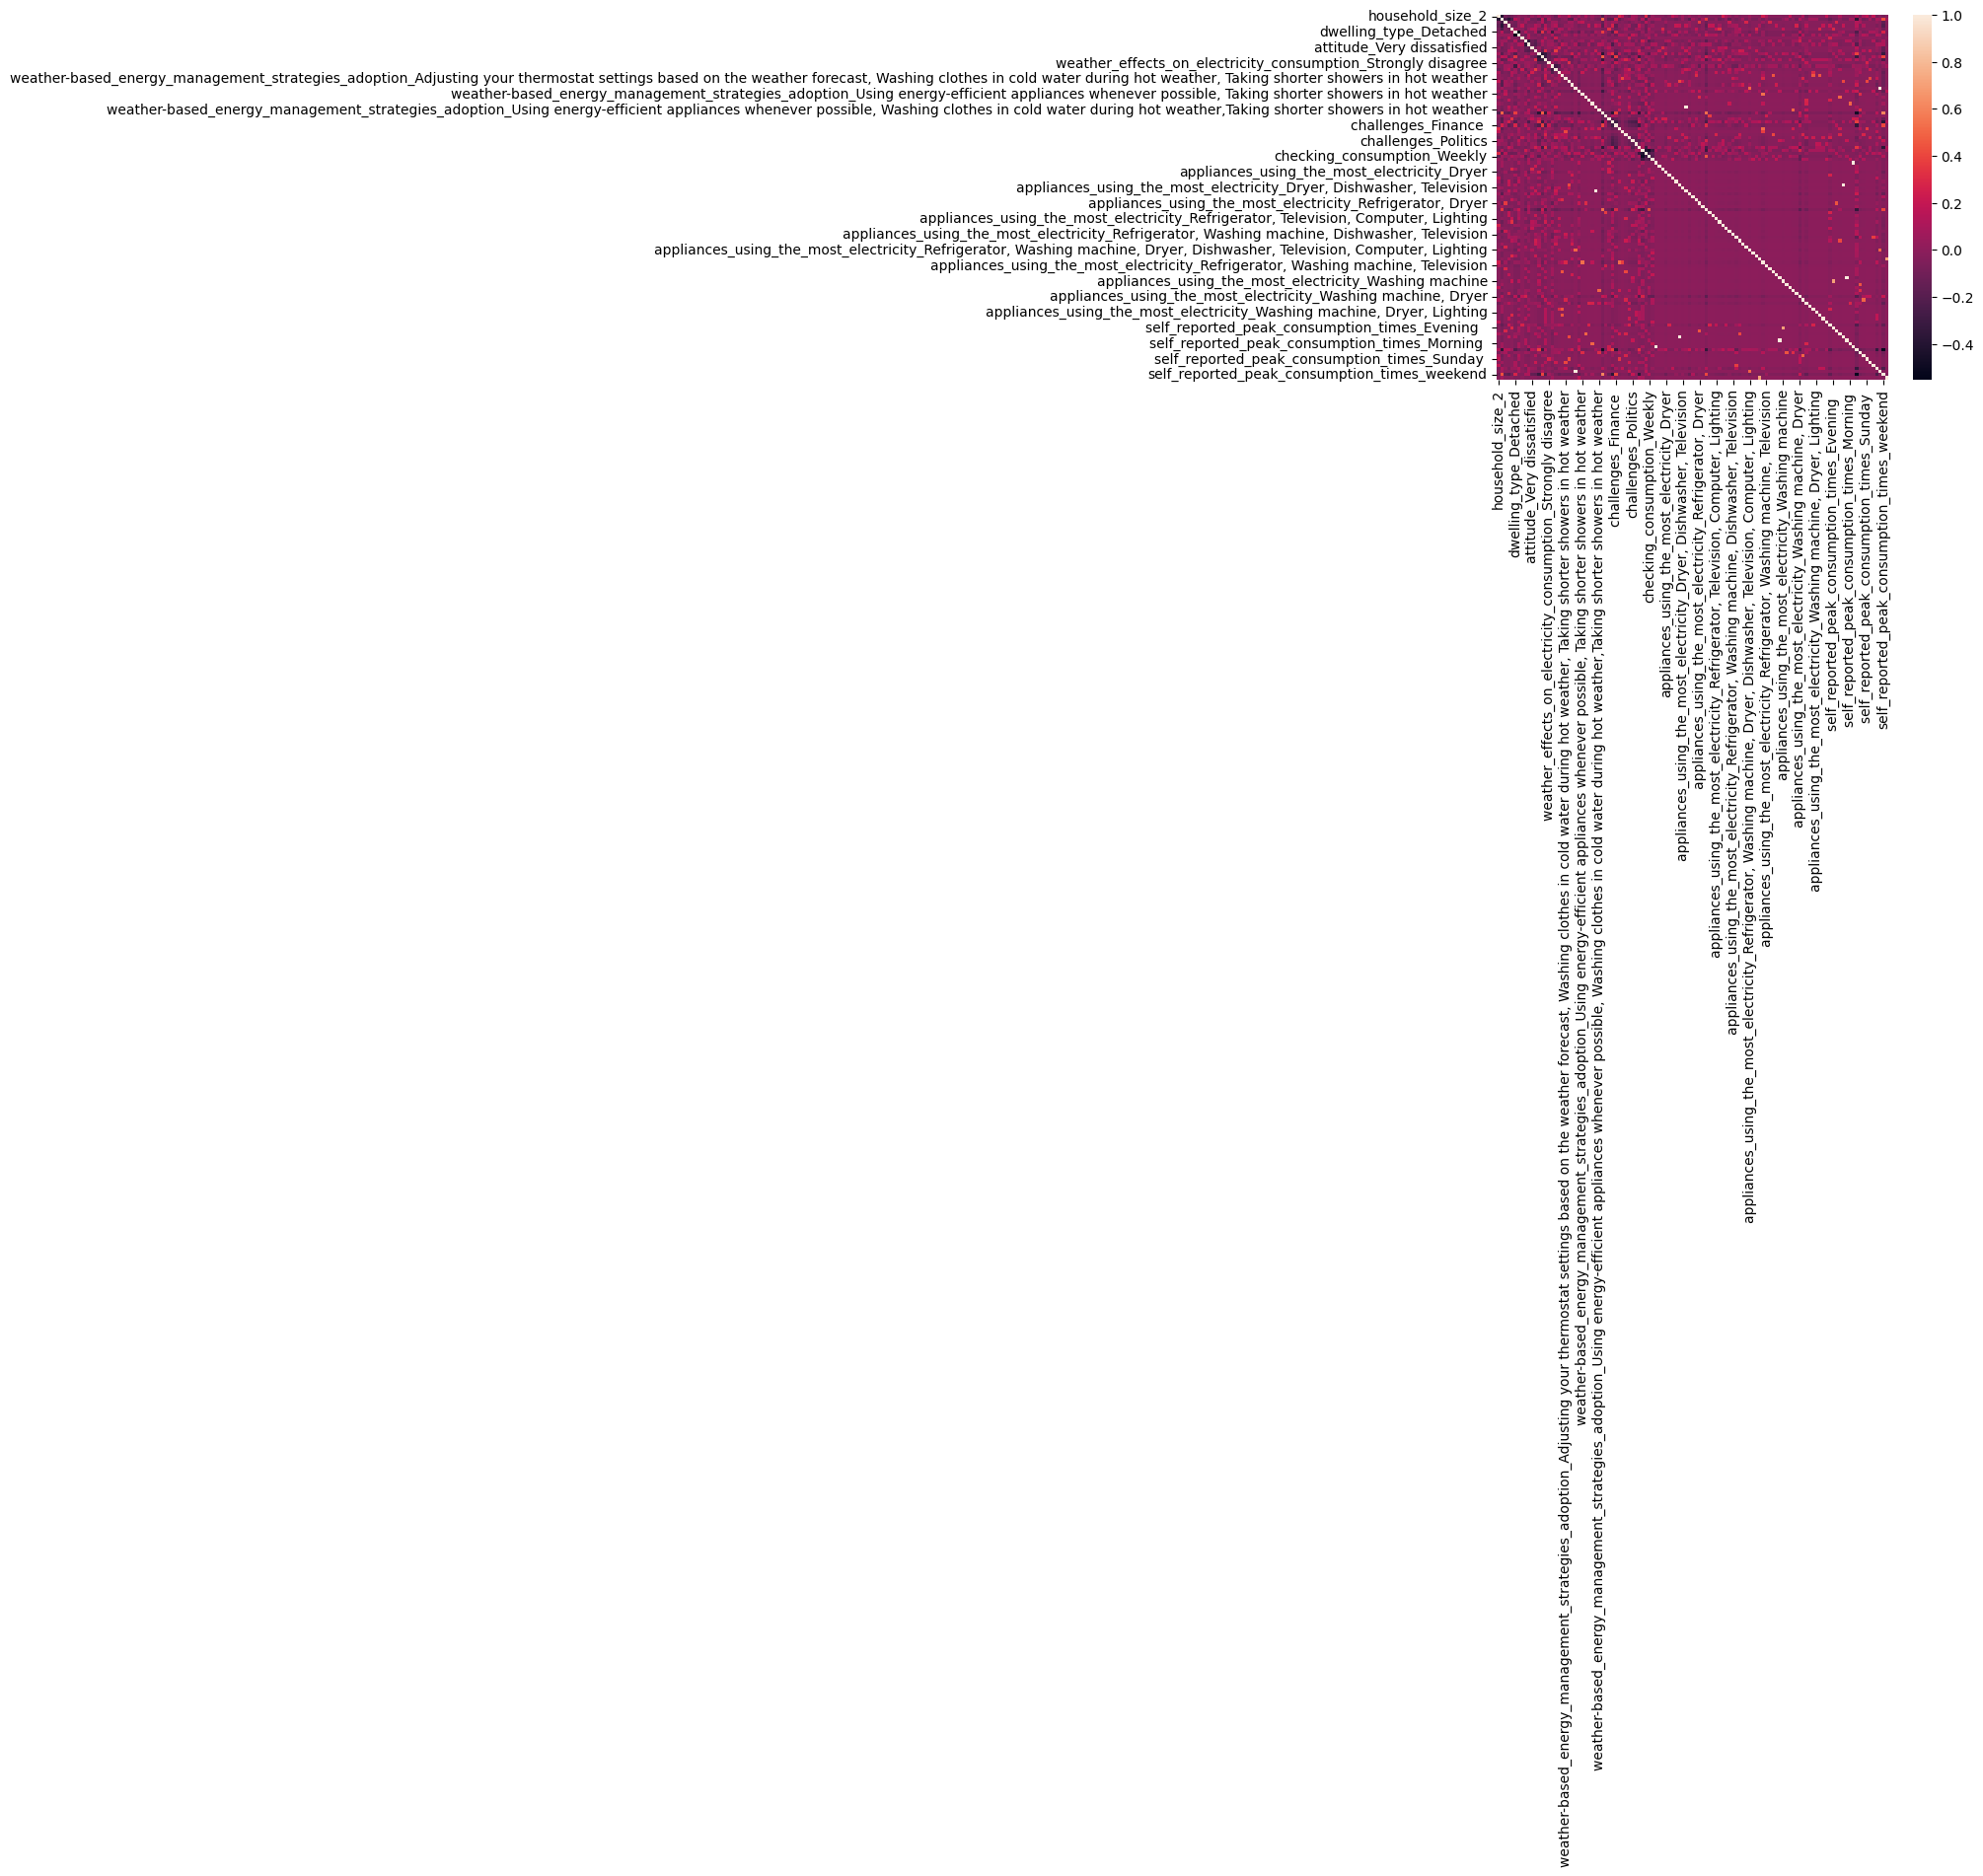

In [169]:
corr = encoded_df.corr()
sns.heatmap(corr)

**Improvement of the model**

In [211]:
#GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a base model
rf = RandomForestClassifier()

In [212]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [213]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [214]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'n_estimators': 200}


In [215]:
# Train and evaluate the best model
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)

In [216]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\I346462\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [217]:
print("Model Evaluation after Hyperparameter Tuning:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Model Evaluation after Hyperparameter Tuning:
Accuracy:  0.875
Precision:  0.7890625
Recall:  0.875
F1 Score:  0.8240740740740741


The hyperparameter tweaking method has greatly enhanced the model's performance, as indicated by higher accuracy, precision, recall, and F1 score values. The accuracy of 0.875 means that the model accurately predicted 87.5% of the cases. The precision of 0.789 indicates that the model correctly predicts a positive result 78.9% of the time. The recall value of 0.875 indicates that the model accurately detected 87.5% of all actual positives. The F1 score, which assesses the model's accuracy on the dataset, is 0.824, showing a reasonable balance of precision and recall.

The improved model can provide more accurate impressions and judgments of weather-based energy management adaption from the Galway people. More specifically, the factors impacting their attitudes toward applying such strategies can be identified and evaluated. For example, the model may be able to detect patterns or trends in the data indicating that specific weather conditions or household variables influence attitudes on weather-based energy management. 

However, while the model's performance has increased, it is still not perfect. There may yet be opportunity for further optimization or the incorporation of more data to capture greater complexity. Furthermore, the model's findings should be interpreted in connection with other research approaches to create a more complete picture of Galway households' perceptions and attitudes about weather-based energy management.